In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
# import sympy as sm

plt.style.use('ggplot')
# sm.init_printing(use_unicode=True)

import sys, os
import json
import itertools as it
import operator as op
import math
from functools import reduce, partial
import re

sys.path.extend(['D:/progms/pepper/py/', 'D:/progms/xp/'])
import ll

# import pandas as pd
# import simplekml

from dataclasses import dataclass
from collections import defaultdict, namedtuple

In [2]:
from scipy.spatial import KDTree

In [3]:
def color_str(r, g, b, a=1):
    r, g, b, a = int(r*255), int(g*255), int(b*255), int(a*255)
    return "%02x%02x%02x%02x" % (a, b, g, r)


def random_color():
    return color_str(np.random.rand(), np.random.rand(), np.random.rand())

In [4]:
def export_heat_pins(kmlname, frame: pd.DataFrame):
    kml = simplekml.Kml()

    caps = [5, 8, 10, 12, 15, 100000]

    dc = 1/(len(caps)-1)
    colors = [color_str(x*dc, 0, 0) for x in range(len(caps))]

    # 5, 10, 15, 20, ...
    folders = [kml.newfolder(name=str(c)) for c in caps[:-1]]
    folders.append(kml.newfolder(name="15+"))
    
    counts = [0 for x in caps]

    for i, r in frame.iterrows():
        h = int(r.heat)
        i = caps.index(ll.first_of(lambda c: c>= h, caps))

#         lon, lat = ll.gu.gcj2wgs(r.task_lng, r.task_lat)
        lon, lat = r.task_lng, r.task_lat
        p = folders[i].newpoint(name=str(h), coords=[(lon, lat)])
        p.iconstyle.color = colors[i]
        
        counts[i] += 1

    kml.save(f"D:/Feishu/downloads/{kmlname}.kml")
    
    print(kmlname, end=': ')
    for i, x in enumerate([0, 5, 8, 10, 12, 15]):
#         print(">", x,":", sum(counts[i:]))
        print(sum(counts[i:]), end=', ')
    print()

In [5]:
def get_covered(info):
    try:
        return float(re.findall(r'covered ([.\d]+)%', info)[0])
    except:
        return 0
def get_cases(info):
    try:
        return int(re.findall(r'cases: ([.\d]+)', info)[0])
    except:
        return 0
def get_stopline_size(info):
    try:
        return max(map(float, re.findall(r'dis: ([+-.\d]+)', info)))
    except:
        return 0

def load_qq_csv(csvfile):
    frame = pd.read_csv(csvfile)
    frame['case_size'] = frame.severityLevel.map(get_cases)
    frame['max_size'] = frame.severityLevel.map(get_stopline_size)
    
    return frame

In [6]:
def load_json(file):
    with open(file, 'r') as fin:
        data = json.load(fin)
    return data

In [7]:
pwd

'D:\\progms\\watermelon'

In [21]:
np.zeros(2)

array([0., 0.])

In [24]:
300**2 / np.r_[800, 500, 1000] / 2

array([56.25, 90.  , 45.  ])

(0.0822750376532204, 18, 27)

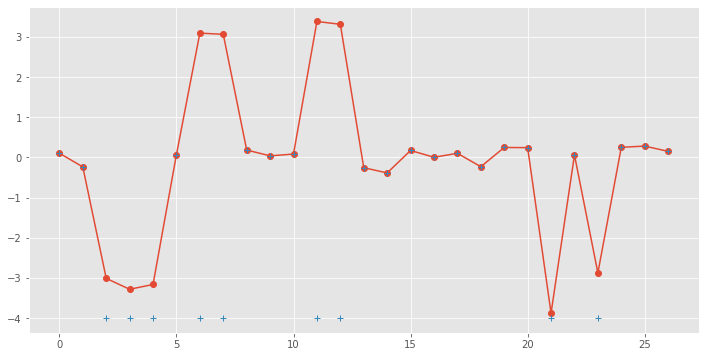

In [97]:
a = '''MatchedObject(src=Object[21630| SpecialCurb Curve], dst=Object[3655| SpecialCurb Curve], cost=0.10361503216116912, confidence=1)
MatchedObject(src=Object[21619| SpecialCurb Curve], dst=Object[3668| SpecialCurb Curve], cost=-0.237335991336671, confidence=1)
MatchedObject(src=Object[21619| SpecialCurb Curve], dst=Object[3674| SpecialCurb Curve], cost=-3.013598287077682, confidence=1)
MatchedObject(src=Object[21619| SpecialCurb Curve], dst=Object[3672| SpecialCurb Curve], cost=-3.2854056680110384, confidence=1)
MatchedObject(src=Object[21619| SpecialCurb Curve], dst=Object[3673| SpecialCurb Curve], cost=-3.165765518415527, confidence=1)
MatchedObject(src=Object[21619| SpecialCurb Curve], dst=Object[3678| SpecialCurb Curve], cost=0.07023184207998044, confidence=1)
MatchedObject(src=Object[21634| SpecialCurb Curve], dst=Object[3667| SpecialCurb Curve], cost=3.094371444407524, confidence=1)
MatchedObject(src=Object[21634| SpecialCurb Curve], dst=Object[3668| SpecialCurb Curve], cost=3.063301358485494, confidence=1)
MatchedObject(src=Object[21634| SpecialCurb Curve], dst=Object[3674| SpecialCurb Curve], cost=0.1827885621456641, confidence=1)
MatchedObject(src=Object[21634| SpecialCurb Curve], dst=Object[3672| SpecialCurb Curve], cost=0.037247528915595365, confidence=1)
MatchedObject(src=Object[21634| SpecialCurb Curve], dst=Object[3673| SpecialCurb Curve], cost=0.0822750376532204, confidence=1)
MatchedObject(src=Object[21634| SpecialCurb Curve], dst=Object[3679| SpecialCurb Curve], cost=3.3843023691446947, confidence=1)
MatchedObject(src=Object[21634| SpecialCurb Curve], dst=Object[3678| SpecialCurb Curve], cost=3.3137290128934107, confidence=1)
MatchedObject(src=Object[21640| SpecialCurb Curve], dst=Object[3662| SpecialCurb Curve], cost=-0.25742836712710715, confidence=1)
MatchedObject(src=Object[21640| SpecialCurb Curve], dst=Object[3663| SpecialCurb Curve], cost=-0.3881446311978853, confidence=1)
MatchedObject(src=Object[21625| SpecialCurb Curve], dst=Object[3649| SpecialCurb Curve], cost=0.1714704899993768, confidence=1)
MatchedObject(src=Object[21625| SpecialCurb Curve], dst=Object[3647| SpecialCurb Curve], cost=0.002051403710301013, confidence=1)
MatchedObject(src=Object[21625| SpecialCurb Curve], dst=Object[3648| SpecialCurb Curve], cost=0.10091699957474667, confidence=1)
MatchedObject(src=Object[21642| SpecialCurb Curve], dst=Object[3653| SpecialCurb Curve], cost=-0.23242704694393368, confidence=1)
MatchedObject(src=Object[21615| SpecialCurb Curve], dst=Object[3655| SpecialCurb Curve], cost=0.2459542357809181, confidence=1)
MatchedObject(src=Object[21615| SpecialCurb Curve], dst=Object[3657| SpecialCurb Curve], cost=0.24234022691039098, confidence=1)
MatchedObject(src=Object[21615| SpecialCurb Curve], dst=Object[3680| SpecialCurb Curve], cost=-3.879207773381011, confidence=1)
MatchedObject(src=Object[21615| SpecialCurb Curve], dst=Object[5026| SpecialCurb Curve], cost=0.05929557242219028, confidence=1)
MatchedObject(src=Object[21609| SpecialCurb Curve], dst=Object[3674| SpecialCurb Curve], cost=-2.8773514212591844, confidence=1)
MatchedObject(src=Object[21609| SpecialCurb Curve], dst=Object[3680| SpecialCurb Curve], cost=0.2503302505364796, confidence=1)
MatchedObject(src=Object[21609| SpecialCurb Curve], dst=Object[3679| SpecialCurb Curve], cost=0.2806483904769865, confidence=1)
MatchedObject(src=Object[21609| SpecialCurb Curve], dst=Object[5021| SpecialCurb Curve], cost=0.14951453253788016, confidence=1)'''


# p = []
# for l in re.findall(r'cost=(.+),', a):
# #     a, b = l.split(',')
#     p.append((float(a), float(b)))
    
p = np.array(list(map(float, re.findall(r'cost=(.+),', a))))

plt.figure(figsize=(12, 6))
plt.plot(p, '-o')

a = np.median(p)
ip = p[np.abs(p-a)< 1]

q = p.copy()
q[np.abs(p-a)> 1] = -4
plt.plot(q, '+')
# plt.plot(list(range(len(p[np.abs(p-a)< 1]))), ip, '--+')

a, len(p[np.abs(p-a)< 1]), len(p)

In [83]:
ip

array([-0.05563141, -0.28298567, -0.22785817, -0.81326872, -0.76279261,
       -0.91992032, -0.4480734 , -0.61945678, -0.73084107, -0.44808577,
       -0.67806511, -0.05548532, -0.28151392, -0.22610442, -0.67679955,
       -0.65640302, -0.73242931, -0.90829126, -0.99214863, -0.62965649,
       -0.71045503, -0.22032429, -0.37391819, -0.73809709, -0.59238482,
       -0.6240598 , -0.21951895, -0.37321795, -0.6513616 , -0.78163879,
       -0.57541024, -0.7452636 , -0.70944598, -0.72583936])

In [14]:
a = [ 	[1,3,4,6,7],
     [ 	4,7,8,12],
     [2,5,9,11,13],
     [1,2,14,15 	],
     [3,6,10,12,14],
     [8,14,15],
     [1,2,6,11],
     [1,2,4,6,8,12]
    ]

In [17]:
M = np.zeros((15, 8))

In [19]:
for i, cs in enumerate(a):
    for c in cs:
        M[c-1, i] = 1

In [21]:
x = np.ones(8)

$$ \min 1^T x \\
s.t. M x \ge 1 \\
x \in \{0, 1\}^n$$

In [25]:
from scipy.optimize import linprog

In [37]:
r = linprog(np.ones(8), A_ub=-M, b_ub=-np.ones(15), bounds=[0, 1])
r

     con: array([], dtype=float64)
     fun: 4.0000000005398855
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([4.13707957e-10, 4.76166162e-01, 5.23833839e-01, 2.87011304e-10,
       0.00000000e+00, 5.23833839e-01, 1.23751676e-10, 2.89436253e-10,
       0.00000000e+00, 0.00000000e+00, 1.85263138e-10, 4.76166161e-01,
       0.00000000e+00, 1.00000000e+00, 6.76103618e-11])
  status: 0
 success: True
       x: array([5.23833839e-01, 4.76166161e-01, 1.00000000e+00, 4.76166161e-01,
       1.00000000e+00, 5.23833839e-01, 1.85263148e-10, 1.63259493e-10])

In [42]:
np.set_printoptions(precision=6)

In [60]:
np.sum(M, axis=1)

array([4., 4., 2., 3., 1., 4., 2., 3., 1., 1., 2., 3., 1., 3., 2.])

In [48]:
M @ r.x

array([1.      , 1.476166, 1.523834, 1.      , 1.      , 1.523834,
       1.      , 1.      , 1.      , 1.      , 1.      , 1.476166,
       1.      , 2.      , 1.      ])

In [61]:
x = np.zeros_like(r.x)
x[r.x> .25] = 1
x[r.x< .25] = 0

In [62]:
M @ x

array([2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 3., 2.])

In [63]:
np.where(x> 0)

(array([0, 1, 2, 3, 4, 5], dtype=int64),)

array([1., 1., 1., 1., 1., 1., 0., 0.])

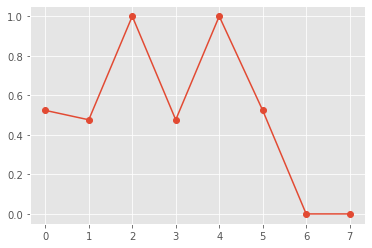

In [66]:
plt.plot(r.x, '-o')

In [5]:
math.degrees(1.81637001)

104.07033560713514

In [651]:
from time import strftime
os.path.realpath("result") + '_' +  strftime('%Y%m%d_%H-%M-%S')

'D:\\progms\\watermelon\\result_20231130_10-43-29'

In [753]:
p = Point(1, [1, 2, 3])

In [227]:
points = [Point(1, [1, 2, 3]), Point(1, [4, 5, 6]), Point(2, [7, 8, 9]), ]

In [236]:
from functools import cache

In [6]:
import pandas as pd

In [10]:
f = pd.read_excel('D:/Feishu/downloads/12.3需创建任务.xlsx', engine='openpyxl')

In [12]:
with open('D:/1.txt', 'w', encoding='utf-8') as fout:
    for i, l in f.iterrows():
        fout.write(f'{l["坐标"]},0,{l["省份"]},{l["城市"]}\n')

In [667]:
a = np.random.random((4, 2))

In [14]:
0: Position: {X:320 Y:180}, Rotation: -0.5235988, Scale: {X:1 Y:1}, [{X:320 Y:180}, 0.5235988, {X:1 Y:1}].
1: Position: {X:100 Y:0}, Rotation: 0, Scale: {X:1 Y:1}, [{X:406.60254 Y:130}, 0.5235988, {X:1 Y:1}].

0.5235987755982988

In [15]:
320+ 100* math.cos(math.pi/6)

406.6025403784439

In [25]:
np.random.random((4, 2)) * np.c_[[1, 100, 1000, 10000]]

array([[5.97519827e-01, 7.03916998e-01],
       [5.59866271e+01, 8.54000802e+01],
       [7.48030384e+02, 5.02080424e+02],
       [4.25312540e+03, 7.80482514e+03]])

In [27]:
a = np.r_[1, 2, 3]

In [28]:
np.tile(a, [2, 2])

array([[1, 2, 3, 1, 2, 3],
       [1, 2, 3, 1, 2, 3]], dtype=int32)

In [33]:
class A:
    pass

op.attrgetter("a.b")

operator.attrgetter('a.b')

In [51]:
np.median([1, 1, 1, 2, ])

1.0

In [35]:
a.a = 1

In [48]:
max([1, 2, 3, -4], key=abs)

-4

In [47]:
max?

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method


In [283]:
def flatten(items, ignore_types=(str, bytes)):
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, ignore_types):
            yield from flatten(x, ignore_types)
        else:
            yield x

In [284]:
list(flatten(range(x) for x in range(10)))

In [686]:
a = np.random.random((3, 2))
b = np.random.random((4, 2))

In [722]:
np.savez("1", {"data": [a, b]},)

In [723]:
f = np.load("1.npz", allow_pickle=True)

In [751]:
f["arr_0"].tolist()

[array([[0.48789258, 0.8931274 ],
        [0.8984569 , 0.14452266],
        [0.71501315, 0.84595555]]),
 array([[0.43893303, 0.19618817],
        [0.1065801 , 0.15611772],
        [0.19495212, 0.34579675],
        [0.64934822, 0.98722074]])]

In [761]:
math.cos(math.radians(5))

In [ ]:
np.savez("1", a, b, c, d, ...)

In [291]:
def f():
    a = {1:[1, 2, 3], 2:[3, 5, 6], }
    yield from a.items()

In [327]:
a = [1, 1, 2, 3, 4, 4, 4, 5, 5, 6, 7, 7, 7, 7, 8, 9, 10]

In [328]:
%%timeit
set(a)

290 ns ± 0.434 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [322]:
def unique(xs):
    prev = None
    for x in xs:
        if x!= prev:
            yield x
            prev = x

In [333]:
%%timeit 

set(unique(a))

982 ns ± 9.37 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [337]:
list(filter(bool, [1, 2, None, 3, None, 4, ]))

In [334]:
22418268/22426464

In [335]:
70452784/148265024

In [81]:
def sum_list(a):
    match a:
        case []: return 0
        case [x, *other]: return x + sum_list(other)

In [87]:
def foldl(f, init, a):
    match a:
        case []: return init
        case [x]: return f(init, x)
        case [x, *other]: return foldl(f, f(init, x), other)

In [92]:
%%timeit

foldl(op.add, 0, range(10))

2.61 µs ± 8.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [356]:
def curry2(f):
    return lambda x: lambda y: f(x, y)

In [370]:
def pipe(x, *fs): return reduce(lambda s, a: a(s), fs, x)

In [372]:
pipe(2, pow(3), pow(2))

In [397]:
np.mean(np.random.random((4, 2)), axis=0)

array([0.38922655, 0.87876229])

In [369]:
reduce(lambda s, x: x(s), [pow(3), ], 2)

In [ ]:
ds = list(filter(lambda d: d< r, 
       map(lambda p: ll.utils2d.distance_to_line(p, b)[0], 
           a)))

In [387]:
op.no

In [390]:
pipe(a, 
     enumerate,
     partial(map, ll.compose(distance_to, op.itemgetter(1))), 
     partial(filter, partial(op.ge, 3)), 
     list)

In [402]:
a = np.r_[[6008.3761372,  3641.41625641],
 [6005.06432034, 3655.94892952],]
b = np.r_[[6009.33212391, 3637.54197809],
 [6009.97318202, 3641.0782299 ]]

In [404]:
a = a.reshape(-1, 2)
b = b.reshape(-1, 2)

In [405]:
a


array([[6008.3761372 , 3641.41625641],
       [6005.06432034, 3655.94892952]])

In [406]:
b

array([[6009.33212391, 3637.54197809],
       [6009.97318202, 3641.0782299 ]])

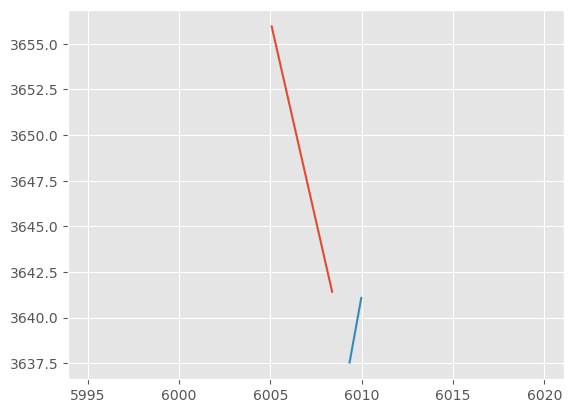

In [417]:
plt.plot(a[:, 0], a[:, 1])
plt.plot(b[:, 0], b[:, 1])

plt.axis('equal')

In [416]:
ll.calc.normalized(a[-1] - a[0]) @ ll.calc.normalized(b[-1] - b[0])

In [434]:
b = ('case1781449660_42-48', ['/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_42_1698119141809569393.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_43_1698119141812631759.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_44_1698119141819480617.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_45_1698119141825782189.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_46_1698119141829882102.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_47_1698119141833154429.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000000/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_48_1698119141838141258.bin.pb'])


In [435]:
a = ('case1781449660_42-48', ['/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_42_1698119141809569393.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_43_1698119141812631759.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_44_1698119141819480617.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_45_1698119141825782189.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_46_1698119141829882102.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000001/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_47_1698119141833154429.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000000/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_48_1698119141838141258.bin.pb'])


In [436]:
a==b

True

In [469]:
a = '''aligned, match errors: 
aligned, match errors: 
aligned, match errors: 
(<SemanticType.ArrowLeft: 2>, 2, 0.13805147208442511, array([0.11846354, 0.13805147, 0.1576394 ]))
aligned, match errors: 
aligned, match errors: 
aligned, match errors: 
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 207, 0.14277778123911972, array([0.00205672, 0.12820829, 0.56963918]))
(<SemanticType.Stopline: 12>, 6, -0.01612083452032231, array([-0.12988866,  0.00846039,  0.02872897]))
(<SemanticType.ArrowStraight: 1>, 42, 0.16846364454237878, array([0.02907706, 0.15353193, 0.33408513]))
(<SemanticType.Number: 7>, 2, 0.4341905447066188, array([0.33984896, 0.43419054, 0.52853213]))
(<SemanticType.Character: 8>, 17, 0.2431120082848625, array([0.03746898, 0.2675476 , 0.4683699 ]))
(<SemanticType.ArrowRight: 3>, 1, 0.05858809501664376, array([0.0585881, 0.0585881, 0.0585881]))
(<SemanticType.ArrowLeft: 2>, 3, 0.1875255380474797, array([0.12959416, 0.13730571, 0.29567675]))
aligned, match errors: 
(<SemanticType.ArrowStraight: 1>, 4, 0.35778725891155716, array([0.17650777, 0.38548283, 0.48367559]))
(<SemanticType.SpecialCurb: 16>, 12, 0.1462983954464084, array([0.06045864, 0.13936157, 0.28877654]))
aligned, match errors: 
aligned, match errors: 
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 161, 0.0666375793968691, array([0.00162049, 0.05409639, 0.24113725]))
(<SemanticType.ArrowStraight: 1>, 2, 0.3192135185766706, array([0.25147005, 0.31921352, 0.38695699]))
(<SemanticType.Character: 8>, 1, 0.8998238668012611, array([0.89982387, 0.89982387, 0.89982387]))
aligned, match errors: 
aligned, match errors: 
aligned, match errors: 
aligned, match errors: 
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 2, 0.29859316692275917, array([0.22854004, 0.29859317, 0.36864629]))
(<SemanticType.Character: 8>, 1, 0.43538679820739656, array([0.4353868, 0.4353868, 0.4353868]))
(<SemanticType.ArrowStraight: 1>, 4, 0.5872136404439987, array([0.51950989, 0.53044552, 0.76845362]))
(<SemanticType.Stopline: 12>, 2, 0.07997012900287717, array([-0.00649708,  0.07997013,  0.16643734]))
(<SemanticType.ArrowRight: 3>, 2, 0.7798762058250639, array([0.4201414 , 0.77987621, 1.13961101]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 3, 0.19670573405000882, array([0.13070719, 0.20270238, 0.25670763]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 12, 0.06933864595958267, array([0.01623941, 0.05646379, 0.1482276 ]))
aligned, match errors: 
aligned, match errors: 
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 215, 0.10299448364762674, array([0.0118005 , 0.08460697, 0.41220233]))
(<SemanticType.ArrowLeft: 2>, 1, 0.03945354023138936, array([0.03945354, 0.03945354, 0.03945354]))
(<SemanticType.ArrowStraight: 1>, 6, 0.1751551412255419, array([0.02074536, 0.20483688, 0.3044177 ]))
(<SemanticType.Character: 8>, 24, 0.16352782234606236, array([0.02922665, 0.13416212, 0.43555813]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 114, 0.10749200563518517, array([0.01606295, 0.09148639, 0.39308262]))
(<SemanticType.ArrowStraight: 1>, 4, 0.3182956456256618, array([0.14162241, 0.31668757, 0.49818503]))
(<SemanticType.ArrowMergeLeft: 5>, 3, 0.20733469954372044, array([0.06801409, 0.13477149, 0.41921851]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 99, 0.10834396165658886, array([0.00227858, 0.07836228, 0.37117355]))
(<SemanticType.ArrowStraight: 1>, 9, 0.17610333863920283, array([0.10892827, 0.14592304, 0.31396631]))
(<SemanticType.Number: 7>, 2, 0.13446673344942708, array([0.10903559, 0.13446673, 0.15989788]))
aligned, match errors: 
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 135, 0.27463771214463567, array([0.01510506, 0.22070869, 0.70857436]))
(<SemanticType.Character: 8>, 14, 0.24726094912519386, array([0.01007417, 0.15030287, 1.36516028]))
(<SemanticType.ArrowLeft: 2>, 4, 0.6169717504596026, array([0.33393883, 0.66178081, 0.81038655]))
(<SemanticType.ArrowStraight: 1>, 28, 0.4804718113208041, array([0.10434438, 0.47850994, 0.83482107]))
(<SemanticType.Stopline: 12>, 4, 0.16328667069119235, array([-0.10644843,  0.14181189,  0.47597134]))
(<SemanticType.ArrowRight: 3>, 3, 0.48482147052391356, array([0.4526483 , 0.46201095, 0.53980516]))
(<SemanticType.Number: 7>, 1, 0.07374220819125243, array([0.07374221, 0.07374221, 0.07374221]))
(<SemanticType.ArrowMergeRight: 6>, 1, 0.13056371209171375, array([0.13056371, 0.13056371, 0.13056371]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 250, 0.15597328779689837, array([0.00522824, 0.12932962, 0.58472048]))
(<SemanticType.ArrowStraight: 1>, 38, 0.1989316031655464, array([0.04362198, 0.19459713, 0.61090415]))
(<SemanticType.ArrowLeft: 2>, 12, 0.2796206132691272, array([0.04080435, 0.29416911, 0.47455447]))
(<SemanticType.Stopline: 12>, 6, 0.06803039310204569, array([-0.01866   ,  0.05168701,  0.1685466 ]))
(<SemanticType.ArrowRight: 3>, 11, 0.15111306382584005, array([0.05610913, 0.13348627, 0.26033514]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 61, 0.1651706470269354, array([0.01576622, 0.13756854, 0.54042747]))
(<SemanticType.ArrowLeft: 2>, 1, 0.14130005830007494, array([0.14130006, 0.14130006, 0.14130006]))
(<SemanticType.ArrowStraight: 1>, 5, 0.3290837305938638, array([0.17547431, 0.27219558, 0.63691362]))
(<SemanticType.Character: 8>, 24, 0.19317312536933376, array([0.02250076, 0.17939817, 0.595309  ]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 144, 0.1500052548445978, array([0.0065727 , 0.11007598, 0.60294775]))
(<SemanticType.Character: 8>, 2, 0.7487873865170201, array([0.73464089, 0.74878739, 0.76293389]))
(<SemanticType.ArrowStraight: 1>, 20, 0.1812707947740602, array([0.02159774, 0.14462371, 0.49275696]))
(<SemanticType.ArrowRight: 3>, 9, 0.172563459607727, array([0.03521097, 0.14983656, 0.32066151]))
(<SemanticType.ArrowLeft: 2>, 5, 0.10667374489822457, array([0.01357401, 0.11960042, 0.19276216]))
(<SemanticType.Stopline: 12>, 3, 0.10833521431161759, array([0.02832173, 0.11426768, 0.18241623]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 273, 0.11020131354375368, array([0.00734135, 0.08360095, 0.60488813]))
(<SemanticType.Character: 8>, 22, 0.3213840765051152, array([0.0325893 , 0.22155636, 1.12385349]))
(<SemanticType.ArrowMergeLeft: 5>, 4, 0.13920068014619272, array([0.05101115, 0.10464344, 0.2965047 ]))
(<SemanticType.ArrowMergeRight: 6>, 1, 0.26111791889386576, array([0.26111792, 0.26111792, 0.26111792]))
(<SemanticType.ArrowStraight: 1>, 11, 0.3616004489281564, array([0.10362822, 0.31979207, 0.80964388]))
(<SemanticType.Number: 7>, 1, 0.4041798315372216, array([0.40417983, 0.40417983, 0.40417983]))
(<SemanticType.ArrowRight: 3>, 1, 0.12521561294163544, array([0.12521561, 0.12521561, 0.12521561]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 62, 0.1564358003786633, array([0.02012255, 0.11591535, 0.60625557]))
(<SemanticType.ArrowLeft: 2>, 4, 0.13725782376059703, array([0.07440896, 0.13978082, 0.1950607 ]))
(<SemanticType.ArrowStraight: 1>, 5, 0.2718644232260357, array([0.10687783, 0.29505051, 0.38941095]))
(<SemanticType.Character: 8>, 11, 0.38407826600831657, array([0.06220202, 0.24806486, 1.17518241]))
(<SemanticType.ArrowMergeRight: 6>, 1, 0.07583811572796485, array([0.07583812, 0.07583812, 0.07583812]))
(<SemanticType.Stopline: 12>, 1, 0.33249106541841134, array([0.33249107, 0.33249107, 0.33249107]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 169, 0.3796652483804246, array([0.01269851, 0.35932992, 0.82588075]))
(<SemanticType.ArrowStraight: 1>, 19, 0.7253809205220958, array([0.25370923, 0.73063717, 1.20105225]))
(<SemanticType.Stopline: 12>, 2, 0.11338688474607397, array([-0.02276317,  0.11338688,  0.24953694]))
(<SemanticType.ArrowLeft: 2>, 5, 0.6909640055999999, array([0.57047471, 0.69458906, 0.81578534]))
(<SemanticType.ArrowUturn: 4>, 2, 0.7274956423945611, array([0.71138868, 0.72749564, 0.7436026 ]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 83, 0.06590552214075727, array([0.00052299, 0.05740188, 0.21869737]))
(<SemanticType.ArrowStraight: 1>, 3, 0.245939109315405, array([0.18721042, 0.19119511, 0.35941179]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 113, 0.08928922064486863, array([0.00239336, 0.06492855, 0.37477247]))
(<SemanticType.ArrowStraight: 1>, 7, 0.16984130361135225, array([0.04916206, 0.18417948, 0.25346097]))
(<SemanticType.Number: 7>, 3, 0.10388596082414968, array([0.01908655, 0.12728234, 0.165289  ]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 4, 0.3420606189533679, array([0.05419986, 0.38492399, 0.54419463]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 168, 0.16196918826620355, array([0.0102709 , 0.1372198 , 0.66573306]))
(<SemanticType.ArrowLeft: 2>, 6, 0.23554242959042568, array([0.16735604, 0.19425863, 0.44659325]))
(<SemanticType.ArrowStraight: 1>, 18, 0.20454439070938404, array([0.07048514, 0.1933033 , 0.42793856]))
(<SemanticType.Stopline: 12>, 4, 0.17221627193039069, array([0.01166438, 0.17995087, 0.31729897]))
(<SemanticType.ArrowRight: 3>, 3, 0.2254610155633713, array([0.1537667 , 0.24095609, 0.28166026]))
(<SemanticType.Character: 8>, 2, 0.19897520273006997, array([0.18777737, 0.1989752 , 0.21017303]))
(<SemanticType.Number: 7>, 1, 0.14326321381649945, array([0.14326321, 0.14326321, 0.14326321]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 226, 0.16064526247759087, array([0.00759459, 0.12534711, 0.69319187]))
(<SemanticType.ArrowStraight: 1>, 26, 0.3104237225215881, array([0.10744953, 0.30284077, 0.68319635]))
(<SemanticType.Stopline: 12>, 4, -0.09246355298809894, array([-0.31289999, -0.0370177 ,  0.01708117]))
(<SemanticType.ArrowLeft: 2>, 5, 0.30628254145857076, array([0.11057971, 0.21671393, 0.7361629 ]))
(<SemanticType.ArrowRight: 3>, 2, 0.2707874481735624, array([0.1251703 , 0.27078745, 0.4164046 ]))
(<SemanticType.Number: 7>, 1, 0.22374810203369358, array([0.2237481, 0.2237481, 0.2237481]))
(<SemanticType.Character: 8>, 3, 0.4748170764185442, array([0.19886251, 0.39307235, 0.83251638]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 310, 0.25001609193492, array([0.01063968, 0.21481345, 0.9637034 ]))
(<SemanticType.ArrowStraight: 1>, 38, 0.2766217493640526, array([0.03436871, 0.22223545, 0.74109299]))
(<SemanticType.Character: 8>, 16, 0.2704990956176563, array([0.02928427, 0.11285479, 1.23622585]))
(<SemanticType.ArrowLeft: 2>, 8, 0.31575810191711773, array([0.06543606, 0.32048368, 0.5258744 ]))
(<SemanticType.ArrowMergeRight: 6>, 2, 0.2779582296023302, array([0.20440992, 0.27795823, 0.35150654]))
(<SemanticType.ArrowRight: 3>, 11, 0.3406054236161513, array([0.0622484 , 0.31533527, 0.70912491]))
(<SemanticType.Stopline: 12>, 4, 0.11361420967864852, array([-0.10483752,  0.10309531,  0.35310373]))
(<SemanticType.Number: 7>, 1, 0.07033951330209662, array([0.07033951, 0.07033951, 0.07033951]))
aligned, match errors: 
(<SemanticType.ArrowLeft: 2>, 17, 0.3132984192629029, array([0.20270762, 0.33101083, 0.43815897]))
(<SemanticType.ArrowRight: 3>, 14, 0.3113136767767835, array([0.25036151, 0.29653278, 0.4296298 ]))
(<SemanticType.ArrowStraight: 1>, 85, 0.319729315684594, array([0.03054175, 0.35670404, 0.57212125]))
(<SemanticType.SpecialCurb: 16>, 466, 0.2360837307030488, array([0.00466161, 0.20047045, 0.83702136]))
(<SemanticType.Character: 8>, 33, 0.3109947928417888, array([0.04443925, 0.27260644, 1.2909201 ]))
(<SemanticType.Stopline: 12>, 11, 0.08521363451806081, array([-0.07292614,  0.01761199,  0.34051634]))
(<SemanticType.Number: 7>, 3, 0.22883797645617876, array([0.14658001, 0.24001317, 0.29992076]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 108, 0.12300914162921765, array([0.00596589, 0.09738266, 0.51263766]))
(<SemanticType.Stopline: 12>, 3, -0.07192519064407062, array([-0.15347169, -0.0825468 ,  0.02024292]))
(<SemanticType.ArrowRight: 3>, 2, 0.13328832017274148, array([0.08222737, 0.13328832, 0.18434927]))
(<SemanticType.ArrowStraight: 1>, 13, 0.15529018521190704, array([0.06210419, 0.12084666, 0.3066476 ]))
(<SemanticType.ArrowLeft: 2>, 2, 0.2933097902209266, array([0.13848016, 0.29330979, 0.44813942]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 254, 0.13793400385412904, array([0.00677165, 0.11632099, 0.58029387]))
(<SemanticType.Stopline: 12>, 6, 0.045780907020675665, array([-0.04597907,  0.00915515,  0.18754711]))
(<SemanticType.ArrowStraight: 1>, 41, 0.14405724982852947, array([0.00888732, 0.12211105, 0.46363521]))
(<SemanticType.ArrowRight: 3>, 11, 0.15851955423865885, array([0.03201844, 0.14989631, 0.38959448]))
(<SemanticType.ArrowLeft: 2>, 14, 0.21344049769384463, array([0.06468267, 0.18160713, 0.50357201]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 59, 0.16007705656685842, array([0.00458566, 0.15659592, 0.41254459]))
(<SemanticType.ArrowStraight: 1>, 6, 0.27035876126207703, array([0.09174254, 0.18038851, 0.61154552]))
(<SemanticType.ArrowRight: 3>, 1, 0.14053501507582147, array([0.14053502, 0.14053502, 0.14053502]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 214, 0.22816391074636977, array([0.00514428, 0.19400468, 0.92950717]))
(<SemanticType.ArrowStraight: 1>, 45, 0.5863525256009245, array([0.06499168, 0.45210314, 1.51784076]))
(<SemanticType.ArrowLeft: 2>, 16, 0.6071304306214993, array([0.16095548, 0.51411132, 1.27311794]))
(<SemanticType.Stopline: 12>, 9, 0.15312740010684822, array([-0.25944898,  0.08042896,  1.17679869]))
(<SemanticType.Character: 8>, 5, 0.9153837313582021, array([0.61586175, 0.99454498, 1.22557944]))
(<SemanticType.ArrowRight: 3>, 6, 0.3391096299231933, array([0.14225276, 0.32326857, 0.53343829]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 197, 0.36170640140599397, array([0.00757863, 0.3351162 , 0.93349452]))
(<SemanticType.ArrowUturn: 4>, 2, 0.2773569818574072, array([0.12556264, 0.27735698, 0.42915132]))
(<SemanticType.ArrowStraight: 1>, 37, 0.5746649899276906, array([0.06776978, 0.51325463, 1.29116278]))
(<SemanticType.Stopline: 12>, 4, 0.015413143311616452, array([-0.24519533, -0.07794027,  0.46272844]))
(<SemanticType.ArrowRight: 3>, 8, 0.39833569156226134, array([0.14069178, 0.36076987, 0.99215805]))
(<SemanticType.ArrowLeft: 2>, 8, 0.35624406746048093, array([0.15454722, 0.33214828, 0.58949443]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 54, 0.08008359388982826, array([0.01884259, 0.06914855, 0.19487661]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 120, 0.09325167039262508, array([0.00122661, 0.0731318 , 0.34147994]))
(<SemanticType.ArrowStraight: 1>, 5, 0.16658493465829488, array([0.05958744, 0.1485262 , 0.29846328]))
(<SemanticType.Character: 8>, 32, 0.22155046587115176, array([0.04548672, 0.16358078, 0.54611731]))
(<SemanticType.ArrowLeft: 2>, 1, 0.06481841108989714, array([0.06481841, 0.06481841, 0.06481841]))
(<SemanticType.Number: 7>, 2, 0.20056545198631023, array([0.15508076, 0.20056545, 0.24605014]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 110, 0.1133666957467165, array([0.00319984, 0.07434236, 0.45930016]))
(<SemanticType.ArrowLeft: 2>, 3, 0.4393372227126733, array([0.14194459, 0.55033016, 0.62573692]))
(<SemanticType.ArrowStraight: 1>, 14, 0.23995129990470349, array([0.03476949, 0.1970382 , 0.61260329]))
(<SemanticType.ArrowMergeRight: 6>, 1, 0.13805682801320976, array([0.13805683, 0.13805683, 0.13805683]))
(<SemanticType.Character: 8>, 7, 0.2153337401718127, array([0.12190469, 0.15178897, 0.51829798]))
(<SemanticType.ArrowRight: 3>, 1, 0.23992412250982137, array([0.23992412, 0.23992412, 0.23992412]))
(<SemanticType.Stopline: 12>, 1, 0.2627721389177705, array([0.26277214, 0.26277214, 0.26277214]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 157, 0.2274809372337058, array([0.0150178 , 0.19547777, 0.60376865]))
(<SemanticType.Stopline: 12>, 4, 0.04937186473319293, array([-0.09509739,  0.06594694,  0.16069097]))
(<SemanticType.ArrowRight: 3>, 3, 0.18818747642949527, array([0.12559958, 0.13849226, 0.30047059]))
(<SemanticType.ArrowStraight: 1>, 20, 0.3477500413928938, array([0.01999932, 0.24061611, 0.97692574]))
(<SemanticType.ArrowLeft: 2>, 1, 0.22757252043494788, array([0.22757252, 0.22757252, 0.22757252]))
aligned, match errors: 
(<SemanticType.SpecialCurb: 16>, 127, 0.3933731459706724, array([0.01253662, 0.37059386, 0.89205415]))
(<SemanticType.ArrowStraight: 1>, 30, 1.0087123674736775, array([0.33408283, 0.9873191 , 1.54065728]))
(<SemanticType.Stopline: 12>, 6, -0.03986165419882751, array([-0.5556806 , -0.01721497,  0.31432243]))
(<SemanticType.ArrowRight: 3>, 3, 1.4906949652954324, array([1.38656238, 1.53153697, 1.55398555]))
(<SemanticType.ArrowLeft: 2>, 6, 0.9157634444563801, array([0.27445937, 0.9374961 , 1.50810126]))
aligned, match errors: 
(<SemanticType.Stopline: 12>, 6, 0.04629340223387313, array([-0.81043815,  0.20838564,  0.31330584]))
(<SemanticType.ArrowStraight: 1>, 41, 0.3327798406000112, array([0.02927807, 0.30436341, 0.94972722]))
(<SemanticType.SpecialCurb: 16>, 374, 0.26880180627749933, array([0.00736544, 0.23001269, 0.96550366]))
(<SemanticType.ArrowRight: 3>, 10, 0.4469791291484656, array([0.1553052 , 0.38983433, 0.70760828]))
(<SemanticType.ArrowLeft: 2>, 11, 0.3879709505139056, array([0.19950804, 0.37199132, 0.65916613]))
(<SemanticType.Character: 8>, 11, 0.276436480066586, array([0.19471937, 0.2572569 , 0.42949944]))
(<SemanticType.ArrowMergeRight: 6>, 2, 0.23537489679654514, array([0.23309011, 0.2353749 , 0.23765968]))
(<SemanticType.Number: 7>, 2, 0.5320654627576051, array([0.17101348, 0.53206546, 0.89311745]))
'''

In [470]:
b = defaultdict(list)
for l in a.splitlines():
    if 'Type' in l:
        t = l.split(',')[0]
        x = float(l.split(',')[2])
        # print(t, x)
        b[t].append(x)

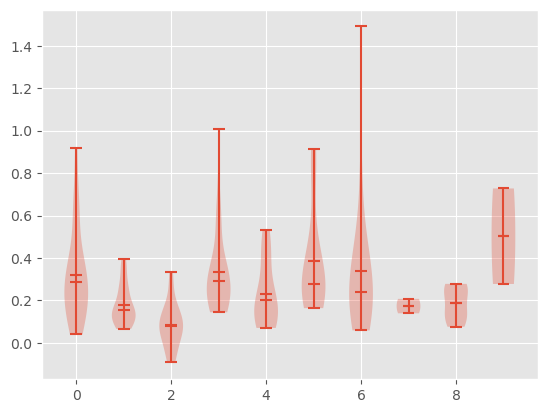

In [478]:
_ = plt.violinplot(b.values(), range(len(b)), showmeans=True, showmedians=True)

In [647]:
30000*5/ 3600

In [640]:
1/0

ZeroDivisionError: division by zero

In [637]:
a = np.random.random((4, 2))

In [638]:
a

array([[0.71176523, 0.70204735],
       [0.47230141, 0.92515607],
       [0.31433159, 0.29850572],
       [0.06807524, 0.29832377]])

In [639]:
a[1:]

array([[0.47230141, 0.92515607],
       [0.31433159, 0.29850572],
       [0.06807524, 0.29832377]])

In [532]:
list(map(ll.compose(len, list), each_n([1, 2, None, 3, 4, 5, 6], 3)))

In [568]:
list(map(list, every_n(4, (x for x in range(10)))))

In [569]:
list(every_nth(4, (x for x in range(10))))

In [572]:
list(map(op.itemgetter(1), it.groupby([1, 2, 2, 2, 3, 3, 4])))

In [586]:
def llmap(fn): return partial(map, fn)

In [599]:
np.diag((2, 2))

array([[2, 0],
       [0, 2]])

In [589]:
a = np.random.random(10)

In [590]:
a

array([0.71908713, 0.23110205, 0.46272951, 0.45442259, 0.93176078,
       0.6704355 , 0.41849171, 0.96132184, 0.94662429, 0.96165028])

In [594]:
np.sum(a>0.5)

6

In [555]:
a = (x for x in range(10))

pipe(zip(a, it.count()),
     partial(filter, lambda x: x[1]%4==0),
     partial(map, op.itemgetter(0)),
     list)

In [559]:
a = (x for x in range(10))

pipe(zip(a, it.count()),
     partial(it.groupby, key=lambda x: x[1]//4),
     partial(map, ll.compose(list, op.itemgetter(1))),
     list)

In [560]:
a = np.random.random((4, 3))

In [561]:
a

array([[0.38175529, 0.8844673 , 0.06480343],
       [0.06657066, 0.48160378, 0.86872782],
       [0.5618643 , 0.06150855, 0.36319413],
       [0.62200925, 0.98760196, 0.26414359]])

In [562]:
a[:3, -1]

array([0.06480343, 0.86872782, 0.36319413])

In [548]:
a

<generator object <genexpr> at 0x000001CD681C6B50>

In [130]:
from dataclasses import dataclass

@dataclass
class Circle:
    radius: int

@dataclass
class Rectangle:
    width: int
    height: int

@dataclass
class Triangle:
    bottom: int
    height: int

Shape = Circle|Rectangle|Triangle

def area(s: Shape):
    match s:
        case Circle(r): return math.pi * r** 2
        case Rectangle(w, h): return w* h
        case Triangle(b, h): return 0.5* b* h
    raise NotImplementedError(f"{type(s)} not supported.")

In [8]:
2** 0.5 * 2

2.8284271247461903

In [9]:
import sympy as sm

In [34]:
sm.init_printing(use_unicode=True)
a, b, c = sm.symbols('a b c')

In [37]:
Rx = sm.Matrix([
    [1, 0, 0], 
    [0, sm.cos(a), -sm.sin(a)],
    [0, sm.sin(a), sm.cos(a)],
])

In [38]:
Ry = sm.Matrix([
    [sm.cos(b), 0, sm.sin(b)],
    [0, 1, 0], 
    [-sm.sin(b), 0, sm.cos(b)],
])

In [40]:
Rz = sm.Matrix([
    [sm.cos(c), -sm.sin(c), 0],
    [sm.sin(c), sm.cos(c), 0],
    [0, 0, 1], 
])

In [42]:
Rx * Ry* Rz

⎡           cos(b)⋅cos(c)                         -sin(c)⋅cos(b)              
⎢                                                                             
⎢sin(a)⋅sin(b)⋅cos(c) + sin(c)⋅cos(a)  -sin(a)⋅sin(b)⋅sin(c) + cos(a)⋅cos(c)  
⎢                                                                             
⎣sin(a)⋅sin(c) - sin(b)⋅cos(a)⋅cos(c)  sin(a)⋅cos(c) + sin(b)⋅sin(c)⋅cos(a)   

    sin(b)    ⎤
              ⎥
-sin(a)⋅cos(b)⎥
              ⎥
cos(a)⋅cos(b) ⎦

In [577]:
ts = [t.timestamp() for t in ds]

In [44]:
op.contains?

Signature: op.contains(a, b, /)
Docstring: Same as b in a (note reversed operands).
Type:      builtin_function_or_method

In [45]:
op.contains([1, 2, 3], 1)

True

In [47]:
partial(op.contains, b=1)([1, 2, 3])

TypeError: _operator.contains() takes no keyword arguments

In [49]:
filter?

Init signature: filter(self, /, *args, **kwargs)
Docstring:     
filter(function or None, iterable) --> filter object

Return an iterator yielding those items of iterable for which function(item)
is true. If function is None, return the items that are true.
Type:           type
Subclasses:     

In [52]:
ll.bind1st(op.contains, 1)([1, 2, 3])

True

In [54]:
def tic_for(key, fn, *args, **kw):
    print("before", key)
    rt = fn(*args, **kw)
    print("after", key)
    return rt

In [61]:
def f():
    return 1

tic_for("abc", f)

before abc
after abc


In [62]:
ll.any_of?

Signature: ll.any_of(f, seq)
Docstring: <no docstring>
File:      d:\progms\pepper\py\ll\ll.py
Type:      function

In [72]:
any_of = ll.compose(any, map)
count_if = ll.compose(sum, map)

In [75]:
any_of(partial(op.le, 1), [0, 1, 2])
count_if(partial(op.le, 1), [0, 1, 2])

In [78]:
def ge(n):
    return lambda x: x>= n

In [96]:
sum([True, True, False])

In [97]:
a = ['/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_42_1698119141809569393.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_43_1698119141812631759.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_44_1698119141819480617.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_45_1698119141825782189.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_46_1698119141829882102.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_47_1698119141833154429.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-24/MapNetConstant_L1NNSGHA2PB000239_time_1698154783247741675/snippet_36561A992629A9CF95EFB5FB59776682_1781449660_48_1698119141838141258.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_123_1698400176329485633.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_124_1698400176333748002.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_125_1698400176339736150.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_126_1698400176349738989.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_127_1698400176355708674.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_128_1698400176361275321.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_198_1698408781362967820.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_199_1698408781366057491.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_200_1698408781369290904.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_201_1698408781371677892.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_202_1698408781373787539.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_203_1698408781377023736.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_204_1698408781382417419.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NNSGHB8NA000337_time_1698413218713394965/snippet_394270866590374E35C07EA2761A8A90_1486878204_205_1698408781388768471.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHB8NA000337_time_1698765104107434766/snippet_394270866590374E35C07EA2761A8A90_1644547379_241_1698743842309467631.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHB8NA000337_time_1698765104107434766/snippet_394270866590374E35C07EA2761A8A90_1644547379_242_1698743842311447901.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHB8NA000337_time_1698765104107434766/snippet_394270866590374E35C07EA2761A8A90_1644547379_243_1698743842313423243.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHB8NA000337_time_1698765104107434766/snippet_394270866590374E35C07EA2761A8A90_1644547379_244_1698743842316826477.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHB8NA000337_time_1698765104107434766/snippet_394270866590374E35C07EA2761A8A90_1644547379_245_1698743842321666753.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHB8NA000337_time_1698765104107434766/snippet_394270866590374E35C07EA2761A8A90_1644547379_246_1698743842331014444.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-30/MapNetConstant_L1NNSGHB8NA000337_time_1698673452900494815/snippet_394270866590374E35C07EA2761A8A90_1675282544_163_1698669301324567099.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-30/MapNetConstant_L1NNSGHB8NA000337_time_1698673452900494815/snippet_394270866590374E35C07EA2761A8A90_1675282544_164_1698669301328136626.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-30/MapNetConstant_L1NNSGHB8NA000337_time_1698673452900494815/snippet_394270866590374E35C07EA2761A8A90_1675282544_165_1698669301332327752.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-30/MapNetConstant_L1NNSGHB8NA000337_time_1698673452900494815/snippet_394270866590374E35C07EA2761A8A90_1675282544_166_1698669301340817620.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-30/MapNetConstant_L1NNSGHB8NA000337_time_1698673452900494815/snippet_394270866590374E35C07EA2761A8A90_1675282544_167_1698669301345132106.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-30/MapNetConstant_L1NNSGHB8NA000337_time_1698673452900494815/snippet_394270866590374E35C07EA2761A8A90_1675282544_168_1698669301347408837.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_401_1698064588758789889.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_402_1698064588762097125.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_403_1698064588768131220.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_404_1698064588771176122.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_405_1698064588774803933.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_406_1698064588779236408.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_412_1698064588822024759.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_413_1698064588825668985.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_414_1698064588829160828.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_415_1698064588832534529.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_416_1698064588835095531.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-23/MapNetConstant_L1NNSGHB8NA000337_time_1698070754780938105/snippet_394270866590374E35C07EA2761A8A90_1803891817_417_1698064588838157170.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-25/MapNetConstant_L1NNSGHB8NA000337_time_1698245227036043497/snippet_394270866590374E35C07EA2761A8A90_1817055489_374_1698237413976509564.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-25/MapNetConstant_L1NNSGHB8NA000337_time_1698245227036043497/snippet_394270866590374E35C07EA2761A8A90_1817055489_375_1698237413979425137.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-25/MapNetConstant_L1NNSGHB8NA000337_time_1698245227036043497/snippet_394270866590374E35C07EA2761A8A90_1817055489_376_1698237413982694053.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-25/MapNetConstant_L1NNSGHB8NA000337_time_1698245227036043497/snippet_394270866590374E35C07EA2761A8A90_1817055489_377_1698237413986303224.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-25/MapNetConstant_L1NNSGHB8NA000337_time_1698245227036043497/snippet_394270866590374E35C07EA2761A8A90_1817055489_378_1698237413989190670.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB6NA009408_time_1698324197969885563/snippet_5593835491F47FA36A59628C4D9DFBFD_1874260707_218_1698324181619067863.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB6NA009408_time_1698324197969885563/snippet_5593835491F47FA36A59628C4D9DFBFD_1874260707_219_1698324181622113148.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB6NA009408_time_1698324197969885563/snippet_5593835491F47FA36A59628C4D9DFBFD_1874260707_220_1698324181624623439.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB6NA009408_time_1698324197969885563/snippet_5593835491F47FA36A59628C4D9DFBFD_1874260707_221_1698324181627089984.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB6NA009408_time_1698324197969885563/snippet_5593835491F47FA36A59628C4D9DFBFD_1874260707_222_1698324181628870139.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB6NA009408_time_1698324197969885563/snippet_5593835491F47FA36A59628C4D9DFBFD_1874260707_223_1698324181630455951.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_156_1698813281665001163.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_157_1698813281670875790.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_158_1698813281677048541.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_159_1698813281681053719.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_160_1698813281684822441.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_161_1698813281690099316.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_165_1698813281708649921.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_166_1698813281711599155.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_167_1698813281714306875.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_168_1698813281717333616.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-11-01/MapNetConstant_L1NSPGHB6PA016026_time_1698848781814505094/snippet_6C3C708814283F51F98147D5C132DC0F_1150981707_169_1698813281720678321.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_30_1698727326823108047.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_31_1698727326827703813.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_32_1698727326832045840.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_33_1698727326834986980.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_34_1698727326837021749.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_120_1698727327102128650.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_121_1698727327105554161.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_122_1698727327109322245.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_123_1698727327113775189.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_124_1698727327117922168.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_305_1698744318554497450.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_306_1698744318558837532.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_307_1698744318564087643.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_308_1698744318568064380.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_309_1698744318572916456.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_310_1698744318578149798.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_311_1698744318582606014.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_312_1698744318588064967.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_313_1698744318593511439.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_314_1698744318597042651.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_315_1698744318599715965.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_316_1698744318602420096.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_317_1698744318605880328.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_318_1698744318610003472.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_319_1698744318612307360.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_320_1698744318614421478.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_435_1698750334827722272.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_436_1698750334833736075.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_437_1698750334839117212.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_438_1698750334841504697.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_439_1698750334843635884.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_440_1698750334845578520.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_493_1698754043855209272.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_494_1698754043857056769.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_495_1698754043859170581.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_496_1698754043862973068.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_497_1698754043868070870.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB6PA016026_time_1698759867689258939/snippet_6C3C708814283F51F98147D5C132DC0F_1228184736_498_1698754043870920647.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-28/MapNetConstant_L1NSPGHB6PA016026_time_1698495328592815426/snippet_6C3C708814283F51F98147D5C132DC0F_1693417940_191_1698495249042701372.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-28/MapNetConstant_L1NSPGHB6PA016026_time_1698495328592815426/snippet_6C3C708814283F51F98147D5C132DC0F_1693417940_192_1698495249046205355.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-28/MapNetConstant_L1NSPGHB6PA016026_time_1698495328592815426/snippet_6C3C708814283F51F98147D5C132DC0F_1693417940_193_1698495249048901978.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-28/MapNetConstant_L1NSPGHB6PA016026_time_1698495328592815426/snippet_6C3C708814283F51F98147D5C132DC0F_1693417940_194_1698495249051124789.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-28/MapNetConstant_L1NSPGHB6PA016026_time_1698495328592815426/snippet_6C3C708814283F51F98147D5C132DC0F_1693417940_195_1698495249053349936.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-28/MapNetConstant_L1NSPGHB6PA016026_time_1698495328592815426/snippet_6C3C708814283F51F98147D5C132DC0F_1693417940_196_1698495249055424805.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHA4PB000372_time_1698741049325314657/snippet_DFF5D81ACBDA812EC523E0B2212CA5CD_1409060190_55_1698740520486499160.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHA4PB000372_time_1698741049325314657/snippet_DFF5D81ACBDA812EC523E0B2212CA5CD_1409060190_56_1698740520490370962.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHA4PB000372_time_1698741049325314657/snippet_DFF5D81ACBDA812EC523E0B2212CA5CD_1409060190_57_1698740520496038918.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHA4PB000372_time_1698741049325314657/snippet_DFF5D81ACBDA812EC523E0B2212CA5CD_1409060190_58_1698740520502911264.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHA4PB000372_time_1698741049325314657/snippet_DFF5D81ACBDA812EC523E0B2212CA5CD_1409060190_59_1698740520505990146.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NNSGHA4PB000372_time_1698741049325314657/snippet_DFF5D81ACBDA812EC523E0B2212CA5CD_1409060190_60_1698740520507785563.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB7NA176414_time_1698757228134951040/snippet_EA6D304ED7D5528340CD4355F3273DBC_1366929742_363_1698744505126981350.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB7NA176414_time_1698757228134951040/snippet_EA6D304ED7D5528340CD4355F3273DBC_1366929742_364_1698744505129306572.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB7NA176414_time_1698757228134951040/snippet_EA6D304ED7D5528340CD4355F3273DBC_1366929742_365_1698744505131495887.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB7NA176414_time_1698757228134951040/snippet_EA6D304ED7D5528340CD4355F3273DBC_1366929742_366_1698744505134466217.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB7NA176414_time_1698757228134951040/snippet_EA6D304ED7D5528340CD4355F3273DBC_1366929742_367_1698744505146640345.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-31/MapNetConstant_L1NSPGHB7NA176414_time_1698757228134951040/snippet_EA6D304ED7D5528340CD4355F3273DBC_1366929742_368_1698744505151796533.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NSPGHB7NA176414_time_1698409211110267240/snippet_EA6D304ED7D5528340CD4355F3273DBC_1661738144_10_1698391821400304047.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NSPGHB7NA176414_time_1698409211110267240/snippet_EA6D304ED7D5528340CD4355F3273DBC_1661738144_11_1698391821403239121.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NSPGHB7NA176414_time_1698409211110267240/snippet_EA6D304ED7D5528340CD4355F3273DBC_1661738144_12_1698391821405123471.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NSPGHB7NA176414_time_1698409211110267240/snippet_EA6D304ED7D5528340CD4355F3273DBC_1661738144_7_1698391821390463816.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NSPGHB7NA176414_time_1698409211110267240/snippet_EA6D304ED7D5528340CD4355F3273DBC_1661738144_8_1698391821395268488.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-27/MapNetConstant_L1NSPGHB7NA176414_time_1698409211110267240/snippet_EA6D304ED7D5528340CD4355F3273DBC_1661738144_9_1698391821397650711.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB4NA000545_time_1698331266736022612/snippet_FC9A094D4B29308CF41C3BFA56E34224_1145862859_31_1698329828849048381.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB4NA000545_time_1698331266736022612/snippet_FC9A094D4B29308CF41C3BFA56E34224_1145862859_33_1698331024593895176.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB4NA000545_time_1698331266736022612/snippet_FC9A094D4B29308CF41C3BFA56E34224_1145862859_34_1698331024596236883.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB4NA000545_time_1698331266736022612/snippet_FC9A094D4B29308CF41C3BFA56E34224_1145862859_35_1698331024598570110.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB4NA000545_time_1698331266736022612/snippet_FC9A094D4B29308CF41C3BFA56E34224_1145862859_36_1698331024600481293.bin.pb', '/opt/rundata/sd+/CDRC002_sliced_part_000001/cd_rc_polygon/CDRC002_sliced_part_000001/cluster_000004/snippet_dir/nippet/2023-10-26/MapNetConstant_L1NNSGHB4NA000545_time_1698331266736022612/snippet_FC9A094D4B29308CF41C3BFA56E34224_1145862859_37_1698331024602237405.bin.pb']

In [99]:
len(a)

In [100]:
snippet_list = a

In [150]:
def get_id(f):
    *_, snippet_id, snippet_index, _ =  os.path.basename(f).split('_')
    return snippet_id, int(snippet_index)

a = defaultdict(list)
fs = {}
for f in snippet_list:
    sid, idx = get_id(f)
    a[sid].append(idx)
    fs[(sid, idx)] = f

In [115]:
from collections import defaultdict

In [127]:
b = {k: sorted(v) for k, v in a.items()}

In [162]:
case_files = []
for k, v in a.items():
    for _, xs in it.groupby(enumerate(v), key=lambda x: x[1]- x[0]):
        # print(k, list(xs))
        case_files.append(list(fs[(k, x[1])] for x in xs))

In [170]:
head, *tail = [1, ]

In [171]:
head

In [183]:
np.min(np.random.random((4, 2)), axis=0)

array([0.02428392, 0.06348833])

In [174]:
a = [30, 31, 32, 33, 34, 120, 121, 122, 123, 124, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 435, 436, 437, 438, 439, 440, 493, 494, 495, 496, 497, 498]

In [179]:
def index_segments(a):
    for k, xs in it.groupby(enumerate(a), key=lambda x: x[1]- x[0]):
        yield (x[1] for x in xs)

In [184]:
for ii in index_segments(a):
    print(list(ii))

[30, 31, 32, 33, 34]
[120, 121, 122, 123, 124]
[305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320]
[435, 436, 437, 438, 439, 440]
[493, 494, 495, 496, 497, 498]


In [187]:
a = [[1, 2, 3], [4, 5, 6]]

In [188]:
it.groupby?

Init signature: it.groupby(iterable, key=None)
Docstring:     
make an iterator that returns consecutive keys and groups from the iterable

iterable
  Elements to divide into groups according to the key function.
key
  A function for computing the group category for each element.
  If the key function is not specified or is None, the element itself
  is used for grouping.
Type:           type
Subclasses:     

False [1, 1, 2, 2]
True [3]
False [4, 5, 5]


In [206]:
a, *b = map(lambda x: x+1, filter(lambda x: x==-1, range(10)))

ValueError: not enough values to unpack (expected at least 1, got 0)

In [210]:
it.groupby?

Init signature: it.groupby(iterable, key=None)
Docstring:     
make an iterator that returns consecutive keys and groups from the iterable

iterable
  Elements to divide into groups according to the key function.
key
  A function for computing the group category for each element.
  If the key function is not specified or is None, the element itself
  is used for grouping.
Type:           type
Subclasses:     

In [209]:
b = (x for x in a if x% 2 ==1)

TypeError: 'int' object is not iterable

In [379]:
c = [[x]* 3 for x in range(5)]

In [380]:
c

[[0, 0, 0], [1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]]

In [386]:
sum?

Signature: sum(iterable, /, start=0)
Docstring:
Return the sum of a 'start' value (default: 0) plus an iterable of numbers

When the iterable is empty, return the start value.
This function is intended specifically for use with numeric values and may
reject non-numeric types.
Type:      builtin_function_or_method

In [390]:
sum(x**2 for x in range(10))

285

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6


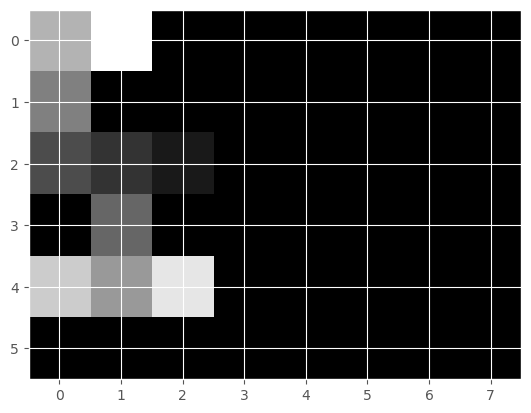

In [161]:
width, height = 6, 8
initcell = (2, 2)

cells = np.zeros((width, height), dtype=np.int32)

def n4_inmap(x, y):
    if x>0:
        yield x-1, y
    if y>0:
        yield x, y-1
    if x< width- 1:
        yield x+1, y
    if y< height- 1:
        yield x, y+ 1

def count_neighbors(x, y):
    return ll.count_if(lambda xy: cells[xy[0], xy[1]]!=0, n4_inmap(x, y))

room_cnt = 10
rooms = []

for iter in range(10000):
    print('iteration', iter)
    cells *= 0
    rooms.clear()

    rooms.append(initcell)
    cells[initcell[0], initcell[1]] = 1

    i = 0
    while i< len(rooms) and len(rooms)< room_cnt:
        px, py = rooms[i]
        i += 1
    
        for nx, ny in n4_inmap(px, py):
            if cells[nx, ny]!=0:
                continue
            if count_neighbors(nx, ny)> 1:
                continue
            if np.random.rand()< 0.5:
                continue
    
            # found 1
            rooms.append((nx, ny))
            cells[nx, ny] = len(rooms)
            if len(rooms)>= room_cnt or i==1:
                break
    
    if len(rooms)>= room_cnt:
        break


plt.imshow(cells, cmap='gray')
plt.grid('off')
# plt.axis('equal')

In [38]:
for nx, ny in n4_inmap(1, 1):
    print(nx, ny)

0 1
1 0
2 1
1 2


In [26]:
ll.count_if(lambda xy: xy[0]+xy[1]<2, n4_inmap(1, 1))

2

In [173]:
from scipy.optimize import least_squares

In [ ]:
import numpy as np

def fun_rosenbrock(x):

    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])

In [183]:
from dataclasses import dataclass

In [178]:
def f1(x):
    return x[0]-1

def f2(x):
    return x[0]- x[1]

def f3(x):
    return x[1]- 2

def f(x):
    return np.r_[f1(x), f2(x), f3(x), ]

In [228]:
class A:
    def f(self, x):
        return np.r_[f1(x), f2(x), f3(x), ]

In [229]:
a = A()

In [233]:
a = least_squares(f, x0=np.r_[1, 1])

In [234]:
type(a)

scipy.optimize._optimize.OptimizeResult

In [237]:
np.diag((2, 1)) @ np.r_[1, 2]

array([2, 2])

In [241]:
a = np.random.random((3, 3))

In [245]:
a.reshape(-1)

array([0.67325392, 0.40573744, 0.44358698, 0.31789329, 0.04365753,
       0.58289631, 0.4221903 , 0.89349663, 0.65727929])

In [250]:
np.c_[[0, 0], [0, 0]] + np.r_[1, 2].reshape((-1, 1))

array([[1, 1],
       [2, 2]])

In [181]:
lp = LittleProblem()

In [182]:
lp.solve()

In [184]:
from abc import ABC

In [185]:
class A(ABC):
    pass

In [187]:
a = A()

In [191]:
a = np.r_[1, 2, 3, ]

In [198]:
from enum import Enum

In [199]:
class A(Enum):
    A=0
    B = 1

In [203]:
A(0)

<A.A: 0>

In [197]:
a

[1, 2, 3]

In [88]:
list(map(lambda x: x[0]+','+ x[1], zip(b[0::2], b[1::2])))

['116.26713484,39.86545980', '116.26456035,39.86606067']

In [58]:
from enum import auto, Enum

In [72]:
class A:
    def __init(self):
        self.a: int

In [101]:
(1/math.cos(120/ (64000/2))- 1) * 64000/2 * math.sin(120/ (64000/2))

0.0008437529663374061

In [104]:
from collections import defaultdict

In [113]:
a = defaultdict(int)

In [114]:
a

defaultdict(int, {})

In [115]:
a[0] += 1

In [135]:
list(map(str, (x for x in range(10))))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [136]:
def f(x):
    print(f'f({x})')
    return x** 2

In [139]:
a = [[1, 2, 3], [4, 5, 6]]

In [160]:
class A:
    pass

In [165]:
A = np.c_[[1, 2], [3, 4]]

In [166]:
A

array([[1, 3],
       [2, 4]])

In [171]:
type(la.norm(A, axis=1))

numpy.ndarray

In [164]:
a is b

False

In [154]:
def as_tuple(x):
    b = [float(x) for x in x.split(',')]
    return list(zip(b[0::2], b[1::2]))

In [26]:
def normal_int(low, high):
    x = random.randint(low, high)+ random.randint(low, high)
    return x//2

In [27]:
def test_prob(fix, base=15):
    miss, hit, crit = 0, 0, 0
    for i in range(20000):
#         fix = acc - dex
        delta = normal_int(1, base+ fix)- normal_int(1, base)
        if delta< -5:
            miss += 1
        elif delta> 5:
            crit += 1
        else:
            hit += 1
            
    return miss, hit, crit

In [28]:
def get_probs(base):    
    mhc = []
    for f in range(-10, 11):
        m, h, c = test_prob(f, base)
        mhc.append((m, h, c, h+ c))
    mhc = np.array(mhc)
    mhc = mhc / 20000* 100
    
    return mhc

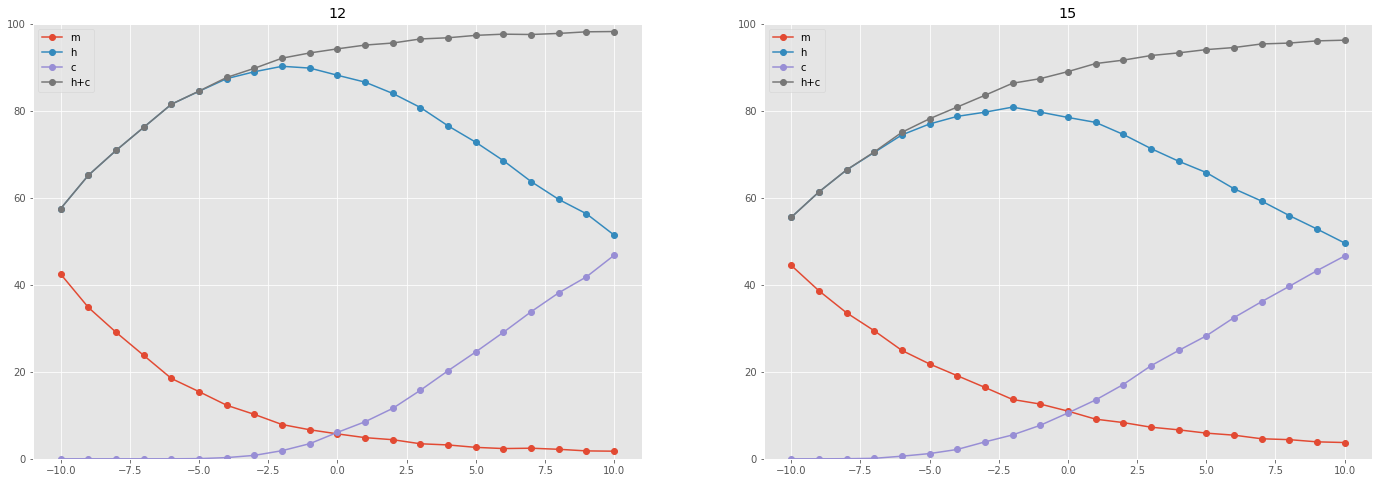

In [34]:
plt.figure(figsize=(24, 8))

for i, b in enumerate([12, 15]):
    plt.subplot(1, 2, i+ 1)
    plt.plot(range(-10, 11), get_probs(b), '-o')
    plt.ylim([0, 100])
    plt.legend(["m", "h", "c", "h+c"])
    plt.title(str(b))

In [36]:
p12 = get_probs(12)

In [37]:
p15 = get_probs(15)

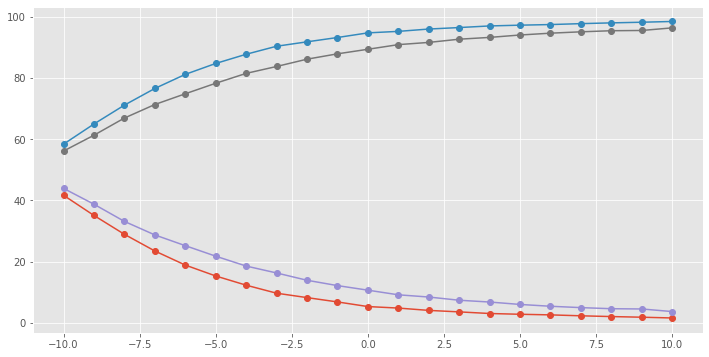

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(-10, 11), p12[:, [0, -1]], '-o')
plt.plot(range(-10, 11), p15[:, [0, -1]], '-o')

In [48]:
list(zip(range(-10, 11), p12[: ,2]))

[(-10, 0.0),
 (-9, 0.0),
 (-8, 0.0),
 (-7, 0.0),
 (-6, 0.0),
 (-5, 0.04),
 (-4, 0.245),
 (-3, 0.9299999999999999),
 (-2, 1.905),
 (-1, 3.615),
 (0, 5.63),
 (1, 8.845),
 (2, 12.315),
 (3, 15.934999999999999),
 (4, 20.055),
 (5, 24.92),
 (6, 29.220000000000002),
 (7, 33.93),
 (8, 38.105),
 (9, 42.015),
 (10, 45.85)]

In [28]:
with open('D:/Feishu/downloads/需重新跑算法数据7.19.txt', encoding='utf-8') as fin:
    a = fin.read()

In [29]:
a

'103276\n103312\n103313\n107542\n103370\n103391\n103404\n106441\n103437\n107748\n106445\n106452\n109920\n107757\n107310\n109933\n107465\n109897\n107551\n107680\n107615\n107537\n107766\n107263\n107297\n107347\n107424\n107411\n109927\n103328\n108861\n107661\n107403\n109932\n109921\n109909\n107382\n107296\n103403\n108443\n107592\n107586\n107419\n107594\n107585\n107584\n107575\n107574\n107515\n107547\n107531\n107507\n107505\n107496\n107569\n107681\n107487\n107412\n107387\n107670\n107468\n109925\n107391\n107710\n107749\n109913\n107738\n107298\n107392\n107519\n109935\n107284\n109894\n107459\n109931\n107750\n110823\n110826\n110828\n109892\n105798\n107081\n105917\n105930\n107159\n107053\n107061\n106908\n105929\n107083\n109186\n106967\n109787\n110702\n110701\n110811\n109962\n109857\n105874\n107054\n106709\n110220\n110775\n110834\n110224\n110660 自建图不全\n110645\n106768\n106994  105830 106612\n\n110531\n110690\n110598\n110487\n110646\n110496'

In [31]:
a = set(re.findall(r'\d+', a))

In [33]:
','.join(a)

'107551,107585,103370,107496,106994,106908,107592,106445,107766,106452,107054,110826,110834,110690,107670,107574,107424,110701,107748,107757,109933,110828,108861,109909,110702,105874,109927,107411,109897,103276,107710,110531,109932,107507,110224,107575,107296,107749,110645,103312,103437,109787,106967,110487,107392,107419,109920,109921,105929,107661,109935,107387,110496,107053,109892,107515,105798,106612,109894,107284,105830,107615,110775,107750,107347,107505,107569,107531,107412,107391,103313,107537,107680,105930,109913,103391,107382,107487,106709,107594,107061,109962,109931,110598,105917,110660,108443,107681,107738,107542,107468,109857,103404,107584,103403,110220,109925,107403,106441,107263,110823,103328,107297,107159,107547,107298,107083,107310,107586,107519,109186,107081,107459,110811,110646,107465,106768'

In [16]:
la.norm(a.T @ a - np.eye(3))

0.002720474453552363

In [22]:
la.norm(a, axis=1)

array([0.99903791, 0.9990375 , 0.99999953])

In [41]:
def count_of(frame, model):
#     try:
    return int(frame[frame.modelType==model].iloc[0]["count"])
#     except:
#         return 0

In [45]:
len(t)

43

In [48]:
frame  = pd.DataFrame(t)

In [53]:
frame.sort_values(by = '0', )

KeyError: '0'

In [54]:
frame.to_csv('D:/Feishu/downloads/xnet_count.csv', index=None, header=['city', 'total', 'e28a', 'e38', 'f30'])

In [55]:
frame = pd.read_csv('D:/Feishu/downloads/xnet_count.csv')

In [59]:
ff = frame.sort_values(by='total', ascending=False)

In [60]:
ff.to_csv('D:/Feishu/downloads/xnet_count_sorted.csv', index=None)

In [63]:
ll.gu.wgs2gcj(116.483798,  39.914260)

(116.48986656419213, 39.91552957613433)

In [33]:
with open('D:/Feishu/downloads/无锡需新建.txt', 'w', encoding='utf-8') as fout:
    for _, r in frame.iterrows():
        fout.write(f'{r["坐标"]},0,{r["省份"]},{r["城市"]}\n')

In [67]:
np.r_[320, 180] / 128

array([2.5    , 1.40625])

In [38]:
frame = load_qq_csv('D:/Feishu/downloads/上海北京.csv')

In [10]:
def need_check(r):
    return r.status==-1 and not str(r.severity_level).startswith('not met')

In [43]:
frame.iloc[367].severity_level

'not met: covered 44.78% { cid: 105615, gid: 0, cases: 41, dis: 0.000 } { cid: 105615, gid: 4, cases: 88, dis: 0.000 } { cid: 105615, gid: 5, cases: 90, dis: 0.000 }'

In [5]:
la.inv(np.c_[[2, 1], [-2, 1]])/8

array([[ 0.03125,  0.0625 ],
       [-0.03125,  0.0625 ]])

In [42]:
frame = pd.read_csv('D:/Feishu/downloads/gt测试路口-任务坐标gcj.csv')

In [8]:
frame = pd.read_excel('D:/Feishu/downloads/无锡需创任务点.xlsx')

In [10]:
with open('D:/Feishu/downloads/无锡需创任务点.txt', 'w', encoding='utf-8') as fout:
    for _, r in frame.iterrows():
        fout.write(f'{r["坐标"]},0,{r["省份"]},{r["城市"]}\n')

In [65]:
frame = load_qq_csv('D:/Feishu/downloads/frame.csv')

In [56]:
frame =  frame[ ~frame.severityLevel.str.startswith('met: using mode', na=False)]

In [66]:
frame[frame.severityLevel.isna()]

,taskId,city,province,severityLevel,wfrId,status,taskLng,taskLat,updateTime,case_size,max_size
546,107182,北京市,北京市,NaN,NaN,NaN,116.218700,39.764383,NaN,0,0.0
567,108392,北京市,北京市,NaN,NaN,NaN,116.434462,39.924466,NaN,0,0.0


In [73]:
a = [106923, 106924, 106926, 106927, ]

In [74]:
frame[frame.taskId.isin(a)]

,taskId,city,province,severityLevel,wfrId,status,taskLng,taskLat,updateTime,case_size,max_size
364,106923,北京市,北京省,"met: covered 59.59% { cid: 106923, gid: 0, cas...",275939.0,0.0,116.387077,39.832003,2023-07-03 19:01:07.800384,45,0.000
365,106924,北京市,北京省,"met: covered 70.91% { cid: 106924, gid: 0, cas...",276084.0,0.0,116.526975,39.892961,2023-07-03 19:02:10.027299,90,76.576
366,106926,北京市,北京省,"met: covered 70.02% { cid: 106926, gid: 0, cas...",274747.0,2.0,116.367129,40.081281,2023-07-03 18:43:42.780278,89,0.000
367,106927,北京市,北京省,"not met: covered 38.70% { cid: 106927, gid: 1,...",275981.0,0.0,116.564289,40.113249,2023-07-03 19:01:07.971913,22,0.000


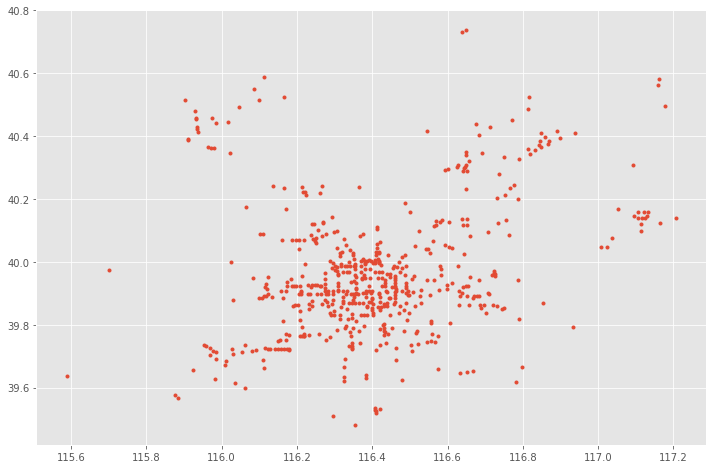

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(frame.taskLng, frame.taskLat, '.')

In [85]:
ll.gu.gcj2wgs(116.48946941,39.91548027)

(116.48342186183157, 39.91422720303092)

In [83]:
str.count(a, ',')

42

In [84]:
a

'中山市,珠海市,肇庆市,惠州市,合肥市,台州市,南通市,盐城市,绍兴市,嘉兴市,扬州市,徐州市,芜湖市,常州市,金华市,南京市,无锡市,宜昌市,天津市,石家庄市,北京市,武汉市,长沙市,西安市,郑州市,青岛市,昆明市,济南市,南宁市,南昌市,贵阳市,福州市,太原市,沈阳市,泉州市,临沂市,赣州市,厦门市,湖州市,汕头市,黄石市,三亚市,海口市'

In [78]:
math.radians(0.2)* 300

1.0471975511965979

In [19]:
for x in a:
    if not x in b:
        b[x] = 1
    else:
        b[x] += 1

In [21]:
'''105832
105853
105874
105899
106852
106918
106920
106946
105798
107094
107100
107125
107136
107142
107146
106912
106910
106897
105917
107069
107064'''.replace('\n', ',')

'105832,105853,105874,105899,106852,106918,106920,106946,105798,107094,107100,107125,107136,107142,107146,106912,106910,106897,105917,107069,107064'

In [24]:
frame = pd.read_excel('D:/Feishu/downloads/需跑算法数据.xlsx')

In [27]:
','.join(map(str, frame.id))

'105845,109160,105847,109171,106866,108809,107781,109169,106711,108383,107169,107211,108382,108379,108899,109167,109155,109166,109170,109157,109158,109168,106875,109161,109162,109163,105888,109165,109186,105742,105798,105891,105933,106626,106709,106780,106853,106873,105832,105874,106852,106854,105751,105853,106732,106746,106751,106762,106768,106787,106806,106822,106863,106869,106886,106899,106900,106925,106927,106933,107032,107033,107034,107035,107039,107044,107045,107049,107060,107067,106892,106908,106932,106938,106946,106947,106960,106964,106965,106966,106967,106968,106977,106981,106741,106770,106775,106791,106795,106807,106808,106815,107028,107029,107042,107050,107051,107052,107053,107054,107055,107056,107057,107059,107061,107062,107064,107065,107066,107069,107071,106901,105768,105772,105837,105860,105901,105902,105909,105920,105930,105931,105833,105896,105917,105929,105928,105911,105760,105769,105737,105747,105797,105805,105813,105796,105777,105775,105786,106697,106846,106847,10687

In [28]:
'''106866
106780
106746
106751
106759
106762
106768
106787
106806
106822
106863
106869
106900
106925
106927
106933
106934
107032
107033
107034
107035
107039
107044
107045
107048
107049
107067
106892
106908
106932
106938
106946
106947
106960
106964
106965
106966
106967
106968
106977
106981
106741
106770
106775
106791
106807
106808
106815
107028
107029
107042
107050
107051
107052
107053
107054
107055
107056
107057
107059
107061
107062
107064
107065
107066
107069
107071
106799'''.replace('\n', ',')

'106866,106780,106746,106751,106759,106762,106768,106787,106806,106822,106863,106869,106900,106925,106927,106933,106934,107032,107033,107034,107035,107039,107044,107045,107048,107049,107067,106892,106908,106932,106938,106946,106947,106960,106964,106965,106966,106967,106968,106977,106981,106741,106770,106775,106791,106807,106808,106815,107028,107029,107042,107050,107051,107052,107053,107054,107055,107056,107057,107059,107061,107062,107064,107065,107066,107069,107071,106799'

In [12]:
a = [int(x) for x in a]

'105154,105155,105156,105157,105161,105171,105172,105173,105178,105194'

In [57]:
for l in a.split('\n'):
    print(f"{l},0,北京省,北京市")

116.259972,39.924187,0,北京省,北京市
116.252943,39.925621,0,北京省,北京市
116.264609,39.924278,0,北京省,北京市
116.235972,39.896924,0,北京省,北京市
116.310103,39.932325,0,北京省,北京市
116.340673,39.986488,0,北京省,北京市
116.40871,40.022477,0,北京省,北京市
116.308088,39.962398,0,北京省,北京市
116.301297,39.974545,0,北京省,北京市
116.300726,39.985356,0,北京省,北京市
116.369351,39.987546,0,北京省,北京市
116.454824,39.980693,0,北京省,北京市
116.459989,39.954464,0,北京省,北京市
116.424876,39.969204,0,北京省,北京市
116.418052,39.969019,0,北京省,北京市
116.407715,39.969213,0,北京省,北京市


In [135]:
frame = load_qq_csv('D:/Feishu/downloads/环岛.csv')

In [145]:
frame[frame.taskid.isin(a)]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,case_size,max_size
26,105851,北京市,北京省,"met: covered 81.15% { cid: 105851, gid: 0, cas...",266037,2,116.439409,39.870642,2023-05-27 09:32:02.380,78,126.491
27,105852,北京市,北京省,"met: using mode 1, no size check.",267172,2,116.222203,39.992533,2023-06-02 09:59:45.942,0,0.000
50,105877,北京市,北京省,"met: using mode 1, no size check.",267752,-1,117.122870,40.158390,2023-06-05 18:22:30.408,0,0.000
51,105884,北京市,北京省,"met: using mode 1, no size check.",267731,2,116.866845,40.375119,2023-06-05 18:22:30.335,0,0.000
52,105899,北京市,北京省,"met: using mode 1, no size check.",267706,2,116.626674,39.987897,2023-06-05 18:22:30.245,0,0.000
55,106645,北京市,北京市,"met: covered 85.68% { cid: 106645, gid: 0, cas...",266856,2,119.545093,32.403256,2023-05-29 14:58:35.248,89,148.207
56,106695,北京市,北京省,"met: covered 69.84% { cid: 106695, gid: 1, cas...",266868,2,116.433877,39.924459,2023-05-29 15:45:02.146,80,96.441
58,106843,北京市,北京市,"not met: covered 75.02% { cid: 106843, gid: 0,...",267684,-1,116.434107,39.925520,2023-06-05 09:48:23.801,94,17.639


In [148]:
b = [int(x) for x in '''105751
105762
105771
105781
105793
105819
105823
105831
105845
105859
105867
105868
105871
105872
105874
105875
105876
106970
107005
107006
107007
107008'''.split('\n')]

In [159]:
from datetime import timedelta

In [161]:
datetime(2023, 6, 8)- timedelta(30)

datetime.datetime(2023, 5, 9, 0, 0)

In [180]:
frame = pd.read_excel('D:/Feishu/downloads/杭州需创建任务.xlsx')

In [182]:
with open('D:/Feishu/downloads/杭州需创建任务.txt', 'w', encoding='utf-8') as fout:
    for _, r in frame.iterrows():
        fout.write(f"{r['坐标']},0,{r['省份']},{r['城市']}\n")

In [178]:
os.path.basename(os.path.dirname('D:/Feishu/downloads'))

'Feishu'

In [186]:
5562.66/ (34108.08- 6000)

0.19790252482560172

In [39]:
frame = load_qq_csva('D:/Feishu/downloads/桥下路口.csv')

In [97]:
frame = pd.read_csv('D:/Feishu/downloads/北京.csv')

,lon,lat,alt,province,city,roads,heat,sat_size
0,116.405216,39.906696,0,北京市,北京市,"tertiary,primary",54.166667,46.640000
1,116.400408,39.906594,0,北京市,北京市,"tertiary,primary",71.272727,59.052591
2,116.420798,39.907027,0,北京市,北京市,"primary,secondary",72.916667,77.380000
3,116.402641,39.931960,0,北京市,北京市,primary,22.461538,42.797927
4,116.410928,39.932233,0,北京市,北京市,primary,29.461538,43.078160
...,...,...,...,...,...,...,...,...
14715,116.629363,39.678551,0,北京市,北京市,residential,0.000000,0.000000
14716,116.628215,39.680144,0,北京市,北京市,residential,0.000000,0.000000
14717,115.547388,39.633357,0,北京市,北京市,residential,0.000000,0.000000
14718,115.903686,39.648143,0,北京市,北京市,residential,0.000000,0.000000


In [70]:
data = load_json('D:/Feishu/downloads/beijing_area.json')

In [89]:
def get_size(d):
    return max(sum([x['size'] for x in d], []), default=-1)

In [91]:
sizes = list(map(lambda x: get_size(data[str(x)]), range(len(data))))

In [100]:
old = np.r_[frame['sat_size']]

In [117]:
frame = load_qq_csv('D:/Feishu/downloads/gt测试路口.csv')

In [127]:
subframe = frame[frame.taskid.isin(a)]

In [134]:
subframe[['taskid', 'city', 'province', 'task_lng', 'task_lat']].to_csv('D:/Feishu/downloads/gt测试路口-任务坐标gcj.csv', index=None)

In [132]:
subframe.head()

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,case_size,max_size
0,105154,广州市,广东省,"met: covered 58.13% { cid: 105154, gid: 0, cas...",265190,0,113.226439,23.388730,2023-05-25 18:41:15.288,87,56.664
1,105155,广州市,广东省,NaN,265191,0,113.377055,23.046612,2023-05-25 18:41:15.294,0,0.000
2,105156,广州市,广东省,NaN,265192,0,113.500762,23.164180,2023-05-25 18:41:15.303,0,0.000
3,105157,广州市,广东省,NaN,265193,0,113.502578,23.172140,2023-05-25 18:41:15.309,0,0.000
4,105158,广州市,广东省,NaN,265194,0,113.458790,23.170818,2023-05-25 18:41:15.314,0,0.000


In [122]:
a = [int(x) for x in a.split('\n')]

In [123]:
a

[103502,
 105154,
 105155,
 105156,
 105157,
 105158,
 105159,
 105160,
 105161,
 105162,
 105163,
 105164,
 105165,
 105167,
 105168,
 105169,
 105170,
 105171,
 105172,
 105173,
 105176,
 105177,
 105178,
 105180,
 105181,
 105182,
 105183,
 105184,
 105185,
 105186,
 105187,
 105188,
 105190,
 105192,
 105193,
 105194,
 105195,
 105196,
 105197,
 105198,
 105199,
 105200,
 105201,
 105202,
 105205,
 105206,
 105207,
 105209,
 105211,
 105212,
 105213,
 105214,
 105215,
 105216]

In [96]:
frame.to_csv('D:/Feishu/downloads/北京2.csv', index=None)

In [51]:
a = np.r_[113.387614, 22.522415]
b = np.r_[113.387544, 22.522440]
c = np.r_[113.387534, 22.522424]

In [54]:
def normalized(s):
    return s/ la.norm(s)

In [57]:
math.degrees(math.acos(normalized(b- a) @ normalized(c- a)))

13.235037328266225

In [56]:
a='''116.259972,39.924187
116.252943,39.925621
116.264609,39.924278
116.235972,39.896924
116.310103,39.932325
116.340673,39.986488
116.40871,40.022477
116.308088,39.962398
116.301297,39.974545
116.300726,39.985356
116.369351,39.987546
116.454824,39.980693
116.459989,39.954464
116.424876,39.969204
116.418052,39.969019
116.407715,39.969213'''

In [53]:
ll.gu.gcj2wgs(116.259972,39.924187)

(116.25394077248795, 39.92296852134102)

In [224]:
xyz = []
for _, r in frame.iterrows():
    lon, lat = r['坐标'].split(',')
    xyz.append(ll.gu.lla2xyz(float(lon), float(lat), 0))
xyz = np.array(xyz)

In [201]:
def is_near(r):
    lon, lat = r['坐标'].split(',')
    p = np.r_[ll.gu.lla2xyz(float(lon), float(lat), 0)]
    
    return not np.any(np.sum((xyz- p)**2, axis=1)< 40000)

frame[frame.apply(is_near, axis=1)].to_csv('D:/Feishu/downloads/桥墩路口-uniqued2.csv', index=None)

In [226]:
xyz.shape

(2217, 3)

In [227]:
from sklearn import neighbors

In [229]:
import sklearn

In [232]:
A = sklearn.neighbors.radius_neighbors_graph(xyz, 200)

In [235]:
import scipy

In [239]:
dis = scipy.spatial.distance.cdist(xyz, xyz, metric='sqeuclidean')

In [245]:
dis = dis<40000

In [247]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components

In [253]:
m = csr_matrix(dis)

In [272]:
cnt, labels = connected_components(dis)

In [260]:
for i in range(cnt):
    indea
len(labels)

2217

In [285]:
graphs = [np.where(labels==i)[0] for i in range(cnt)]

In [283]:
np.where(labels==2)

(array([  2, 105], dtype=int64),)

In [287]:
len([g[0] for g in graphs])

1352

In [265]:
labels = list(labels)

In [269]:
indices = [labels.index(i) for i in range(cnt)]

In [271]:
for i, v in enumerate(indices):
    if i!=v:
        print(i, v)
        break

28 29


In [159]:
frame = pd.read_csv('D:/Feishu/downloads/_select_pt_id_as_taskId_pt_city_pt_province_pt_severity_level_wf_202305260906.csv')

In [182]:
frame = load_qq_csv('D:/Feishu/downloads/_select_pt_id_as_taskId_pt_city_pt_province_pt_severity_level_wf_202305261448.csv')

In [165]:
def not_fine(r):
    return r.status==-1 and not (str(r.severity_level).startswith('not met'))

In [180]:
frame[frame.apply(not_fine, axis=1)]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
9,105163,广州市,广东省,NaN,265292,-1,113.415148,23.166482,2023-05-26 10:39:29.161
14,105168,广州市,广东省,NaN,265301,-1,113.467920,23.170706,2023-05-26 11:11:33.094
17,105171,广州市,广东省,NaN,265304,-1,113.426062,23.191116,2023-05-26 11:11:33.109
22,105176,广州市,广东省,NaN,265313,-1,113.333668,23.118398,2023-05-26 11:47:15.272
24,105178,广州市,广东省,NaN,265315,-1,113.343279,23.111785,2023-05-26 11:47:15.281
27,105181,广州市,广东省,NaN,265318,-1,113.451236,23.166010,2023-05-26 11:47:15.298
28,105182,广州市,广东省,NaN,265319,-1,113.382691,23.168498,2023-05-26 11:47:15.304
30,105184,广州市,广东省,NaN,265321,-1,113.437948,23.171792,2023-05-26 11:47:15.313
38,105192,广州市,广东省,NaN,265329,-1,113.347788,23.117263,2023-05-26 11:47:15.354
44,105198,广州市,广东省,NaN,265335,-1,113.452334,23.179996,2023-05-26 11:47:15.386


In [195]:
str.join(',', map(str, frame[frame.status!=2].taskid))

'105154,105156,105157,105158,105159,105163,105168,105171,105176,105178,105181,105182,105184,105192,105198,105202,105203,105205,105212,105214'

In [194]:
34/43* 63

49.81395348837209

In [171]:
ll.gu.gcj2wgs( 120.02061099,31.77901383)

(120.015744758633, 31.78091175055081)

In [14]:
from datetime import datetime

In [205]:
frame = pd.read_excel('D:/Feishu/downloads/新增路口.xlsx')

In [33]:
with open('新增路口task.txt', 'w', encoding='utf-8') as fout:
    for i, r in frame.iterrows():
        fout.write(f'{r["坐标"]},0,{r["省份"]},{r["城市"]}\n')

In [39]:
xs, ys, zs = [], [], []
for _, r in oldframe.iterrows():
    lon, lat = r['坐标（偏转后）'].split(',')
    # lon, lat = r.task_lng, r.task_lat
    x, y, z = ll.gu.lla2xyz(float(lon), float(lat), 0)
    xs.append(x)
    ys.append(y)
    zs.append(z)

xyzs = np.c_[xs, ys, zs]

In [34]:
pwd

'D:\\progms\\watermelon'

In [2]:
frame = pd.read_csv('D:/Feishu/downloads/全国行政区.csv')

In [ ]:
def as_tuple(x):
    lon, lat = x.split()
    lon, lat = float(lon), float(lat)
    return ll.gu.wgs2gcj(lon, lat)

for i, r in frame[frame.deep==2].iterrows():
    if r.polygon=='EMPTY':
        print(f'ignore {r.ext_path}')
        continue
        
    kml = simplekml.Kml()

    for coordstr in r.polygon.split(';'):    
        pol = kml.newpolygon(name=r.ext_path, outerboundaryis=[as_tuple(x) for x in coordstr.split(',')])
        pol.style.linestyle.color = simplekml.Color.lightgreen
        pol.style.linestyle.width = 3
        pol.style.polystyle.fill = False

    kml.save(f'D:/Feishu/downloads/a/{r.ext_path}.kml')

In [97]:
for coordstr in r.polygon.split(';')

id                                                     230883
pid                                                      2308
deep                                                        2
name                                                      抚远市
ext_path                                        黑龙江省 佳木斯市 抚远市
geo                                       134.30786 48.365027
polygon     133.678347 47.84823,133.678531 47.851714,133.6...
Name: 741, dtype: object

In [100]:
for x in coordstr.split(','):
    as_tuple(x)

AssertionError: not in china

In [101]:
x

'135.055633 48.454516'

In [102]:
lon, lat = x.split()
lon, lat = float(lon), float(lat)

In [108]:
import ll.geodesic_utils as llgu

In [109]:
llgu.wgs2gcj(lon, lat)

AssertionError: not in china

In [50]:
indices = []
for i, r in frame.iterrows():
    lon, lat = r['坐标（偏转后）'].split(',')
    x, y, z = ll.gu.lla2xyz(float(lon), float(lat), 0)
    xyz = np.r_[x, y, z]
    if np.any(np.sqrt(np.sum((xyzs - xyz)** 2, axis=1)) < 200):
        pass
    else:
        indices.append(i)
        
len(indices)

1517

In [53]:
frame.iloc[indices].to_csv('D:/Feishu/downloads/自身去重及与旧数据去重-uniqued2.csv', index=None)

In [12]:
','.join(ids[:n])

'100297,100306,100309,100312,100313,99189,100318,99193,100319,99194,100320,99198,100321,99204,100325,99210,100328,99223,100329,99225,100330,99228,100335,99232,100341,99233,100345,99234,100346,99240,100353,99243,100356,99245,100359,99246,100360,99255,100363,99256,100364,99262,100367,99263,100370,99266,100373,99268,100380,99269,100384,99272,100387,99275,100388,99282,100389,99286,100392,99287,100400,99293,100401,99295,100414,99302,100419,99308,100424,99310,100427,99312,100431,99313,100432,99316,100439,99333,100440,99334,100441,99337,100445,99342,99344,100449,99352,100451,99354,100457,99365,100463,99377,100469,99378,100474,99379,100488,99384,100493,99387,100502,99388,100506,99393,100507,99401,100512,99408,100518,99418,100520,99424,100523,99429,100528,99435,100536,99444,100538,99447,100540,99449,100543,99453,100547,99456,100552,99457,100557,99459,100558,99460,100559,99461,100561,99467,100562,99468,100563,99470,100573,99475,100575,99477,100577,99485,100580,99487,100581,99493,100582,99495,100

In [13]:
','.join(ids[n:])

'94896,94133,94909,95689,95690,94924,94146,94927,94147,94150,95713,94151,95715,94153,95717,94154,94157,94971,95740,94162,94983,94163,94166,95756,94168,95003,94172,95768,94183,95770,95772,94193,95785,95036,95787,94202,95051,95793,94212,95053,94213,95054,95055,95810,95072,95817,94221,95078,95822,94222,95080,94232,94233,94234,95845,94236,95087,95851,94237,94238,95859,94239,95094,95864,94241,95869,95100,95103,95105,95881,94255,95107,95109,95888,95900,94263,95907,94264,95114,95908,95931,94269,94271,95127,94273,95128,95941,95129,95945,94278,95131,95946,95957,95143,95967,94287,95144,95970,94288,94291,95149,95979,94292,95153,94293,95986,94294,95155,95987,95996,94297,95159,95999,94298,95162,96001,95165,96007,95166,96009,94307,96011,95176,94310,96013,94311,96015,95191,96017,95192,96022,95193,96023,94320,95202,96034,94323,96035,95205,96039,94334,95207,96042,95209,96044,95210,94347,95213,96051,94349,95215,96059,94351,95217,95225,96074,95226,94355,96081,95232,96085,94358,95243,96093,94360,95244,952

In [12]:
p, q = 0.5, 0.75

def prop_of_i(n, i, p):
    return comb(n, i)* p** i* (1-p)** (n- i)

def prop_for(n):
    s = 0
    for j in range(1, n+1):
        for i in range(j):
            s += prop_of_i(n, i, p) * prop_of_i(n, j, q)
    return s
        
for i in range(1, 30):
    print(i, prop_for(i))

1 0.375
2 0.515625
3 0.59765625
4 0.655517578125
5 0.70001220703125
6 0.7358779907226562
7 0.7656497955322266
8 0.7908609509468079
9 0.8125190287828445
10 0.8313268404453993
11 0.847797158639878
12 0.8623173951928038
13 0.8751884834564407
14 0.8866494907824745
15 0.8968938734954008
16 0.9060806007172353
17 0.9143420002435763
18 0.9217894380565349
19 0.928517523445719
20 0.9346072845972304
21 0.9401286088361639
22 0.9451421469852754
23 0.9497008201208071
24 0.9538510265226771
25 0.9576336192408084
26 0.961084705821146
27 0.9642363084825666
28 0.9671169135802509
29 0.9697519323433618


In [14]:
sum([int(x) for x in '''44
27
18
28
12
5
37
14
18
7
2'''.split('\n')])

212

In [29]:
xyzs = np.array(xyzs)

In [48]:
frame = pd.read_excel('D:/Feishu/downloads/异型路口坐标记录（偏转后）.xlsx')

In [46]:
with open('D:/Feishu/downloads/珠三角异型路口坐标记录-cp.txt', 'w') as fout:
    for i, r in frame.iterrows():
        lon, lat = ll.gu.wgs2gcj(r.经度, r.纬度)
        fout.write(f'{lon},{lat},0,广东省,{r.城市}\n')

In [9]:
from datetime import datetime

In [25]:
datetime.fromtimestamp(1675958400000/1000)

datetime.datetime(2023, 2, 10, 0, 0)

In [24]:
datetime.fromtimestamp(1678377600000/1000)

datetime.datetime(2023, 3, 10, 0, 0)

In [19]:
int(datetime(2023, 3, 10).timestamp()* 1000)

1678377600000

In [8]:
math.cos(math.pi/4)

0.7071067811865476

In [12]:
(3.75* 4 * 2**0.5)** 2

450.00000000000006

In [2]:
import json

In [21]:
x = np.linspace(0, math.pi/4)

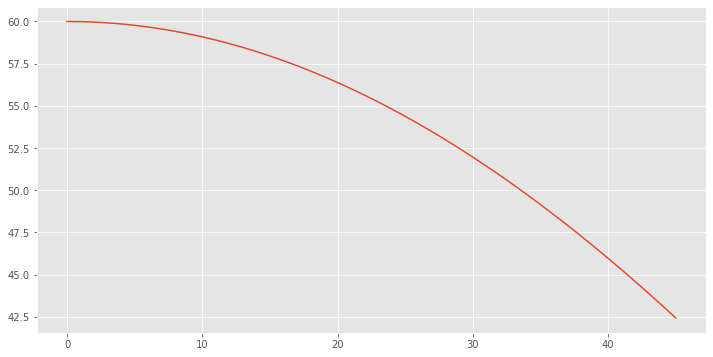

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(np.degrees(x), k* np.cos(x)+ b)

In [49]:
x1, y1 = 1, 60
x2, y2 = np.cos(math.pi/3), 30

k = (y2-y1)/ (x2-x1)
b = y1- k* x1

print(k, b)

60.000000000000014 -1.4210854715202004e-14


In [60]:
2000/(6*4* 2)

41.666666666666664

In [71]:
def is_uniq(r):
    lon, lat = r['偏转后坐标'].split(',')
    xyz = ll.gu.lla2xyz(float(lon), float(lat), 0)
    q = np.array(xyz)
    for i, p in enumerate(xyzs):
        dis = la.norm(p- q)
        if dis< 200:
            if i< 2245:
                taskid = f70.iloc[i].taskId
            else:
                taskid = f80.iloc[i- 2245].taskid
            print(f"{r.row_index},{taskid},{dis:.2f}")
            return False
        
    return True

In [65]:
frame['row_index'] = range(430)

In [8]:
a = '''images {
  image: "/assets/actors/dog.png"
  sprite_trim_mode: SPRITE_TRIM_MODE_OFF
}
images {
  image: "/assets/actors/thief_f.png"
  sprite_trim_mode: SPRITE_TRIM_MODE_OFF
}'''

In [28]:
os.path.splitext("/assets/actors/dog.png")

('/assets/actors/dog', '.png')

In [6]:
ll.gu.gcj2wgs(113.375666, 23.12723)

(113.37015456880859, 23.129739509932776)

In [74]:
with open('D:/Feishu/downloads/bt-tasks.txt', 'w') as fout:
    for i, row in subframe.iterrows():
        fout.write(f"{row['偏转后坐标']},0,{row['省份']},{row['城市']}\n")

In [16]:
540/(1.2* 90)

5.0

In [7]:
def real_p(p0, dp):
    n = 0
    p = p0
    for i in range(10000):
        if np.random.rand()< p:
            p = p0
            n += 1
        else:
            p += dp
            
    return n/ 10000

In [19]:
for i in range(10):
    print(real_p(.1+ .1*i, .05))

0.2189
0.2943
0.3698
0.4516
0.5396
0.6237
0.7182
0.8087
0.9026
1.0


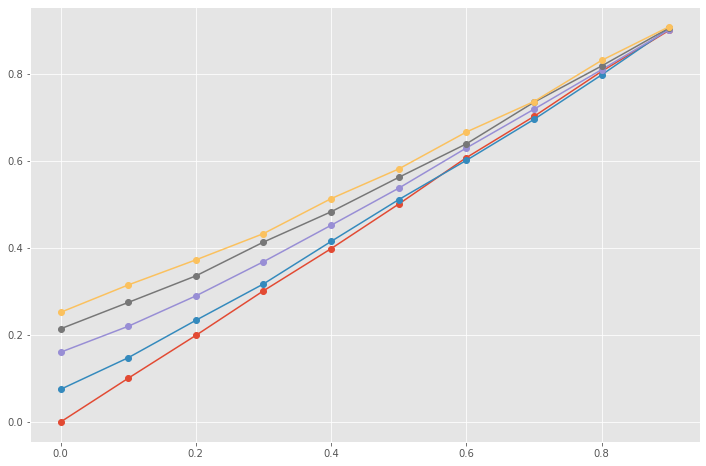

In [33]:
x = np.arange(0, 1, 0.1)

plt.figure(figsize=(12, 8))

for dp in [0, 0.01, 0.05, 0.1, .15]:
    y = [real_p(a, dp) for a in x]
    plt.plot(x, y, '-o')

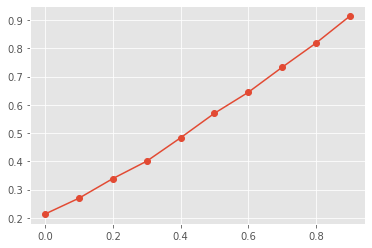

In [4]:
np.random.rand()

0.1097244651381305

In [23]:
frame['cases'] = frame.severity_level.map(get_cases)

In [28]:
fineframe = frame[(frame.max_size> 65) & (frame.cases>10)]

In [30]:
fineframe[['taskid', 'city', 'province', 'task_lng', 'task_lat', ]]

,taskid,city,province,task_lng,task_lat
0,97407,珠海市,广东省,113.586236,22.240319
2,97409,中山市,广东省,113.369346,22.546331
3,97410,惠州市,广东省,114.343565,23.020128
7,97414,中山市,广东省,113.390538,22.580957
9,97416,中山市,广东省,113.190663,22.627641
...,...,...,...,...,...
3553,100960,湖州市,浙江省,120.384308,30.837564
3554,100961,湖州市,浙江省,119.962647,30.518065
3556,100963,湖州市,浙江省,119.992886,30.561560
3558,100965,湖州市,浙江省,120.119803,30.890799


In [40]:
f80 = pd.read_csv('D:/Feishu/downloads/80id.csv')

In [42]:
f80.taskid

0         4412
1         4414
2         4416
3         4440
4         4485
         ...  
2553    101087
2554    101088
2555    101089
2556    101090
2557    101091
Name: taskid, Length: 2558, dtype: int64

In [45]:
def get_subframe(csvfile):
    f = pd.read_csv(csvfile)
    f['max_size'] = f.severity_level.map(get_stopline_size)
    f['cases'] = f.severity_level.map(get_cases)
    return f[(f.max_size> 65) & (f.cases> 10) & (~f.taskid.isin(f80.taskid))]

fld = 'D:/Feishu/downloads/70x70/'

frame = pd.concat([get_subframe(os.path.join(fld, x)) for x in os.listdir(fld) if x.endswith('csv')])

In [52]:
frame.to_csv('D:/Feishu/downloads/1.csv', index=None)

In [7]:
120//5

24

In [56]:
xs, ys, zs = [], [], []
for i, r in f80.iterrows():
    x, y, z = ll.gu.lla2xyz(r.task_lng, r.task_lat, 0)
    xs.append(x)
    ys.append(y)
    zs.append(z)
xyzs = np.c_[xs, ys, zs]

In [5]:
from datetime import datetime

In [91]:
datetime.fromtimestamp(1677600000000/1000)

datetime.datetime(2023, 3, 1, 0, 0)

In [8]:
int(datetime(2023, 4, 3).timestamp()* 1000)

1680451200000

In [45]:
hex(1682573251479648792)

'0x1759b3752304ba18'

In [13]:
frame = pd.read_excel('D:/Feishu/downloads/优先级较低城市环岛.xlsx')

In [16]:
frame['lon'] = frame['坐标'].map(lambda x: float(x.split(',')[0]))
frame['lat'] = frame['坐标'].map(lambda x: float(x.split(',')[1]))

In [26]:
a['max_size'] = a.severity_level.map(get_stopline_size)

In [46]:
'abc'.find('d')

-1

In [184]:
ff['cood'] = ff.apply(lambda x: str(x.task_lng)+","+str(x.task_lat), axis=1)

In [187]:
ff[['taskid', 'city',  'cood', ]].to_csv('D:/progms/xp/data/tasks2.txt', index=None)

In [207]:
frame = pd.read_excel('D:/Feishu/downloads/新增路口.xlsx')

In [208]:
frame = frame.sort_values('城市')

In [212]:
subframe = frame[(frame['城市']!= '北京市') & (frame['城市']!='上海市')]

In [213]:
subframe

,坐标,城市,省份
178,"120.566562,32.391348",南通市,江苏省
154,"121.283137,32.403041",南通市,江苏省
155,"120.849697,32.059795",南通市,江苏省
156,"120.911175,31.970484",南通市,江苏省
157,"120.97715,31.836689",南通市,江苏省
...,...,...,...
476,"119.788949,31.905855",镇江市,江苏省
1231,"119.487379901822,31.8826658156133",镇江市,江苏省
1187,"119.354004769677,32.2180806447186",镇江市,江苏省
1209,"119.310702693522,32.1638381841669",镇江市,江苏省


In [215]:
with open('D:/Feishu/downloads/task_非北京上海.txt', 'w', encoding='utf-8') as fout:
    for i, r in subframe.iterrows():
        fout.write(f"{r['坐标']},0,{r['省份']},{r['城市']}\n")

In [216]:
str.join(',', map(str, range(105248,105940+1)))

'105248,105249,105250,105251,105252,105253,105254,105255,105256,105257,105258,105259,105260,105261,105262,105263,105264,105265,105266,105267,105268,105269,105270,105271,105272,105273,105274,105275,105276,105277,105278,105279,105280,105281,105282,105283,105284,105285,105286,105287,105288,105289,105290,105291,105292,105293,105294,105295,105296,105297,105298,105299,105300,105301,105302,105303,105304,105305,105306,105307,105308,105309,105310,105311,105312,105313,105314,105315,105316,105317,105318,105319,105320,105321,105322,105323,105324,105325,105326,105327,105328,105329,105330,105331,105332,105333,105334,105335,105336,105337,105338,105339,105340,105341,105342,105343,105344,105345,105346,105347,105348,105349,105350,105351,105352,105353,105354,105355,105356,105357,105358,105359,105360,105361,105362,105363,105364,105365,105366,105367,105368,105369,105370,105371,105372,105373,105374,105375,105376,105377,105378,105379,105380,105381,105382,105383,105384,105385,105386,105387,105388,105389,10539

In [143]:
frame = pd.read_excel('D:/Feishu/downloads/新增路口（衢州、泰州、丽水）.xlsx')

In [146]:
frame = pd.read_csv('D:/Feishu/downloads/新增路口（衢州、泰州、丽水）-uniqued.csv')

In [219]:
if "":
    print("!")

In [129]:
','.join(map(str, frame[(frame['城市']=='北京市')].taskid))
# frame[(frame['城市']=='北京市')]

KeyError: '城市'

In [64]:
from datetime import datetime

In [65]:
int(datetime(2023, 5, 24).timestamp()* 1000)

1684857600000

In [70]:
104954-103676+1

1279

In [68]:
103676, 104954 105031, 105093]

'105031,105032,105033,105034,105035,105036,105037,105038,105039,105040,105041,105042,105043,105044,105045,105046,105047,105048,105049,105050,105051,105052,105053,105054,105055,105056,105057,105058,105059,105060,105061,105062,105063,105064,105065,105066,105067,105068,105069,105070,105071,105072,105073,105074,105075,105076,105077,105078,105079,105080,105081,105082,105083,105084,105085,105086,105087,105088,105089,105090,105091,105092,105093'

In [140]:
tasksframe = pd.read_csv('D:/progms/xp/data/tasks.csv')
tasksframe = tasksframe[['taskid', '城市', '坐标', ]]

In [141]:
frame = pd.read_csv('D:/Feishu/downloads/1731.csv')

In [147]:
ff = pd.merge(frame, tasksframe, on='taskid')

In [149]:
ff['m_lon'] = ff['坐标'].map(lambda x: float(x.split(',')[0]))
ff['m_lat'] = ff['坐标'].map(lambda x: float(x.split(',')[1]))

In [47]:
os.path.basename('oss://xmotors-mapcloud-mapgen-prod-hdmap/manual_hdlite_pb/alignpb/20230323142858/97347/247463/97347_247463_aligned_0_copy.pb')

'97347_247463_aligned_0_copy.pb'

In [48]:
f70 = pd.read_excel('D:/Feishu/downloads/70路口初筛结果.xlsx')

In [49]:
f80 = pd.read_csv("D:/Feishu/downloads/生产80.csv")

In [72]:
63 // (5* 6)

2

In [103]:
jsonfolder = 'D:/Feishu/downloads/42无热力值/卫星图大小/'
csvfolder = 'D:/Feishu/downloads/42无热力值/42城无热力值/'
savefolder = 'D:/Feishu/downloads/42无热力值/42城无热力值+卫星图大小/'
csvfolder_5 = 'D:/Feishu/downloads/42无热力值/热力值5的OSM路口结果/OSM路口结果/'

In [4]:
import os

In [73]:
workfolder = 'D:/Feishu/downloads/全国路口无热力值/全国路口无热力值/'

jsonfolder = os.path.join(workfolder, '全国路口无热力值-卫星图路口大小')
csvfolder = os.path.join(workfolder, '全国路口坐标无热力值')
savefolder = os.path.join(workfolder, '坐标热力路口大小')

savefolder = r'D:\Feishu\downloads\new_3_city/a/'

In [74]:
def proc(city, jsonfile, csvfile):
    print('proc: ', city)
    with open(jsonfile, 'r') as fin:
        data = json.load(fin)
    frame = pd.read_csv(csvfile, names=['lon', 'lat', 'alt', 'province', 'city', 'roads', 'heat', ])
    
    def get_size_of(i):
        try:
            a = max(data[str(i)], key=lambda x: max(x['size']))
            return max(a['size'])
        except:
            return 0

    frame['sat_size'] = [get_size_of(i) for i in range(frame.shape[0])]
    
    savefile = os.path.join(savefolder, f'{city}.csv')
    frame.to_csv(savefile, index=None)
    
    print(f'{os.path.basename(jsonfile)} + {os.path.basename(csvfile)} = {savefile}')

In [75]:
folder = r'D:\Feishu\downloads\new_3_city/'

In [127]:
for f in os.listdir(folder):
    if f.endswith('csv'):
        city = f.split('.')[0]
        csvfile = os.path.join(folder, f)
        jsonfile = os.path.join(folder, f'{city}_area.json')
        proc(city, jsonfile, csvfile)
        

proc:  丽水
丽水_area.json + 丽水.csv = D:\Feishu\downloads\new_3_city/a/丽水.csv
proc:  泰州
泰州_area.json + 泰州.csv = D:\Feishu\downloads\new_3_city/a/泰州.csv
proc:  衢州市
衢州市_area.json + 衢州市.csv = D:\Feishu\downloads\new_3_city/a/衢州市.csv


In [123]:
with open(jsonfile, 'r') as fin:
    data = json.load(fin)
frame = pd.read_csv(csvfile, names=['lon', 'lat', 'alt', 'province', 'city', 'roads', 'heat', 'a'])

In [126]:
frame[['lon', 'lat', 'alt', 'province', 'city', 'roads', 'heat',]].to_csv(csvfile, index=None)

In [ ]:
for f in os.listdir(jsonfolder):
    if f.endswith('area.json'):
        jsonfile = os.path.join(jsonfolder, f)
        city = f.split('_')[0]
        csvfile = os.path.join(csvfolder, f'{city}.csv')
        proc(city, jsonfile, csvfile)
#         print(jsonfile, csvfile)

In [81]:
def proc_normal(city, jsonfile, csvfile):
    frame = pd.read_csv(csvfile)
    with open(jsonfile, 'r') as fin:
        data = json.load(fin)
        
    assert frame.shape[0] == len(data)
    
    frame['tag'] = [data[f'{i}.png']['label'] for i in range(frame.shape[0])]
    frame['score'] = [data[f'{i}.png']['score'] for i in range(frame.shape[0])]
    return frame

In [148]:
# jsonfolder = 'D:/Feishu/downloads/20230512异形路口/'
jsonfolder = 'D:/Feishu/downloads/20230517_yixinglukou/'

unnormal, total = 0, 0
for f in os.listdir(jsonfolder):
    if f.endswith('all_in_one.json'):
        city = f.split('_')[0]
        csvfile = f'D:/Feishu/downloads/42city_openstreetmap_csv/{city}.csv'
        jsonfile = os.path.join(jsonfolder, f)
        
        frame = proc_normal(city, jsonfile, csvfile)
        
        unnormal += frame[(frame.tag== 'UnNormal') & (frame.score> .8)].shape[0]
        total += frame.shape[0]
        
        savefile = f'D:/Feishu/downloads/42异形/{city}.csv'
        frame.to_csv(savefile, index=None)
        
        # break
        
print(unnormal, total)

15496 105043


In [78]:
frame = pd.read_csv('D:/Feishu/downloads/_select_pt_id_as_taskId_pt_city_pt_province_pt_severity_level_wf_202305251513.csv')

In [80]:
frame.status.value_counts()

-1    57
 2     6
Name: status, dtype: int64

In [79]:
frame[frame.status==2]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,105154,广州市,广东省,"met: covered 58.13% { cid: 105154, gid: 0, cas...",264366,2,113.226439,23.388730,2023-05-25 12:49:39.583
21,105175,广州市,广东省,"met: covered 53.25% { cid: 105175, gid: 0, cas...",264387,2,113.280262,23.110598,2023-05-25 12:49:39.583
34,105188,广州市,广东省,"met: covered 98.34% { cid: 105188, gid: 0, cas...",264400,2,113.446347,23.154705,2023-05-25 12:49:47.009
36,105190,广州市,广东省,"met: covered 47.05% { cid: 105190, gid: 0, cas...",264402,2,113.623495,23.171746,2023-05-25 12:49:47.009
46,105200,广州市,广东省,"met: covered 81.71% { cid: 105200, gid: 0, cas...",264412,2,113.247198,23.117819,2023-05-25 12:49:47.009
53,105207,广州市,广东省,"met: covered 52.73% { cid: 105207, gid: 0, cas...",264419,2,113.328406,23.133431,2023-05-25 12:49:47.009


In [130]:
a = list(frame[frame.status!=2].taskid)

In [116]:
frame = pd.read_csv('D:/Feishu/downloads/珠三角无热力路口（偏转后）.csv')

with open('D:/Feishu/downloads/珠三角无热力路口task.txt', 'w') as fin:
    for i, r in frame.iterrows():
        lon, lat = r['坐标'].split(',')
        fin.write(f'{lon},{lat},0,{r["省份"]},{r["城市"]}\n')

In [106]:
a = list(frame[frame.status==0].taskid)

In [131]:
','.join(map(str, a[:len(a)//2]))

'102542,102543,102544,102545,102546,102547,102548,102550,102551,102553,102554,102566,102575,102582,102587,102592,102600,102601,102605,102606,102607,102611,102612,102614,102618,102619,102620,102621,102623,102624,102625,102626,102627,102628,102629,102630,102631,102632,102633,102634,102635,102636,102637,102638,102639,102640,102641,102642,102643,102644,102645,102646,102647,102648,102649,102650,102651,102652,102656,102657,102658,102659,102660,102661,102662,102664'

In [81]:
','.join(map(str, range(105154, 105216+1)))

'105154,105155,105156,105157,105158,105159,105160,105161,105162,105163,105164,105165,105166,105167,105168,105169,105170,105171,105172,105173,105174,105175,105176,105177,105178,105179,105180,105181,105182,105183,105184,105185,105186,105187,105188,105189,105190,105191,105192,105193,105194,105195,105196,105197,105198,105199,105200,105201,105202,105203,105204,105205,105206,105207,105208,105209,105210,105211,105212,105213,105214,105215,105216'

In [149]:
with open('D:/Feishu/downloads/gz_all_road_poi.html', 'r') as fin:
    content = fin.read()

In [151]:
import re

In [184]:
for coord in [x.strip() for x in re.findall(r'L.circleMarker\(\n(.+)', content)][:10]:
    a, b = coord[1:-2].split(', ')
    print(f'{b},{a},0,广东省,广州市')

113.44485095702113,23.164366995915532,0,广东省,广州市
113.46116398461163,23.11197792179859,0,广东省,广州市
113.46150697208941,23.111682962625988,0,广东省,广州市
113.46213997341691,23.111800979822643,0,广东省,广州市
113.46589498221873,23.108849963173036,0,广东省,广州市
113.47387963906614,23.180117268297654,0,广东省,广州市
113.483216939494,23.100239988416195,0,广东省,广州市
113.49044297821821,23.176505919545654,0,广东省,广州市
113.49140798673034,23.17648496478771,0,广东省,广州市
113.49157495424151,23.21142291650152,0,广东省,广州市


In [198]:
frame = pd.read_csv('D:/Feishu/downloads/新增80路口_偏转后苏州-宁波-uniqued.csv')

In [201]:
with open('D:/Feishu/downloads/新增80路口_偏转后苏州-宁波_task.txt', 'w', encoding='utf-8') as fout:
    for i, r in frame.iterrows():
        fout.write(f'{r.task_lng},{r.task_lat},0,{r["省份"]},{r["城市"]}\n')

In [191]:
frame['task_lng'] = frame['坐标（偏转后）'].map(lambda x: x.split(',')[0])
frame['task_lat'] = frame['坐标（偏转后）'].map(lambda x: x.split(',')[1])

In [196]:
frame.to_csv('D:/Feishu/downloads/新增80路口_偏转后苏州-宁波-2.csv', index=None)

In [203]:
','.join(map(str, range(103068, 103081+1)))

'103068,103069,103070,103071,103072,103073,103074,103075,103076,103077,103078,103079,103080,103081'

In [94]:
roads = ['primary','secondary','trunk','motorway','tertiary','motorway_link','trunk_link','primary_link', 'secondary_link','tertiary_link']

def has_road(r):
    for r in r.roads.split(','):
        if r in roads:
            return True
    return False

In [91]:
sys.path.extend(['D:/progms/xp/proto/proto_python/', 'D:/progms/xp/proto/proto_python/city_map/'])

In [95]:
import snippet_pb2
from city_map import city_ul_interface_pb2

In [85]:
def load_pb_as(pbtype, pbfile):
    info = pbtype()
    with open(pbfile, 'rb') as fin:
        info.ParseFromString(fin.read())
    return info

In [106]:
pbfile = r'D:/left_pc/0517/boundary_0.pb'

si = load_pb_as(city_ul_interface_pb2.ULMap, pbfile)

set([b.color for b in si.boundary])

{1}

In [112]:
len(set([b.color for b in si.boundary])-{1})

0

In [117]:
len(set()-{1})

0

In [169]:
b = os.listdir(csvfolder_5)

In [188]:
def count(frame):
#     return frame[(frame['sat_size']< 71) & (frame['sat_size']> 61)].shape[0]
    return frame.shape[0]

sum([count(pd.read_csv(os.path.join(savefolder, f))) for f in os.listdir(savefolder) if f.endswith('.csv')])

140799

In [195]:
def count(frame):
    return frame[(frame['sat_size']> 71)].shape[0]
#     return frame[(frame['sat_size']< 71) & (frame['sat_size']> 61)].shape[0]
#     return frame.shape[0]

sum([count(pd.read_csv(os.path.join(savefolder2, f))) for f in os.listdir(savefolder2) if f.endswith('.csv')])

3938

In [196]:
def lerp(x1, x2, t):
    return x1* (1-t) + x2* t

In [203]:
x, i = 0, 0
while 26- x> 0.5:
    x = lerp(x, 26, 0.3)
    i += 1
    
x, i

(25.640126532773998, 12)

In [135]:
frame = pd.read_csv('D:/Feishu/downloads/浙江+珠三角20230517.csv')

In [136]:
a = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [124], [125], [126], [127], [128], [129], [130], [131], [132], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [144], [145], [146], [147], [149], [150], [151], [152], [155], [156], [158], [159], [160], [162], [163], [165], [166], [167], [168], [170], [174], [175], [178], [180], [181], [182], [183], [184], [186], [187], [189], [190], [192], [193], [196], [199], [200], [202], [204], [205], [207], [208], [210], [213], [214], [215], [216], [219], [221], [222], [223], [224], [227], [228], [229], [230], [231], [232], [233], [234], [235], [236], [237], [238], [239], [240], [241], [242], [243], [246], [247], [248], [249], [250], [251], [252], [253], [255], [256], [257], [258], [259], [260], [261], [262], [263], [264], [266], [267], [268], [269], [270], [271], [272], [273], [274], [275], [276], [277], [278], [279], [281], [282]]

In [140]:
x = list(range(len(a)))
y = [g[0] for g in a]

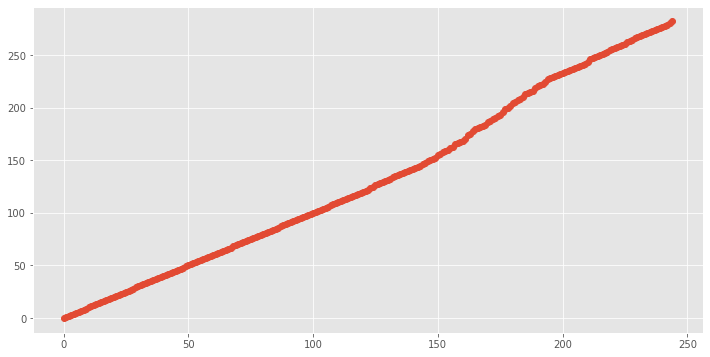

In [146]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, '-o')

In [187]:
savefolder2 = 'D:/Feishu/downloads/42无热力值/42城无热力值+卫星图大小-5/'
csvfiles5 = os.listdir(csvfolder_5)

a = ['中山.csv', '惠州.csv', '珠海.csv', '肇庆.csv', ]

for f in a: # os.listdir(savefolder):
    city = f.split('.')[0][:2]
    f2 = ll.first_of(lambda x: x.startswith(city), csvfiles5)
    print(f, '->', f2)
    
    frame = pd.read_csv(os.path.join(savefolder, f))
    frame5 = pd.read_csv(os.path.join(csvfolder_5, f2), names = ['lon', 'lat', 'alt', 'province', 'city', 'roads', 'heat'])
    
    subframe = substract(frame, frame5)
    subframe.to_csv(os.path.join(savefolder2, f), index=None)
    
    print(frame.shape, '-', frame5.shape, '=', frame.shape[0]- subframe.shape[0])

中山.csv -> 中山.csv
(2913, 8) - (832, 7) = 800
惠州.csv -> 惠州.csv
(1709, 8) - (755, 7) = 742
珠海.csv -> 珠海.csv
(1527, 8) - (442, 7) = 431
肇庆.csv -> 肇庆.csv
(1263, 8) - (313, 7) = 306


In [186]:
def substract(frame1, frame2):
    def not_in_frame2(lon, lat):
        lon, lat = ll.gu.wgs2gcj(lon, lat)
        sample = frame2[frame2.apply(lambda row: abs(row.lon- lon)< 1e-5 and abs(row.lat- lat)< 1e-5, axis=1)]
        return sample.empty
    
    return frame1[frame1.apply(lambda x: not_in_frame2(x.lon, x.lat), axis=1)]

In [158]:
frame.lon

0       118.775033
1       118.779392
2       118.723793
3       118.728068
4       118.739228
           ...    
4259    118.787977
4260    118.798518
4261    118.797477
4262    118.796700
4263    118.798416
Name: lon, Length: 4264, dtype: float64

C:\Users\93942\AppData\Local\Temp/ipykernel_65328/3254594453.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame5[frame.lon.isna()]


,lon,lat,alt,province,city,roads,heat


In [116]:
frame5[(frame5.lon== r.lon)]

,lon,lat,alt,province,city,roads,heat


In [146]:
def any_near(lon, lat):
    sample = frame5[frame5.apply(lambda row: abs(row.lon- lon)< 1e-5 and abs(row.lat- lat)< 1e-5, axis=1)]
    return not sample.empty

In [147]:
frame[frame.apply(lambda x: any_near(x.lon, x.lat), axis=1)]

,lon,lat,alt,province,city,roads,heat,sat_size
0,109.500401,18.252789,0,海南省,三亚市,"primary,secondary",10.750000,48.158487
2,109.487587,18.272712,0,海南省,三亚市,primary,26.923077,63.916887
3,109.581849,18.282690,0,海南省,三亚市,trunk,41.230769,112.618491
4,109.505501,18.237346,0,海南省,三亚市,"primary,tertiary",30.363636,55.521569
5,109.514998,18.270049,0,海南省,三亚市,"tertiary,trunk",45.384615,63.984658
...,...,...,...,...,...,...,...,...
374,109.503772,18.307441,0,海南省,三亚市,"tertiary,secondary",21.076923,0.000000
380,109.503501,18.238143,0,海南省,三亚市,"tertiary,secondary",13.769231,46.479286
390,109.381519,18.305354,0,海南省,三亚市,"primary,secondary",5.000000,0.000000
400,109.705206,18.346166,0,海南省,三亚市,"tertiary,trunk",6.250000,39.743540


In [148]:
frame5

,lon,lat,alt,province,city,roads,heat
0,109.500401,18.252789,0,海南省,三亚市,"primary,secondary",10.750000
1,109.581849,18.282690,0,海南省,三亚市,trunk,41.230769
2,109.505501,18.237346,0,海南省,三亚市,"tertiary,primary",30.363636
3,109.514998,18.270049,0,海南省,三亚市,"tertiary,trunk",45.384615
4,109.501293,18.248547,0,海南省,三亚市,"tertiary,primary",16.230769
...,...,...,...,...,...,...,...
150,109.503501,18.238143,0,海南省,三亚市,"tertiary,secondary",13.769231
151,109.381519,18.305354,0,海南省,三亚市,"primary,secondary",5.000000
152,109.158562,18.345596,0,海南省,三亚市,tertiary,8.307692
153,109.705206,18.346166,0,海南省,三亚市,"tertiary,trunk",6.250000


In [61]:
xyzs = []
for _, r in f80.iterrows():
    x, y, z = ll.gu.lla2xyz(r.task_lng, r.task_lat, 0)
#     xs.append(x)
#     ys.append(y)
#     zs.append(z)
    xyzs.append((x, y, z))

In [66]:
xyzs = np.array(xyzs)

In [68]:
def dup(r):
    q = np.r_[r.xyz]
    for p in xyzs:
        if la.norm(p - q)< 200:
            return True
    return False

In [70]:
f70 = f70[~f70.apply(dup, axis=1)]

In [72]:
f70.to_csv('D:/Feishu/downloads/70-80.csv', index=None)

In [60]:
f80

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,4412,东莞市,广东省,"met: covered 55.87% { cid: 4412, gid: 0, cases...",66612,2,113.759339,23.113706,2023-01-19 16:29:02.224
1,4414,东莞市,广东省,not met: covered 6/11,66614,2,113.735372,23.110681,2023-01-19 16:29:02.230
2,4416,东莞市,广东省,"met: covered 70.21% { cid: 4416, gid: 0, cases...",66616,2,113.718572,23.104596,2023-01-19 16:29:02.236
3,4440,东莞市,广东省,"met: covered 61.88% { cid: 4440, gid: 0, cases...",66640,2,113.758651,23.035020,2023-01-19 16:29:02.303
4,4485,珠海市,广东省,"met: covered 63.50% { cid: 4485, gid: 0, cases...",66685,2,113.508640,22.221973,2023-01-19 16:29:02.430
...,...,...,...,...,...,...,...,...,...
2466,101087,昆明市,云南省,"met: covered 0.00% { cid: 101087, gid: 0, case...",251335,2,102.725821,25.071693,2023-03-20 14:31:28.186
2467,101088,昆明市,云南省,"met: covered 0.00% { cid: 101088, gid: 0, case...",251336,2,102.466206,24.921147,2023-03-20 14:31:28.186
2468,101089,昆明市,云南省,"met: { cid: 101089, gid: 0, cases: 3, dis: 0....",251337,2,103.297701,24.778049,2023-03-20 14:31:28.186
2469,101090,昆明市,云南省,"met: covered 0.00% { cid: 101090, gid: 0, case...",251338,2,102.640263,24.957005,2023-03-20 14:31:28.186


In [166]:
def calc_dis(x):
    x1, y1, z1 = ll.gu.lla2xyz(x['task_lng'], x['task_lat'], 0)
    x2, y2, z2 = ll.gu.lla2xyz(x['m_lon'], x['m_lat'], 0)
    return math.sqrt((x1- x2)** 2+ (y1- y2)** 2+ (z1- z2)** 2)

In [171]:
ff['distance'] = ff.apply(calc_dis, axis=1)

In [176]:
ff[ff.distance>100]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,城市,坐标,m_lon,m_lat,diff,distance
0,4412,东莞市,广东省,"met: covered 55.87% { cid: 4412, gid: 0, cases...",66612,2,113.759339,23.113706,2023-01-19 16:29:02.224,东莞市,"114.03177336,22.96292399",114.031773,22.962924,32534.761438,32534.761438
1,4414,东莞市,广东省,not met: covered 6/11,66614,2,113.735372,23.110681,2023-01-19 16:29:02.230,东莞市,"113.61965186,22.91000634",113.619652,22.910006,25191.588137,25191.588137
2,4416,东莞市,广东省,"met: covered 70.21% { cid: 4416, gid: 0, cases...",66616,2,113.718572,23.104596,2023-01-19 16:29:02.236,东莞市,"113.95917728,22.93259080",113.959177,22.932591,31163.488702,31163.488702
3,4440,东莞市,广东省,"met: covered 61.88% { cid: 4440, gid: 0, cases...",66640,2,113.758651,23.035020,2023-01-19 16:29:02.303,东莞市,"113.86988344,22.99849698",113.869883,22.998497,12098.550262,12098.550262
5,4500,东莞市,广东省,"met: covered 48.79% { cid: 4500, gid: 0, cases...",66700,2,113.624019,22.912118,2023-01-19 16:29:02.473,东莞市,"113.75865273,23.03502033",113.758653,23.035020,19386.751755,19386.751755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,75933,肇庆市,广东省,"met: { cid: 75933, gid: 0, cases: 90, dis: 91...",201653,2,112.452654,23.034691,2023-02-10 11:41:36.200,肇庆市,"112.51609007,23.07897130",112.516090,23.078971,8143.038911,8143.038911
168,75965,肇庆市,广东省,"met: { cid: 75965, gid: 0, cases: 89, dis: 85...",201685,2,112.825488,23.304928,2023-02-10 11:41:36.200,肇庆市,"112.45265448,23.03469123",112.452654,23.034691,48508.243831,48508.243831
169,75966,肇庆市,广东省,"met: { cid: 75966, gid: 0, cases: 90, dis: 87...",224197,2,112.826115,23.306866,2023-02-13 16:40:28.239,肇庆市,"112.82548673,23.30492249",112.825487,23.304922,224.629778,224.629778
170,75977,肇庆市,广东省,"met: { cid: 75977, gid: 0, cases: 39, dis: 0....",224814,2,112.811180,23.279233,2023-02-16 16:06:47.397,肇庆市,"112.82611458,23.30686634",112.826115,23.306866,3420.507948,3420.507948


In [180]:
ff[['taskid', 'city', 'province', 'task_lng', 'task_lat', 'm_lon', 'm_lat', 'distance']].to_csv('D:/Feishu/downloads/生产任务_坐标.csv', index=None)

In [163]:
ff[ff.apply(lambda x: abs(x['task_lng']- x['m_lon'])+ abs(x['task_lat']- x['m_lat'])< 1e-7, axis=1)]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,城市,坐标,m_lon,m_lat
222,86588,南通市,江苏省,"met: covered 66.39% { cid: 86588, gid: 0, case...",225023,2,120.533377,32.396223,2023-02-21 17:25:03.034,南通市,"120.533376729005,32.3962229831169",120.533377,32.396223
223,86590,南通市,江苏省,"met: covered 69.20% { cid: 86590, gid: 0, case...",225025,2,120.824893,32.029349,2023-02-21 17:25:03.034,南通市,"120.824893082987,32.029349382035",120.824893,32.029349
224,86591,南通市,江苏省,"met: covered 99.33% { cid: 86591, gid: 0, case...",225026,2,120.892260,31.963468,2023-02-21 17:25:03.034,南通市,"120.892259700802,31.9634681826388",120.892260,31.963468
225,86592,南通市,江苏省,"met: covered 62.50% { cid: 86592, gid: 0, case...",225027,2,120.887571,31.963521,2023-02-21 17:25:03.034,南通市,"120.887570519167,31.9635209891042",120.887571,31.963521
226,86593,南通市,江苏省,"met: covered 89.01% { cid: 86593, gid: 2, case...",225028,2,120.833721,32.038306,2023-02-21 17:25:03.034,南通市,"120.833720805344,32.0383063098894",120.833721,32.038306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,90524,湖州市,浙江省,"met: covered 96.04% { cid: 90524, gid: 0, case...",232416,2,120.395402,30.843980,2023-03-04 15:22:20.687,湖州市,"120.395401721233,30.8439801229947",120.395402,30.843980
1727,90526,湖州市,浙江省,"met: covered 84.52% { cid: 90526, gid: 0, case...",232417,2,120.148098,30.834607,2023-03-04 15:22:20.691,湖州市,"120.14809760788,30.8346069711289",120.148098,30.834607
1728,90527,湖州市,浙江省,"met: covered 100.00% { cid: 90527, gid: 0, cas...",232418,2,120.141095,30.853170,2023-03-04 15:22:20.695,湖州市,"120.1410949838,30.8531696309215",120.141095,30.853170
1729,90528,湖州市,浙江省,"met: covered 79.40% { cid: 90528, gid: 0, case...",232419,2,120.055257,30.539469,2023-03-04 15:22:20.698,湖州市,"120.055257336568,30.5394688891778",120.055257,30.539469


In [88]:
frame['length'] = frame.severity_level.map(get_stopline_size)

In [134]:
tasksframe['m_lng'] = tasksframe['坐标'].map(lambda x: float(x.split(',')[0]))
tasksframe['m_lat'] = tasksframe['坐标'].map(lambda x: float(x.split(',')[1]))

In [136]:
frame['m_lng'] = tasksframe['m_lng']
frame['m_lat'] = tasksframe['m_lat']

In [137]:
frame

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,m_lng,m_lat
0,4412,东莞市,广东省,"met: covered 55.87% { cid: 4412, gid: 0, cases...",66612,2,113.759339,23.113706,2023-01-19 16:29:02.224,114.385991,23.091319
1,4414,东莞市,广东省,not met: covered 6/11,66614,2,113.735372,23.110681,2023-01-19 16:29:02.230,114.283924,23.715359
2,4416,东莞市,广东省,"met: covered 70.21% { cid: 4416, gid: 0, cases...",66616,2,113.718572,23.104596,2023-01-19 16:29:02.236,114.419041,23.140134
3,4440,东莞市,广东省,"met: covered 61.88% { cid: 4440, gid: 0, cases...",66640,2,113.758651,23.035020,2023-01-19 16:29:02.303,114.274515,23.171363
4,4485,珠海市,广东省,"met: covered 63.50% { cid: 4485, gid: 0, cases...",66685,2,113.508640,22.221973,2023-01-19 16:29:02.430,113.457124,22.537712
...,...,...,...,...,...,...,...,...,...,...,...
1726,90524,湖州市,浙江省,"met: covered 96.04% { cid: 90524, gid: 0, case...",232416,2,120.395402,30.843980,2023-03-04 15:22:20.687,120.395402,30.843980
1727,90526,湖州市,浙江省,"met: covered 84.52% { cid: 90526, gid: 0, case...",232417,2,120.148098,30.834607,2023-03-04 15:22:20.691,120.148098,30.834607
1728,90527,湖州市,浙江省,"met: covered 100.00% { cid: 90527, gid: 0, cas...",232418,2,120.141095,30.853170,2023-03-04 15:22:20.695,120.141095,30.853170
1729,90528,湖州市,浙江省,"met: covered 79.40% { cid: 90528, gid: 0, case...",232419,2,120.055257,30.539469,2023-03-04 15:22:20.698,120.055257,30.539469


In [139]:
tasksframe

,taskid,城市,坐标,m_lng,m_lat
134,4412,东莞市,"114.03177336,22.96292399",114.031773,22.962924
111,4414,东莞市,"113.61965186,22.91000634",113.619652,22.910006
129,4416,东莞市,"113.95917728,22.93259080",113.959177,22.932591
123,4440,东莞市,"113.86988344,22.99849698",113.869883,22.998497
69,4485,珠海市,"113.50864269,22.22197122",113.508643,22.221971
...,...,...,...,...,...
1726,90524,湖州市,"120.395401721233,30.8439801229947",120.395402,30.843980
1727,90526,湖州市,"120.14809760788,30.8346069711289",120.148098,30.834607
1728,90527,湖州市,"120.1410949838,30.8531696309215",120.141095,30.853170
1729,90528,湖州市,"120.055257336568,30.5394688891778",120.055257,30.539469


In [138]:
frame

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,m_lng,m_lat
0,4412,东莞市,广东省,"met: covered 55.87% { cid: 4412, gid: 0, cases...",66612,2,113.759339,23.113706,2023-01-19 16:29:02.224,114.385991,23.091319
1,4414,东莞市,广东省,not met: covered 6/11,66614,2,113.735372,23.110681,2023-01-19 16:29:02.230,114.283924,23.715359
2,4416,东莞市,广东省,"met: covered 70.21% { cid: 4416, gid: 0, cases...",66616,2,113.718572,23.104596,2023-01-19 16:29:02.236,114.419041,23.140134
3,4440,东莞市,广东省,"met: covered 61.88% { cid: 4440, gid: 0, cases...",66640,2,113.758651,23.035020,2023-01-19 16:29:02.303,114.274515,23.171363
4,4485,珠海市,广东省,"met: covered 63.50% { cid: 4485, gid: 0, cases...",66685,2,113.508640,22.221973,2023-01-19 16:29:02.430,113.457124,22.537712
...,...,...,...,...,...,...,...,...,...,...,...
1726,90524,湖州市,浙江省,"met: covered 96.04% { cid: 90524, gid: 0, case...",232416,2,120.395402,30.843980,2023-03-04 15:22:20.687,120.395402,30.843980
1727,90526,湖州市,浙江省,"met: covered 84.52% { cid: 90526, gid: 0, case...",232417,2,120.148098,30.834607,2023-03-04 15:22:20.691,120.148098,30.834607
1728,90527,湖州市,浙江省,"met: covered 100.00% { cid: 90527, gid: 0, cas...",232418,2,120.141095,30.853170,2023-03-04 15:22:20.695,120.141095,30.853170
1729,90528,湖州市,浙江省,"met: covered 79.40% { cid: 90528, gid: 0, case...",232419,2,120.055257,30.539469,2023-03-04 15:22:20.698,120.055257,30.539469


In [36]:
tf = pd.read_csv('D:/Feishu/downloads/[91079, 96982]')

In [38]:
tf['taskid'] = range(91079, 96982+ 1)

In [47]:
tf.sort_values('city').to_csv('D:/Feishu/downloads/[91079, 96982]-sorted', index=None)

In [56]:
bj = sorted([x for x in tf[tf.city=='北京市'].taskid])

In [58]:
len(bj)

1545

In [60]:
bj[-1]- bj[0]+ 1

1548

In [65]:
tf[(tf.taskid.isin(range(91079,92626+ 1))) & (tf.city!='北京市')]

,lon,lat,alt,province,city,taskid
253,118.777289,32.064597,0,江苏省,南京市,91332
368,118.712068,31.985241,0,江苏省,南京市,91447
393,118.803862,31.980009,0,江苏省,南京市,91472


In [66]:
tf

,lon,lat,alt,province,city,taskid
0,116.406652,39.907998,0,北京市,北京市,91079
1,116.427031,39.908424,0,北京市,北京市,91080
2,116.352775,40.000988,0,北京市,北京市,91081
3,116.386492,40.009955,0,北京市,北京市,91082
4,116.371122,39.957918,0,北京市,北京市,91083
...,...,...,...,...,...,...
5899,120.264266,31.892770,0,江苏省,无锡市,96978
5900,119.836136,31.252239,0,江苏省,无锡市,96979
5901,119.873086,31.368649,0,江苏省,无锡市,96980
5902,120.305381,31.482486,0,江苏省,无锡市,96981


In [77]:
lastprov, lastid, lastcity = None, None, None
for i, row in tf.iterrows():
    if lastcity!=row.city:
        print(lastprov, lastcity, lastid, row.taskid-1)
        lastprov, lastid, lastcity = row.province,row.taskid, row.city 

print(lastprov, lastcity, lastid, row.taskid)

None None None 91078
北京市 北京市 91079 91331
江苏省 南京市 91332 91332
北京市 北京市 91333 91446
江苏省 南京市 91447 91447
北京市 北京市 91448 91471
江苏省 南京市 91472 91472
北京市 北京市 91473 92626
江苏省 常州市 92627 93440
福建省 福州市 93441 93932
海南省 海口市 93933 94098
浙江省 金华市 94099 94607
江苏省 南京市 94608 94608
浙江省 金华市 94609 94782
江苏省 南京市 94783 94783
浙江省 金华市 94784 95069
江苏省 南京市 95070 96204
江苏省 无锡市 96205 96982


In [70]:
citys = ['中山市', '珠海市', '肇庆市', '惠州市', ]

In [14]:
with open('D:/Feishu/downloads/[91079, 96982]', encoding='utf-8') as fin:
    lines = fin.readlines()

In [22]:
a = [x.strip().split(',') for x in lines]

In [50]:
tf.city.value_counts()

北京市    1545
南京市    1140
金华市     969
常州市     814
无锡市     778
福州市     492
海口市     166
Name: city, dtype: int64

In [26]:
m = {}
for i, l in enumerate(a):
    tid = 91079+ i
    city = l[-1]
    if not city in m:
        m[city] = []
    m[city].append((tid, l))

In [28]:
for k, v in m.items():
    print(k, len(v))

北京市 1545
南京市 1140
常州市 814
福州市 492
海口市 166
金华市 969
无锡市 778


In [32]:
frame.city.value_counts()

??????    3795
?????     1140
????       969
Name: city, dtype: int64

In [30]:
frame

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,91079,??????,??????,NaN,238366,-1,116.406652,39.907998,2023-03-10 23:14:16.817
1,91080,??????,??????,NaN,238367,-1,116.427031,39.908424,2023-03-10 23:14:16.817
2,91081,??????,??????,NaN,238368,-1,116.352775,40.000988,2023-03-10 23:14:16.817
3,91082,??????,??????,NaN,238369,-1,116.386492,40.009955,2023-03-10 23:14:16.817
4,91083,??????,??????,NaN,238370,-1,116.371122,39.957918,2023-03-10 23:14:16.817
...,...,...,...,...,...,...,...,...,...
5899,96978,??????,?????,"not met: covered 68.51% { cid: 96978, gid: 1, ...",244265,-1,120.264266,31.892770,2023-03-10 23:23:49.750
5900,96979,??????,?????,"not met: covered 87.33% { cid: 96979, gid: 0, ...",244266,-1,119.836136,31.252239,2023-03-10 23:23:49.750
5901,96980,??????,?????,"met: covered 83.50% { cid: 96980, gid: 0, case...",244267,2,119.873086,31.368649,2023-03-10 23:23:49.750
5902,96981,??????,?????,"met: covered 86.43% { cid: 96981, gid: 0, case...",244268,2,120.305381,31.482486,2023-03-10 23:23:49.750


In [13]:
[x.split(',') for x in ll.enum_lines('D:/Feishu/downloads/[91079, 96982]')]

UnicodeDecodeError: 'gbk' codec can't decode byte 0x82 in position 47: illegal multibyte sequence

In [144]:
zsjwx[zsjwx.city.isin(citys) & (zsjwx.hot> 5) & (zsjwx.length>71)]

,id,city,length,lng,lat,hot
124,124,惠州市,129.219512,114.278965,23.717956,7
144,144,中山市,87.844537,113.486721,22.367046,14
343,343,中山市,91.269824,113.389015,22.589776,61
492,492,中山市,89.020500,113.426079,22.499774,24
504,504,珠海市,76.230750,113.586570,22.247284,25
...,...,...,...,...,...,...
10164,10164,惠州市,76.465006,114.513336,23.048453,16
10170,10170,惠州市,78.218477,114.455320,23.053430,13
10171,10171,惠州市,76.761636,114.455887,23.053654,40
10174,10174,惠州市,79.105851,114.430478,23.115224,72


In [118]:
zsjwx[zsjwx.city.isin(citys) & (zsjwx.length>71)]

,id,city,length,lng,lat,hot
124,124,惠州市,129.219512,114.278965,23.717956,7
144,144,中山市,87.844537,113.486721,22.367046,14
168,168,中山市,85.333067,113.262720,22.737698,0
343,343,中山市,91.269824,113.389015,22.589776,61
492,492,中山市,89.020500,113.426079,22.499774,24
...,...,...,...,...,...,...
10164,10164,惠州市,76.465006,114.513336,23.048453,16
10170,10170,惠州市,78.218477,114.455320,23.053430,13
10171,10171,惠州市,76.761636,114.455887,23.053654,40
10174,10174,惠州市,79.105851,114.430478,23.115224,72


In [135]:
kml = simplekml.Kml()

allcity = set(zsjwx.city.values)

cityfolders = {}

for city in allcity:
    cityfolders[city] = kml.newfolder(name=city)

for i, row in zsjwx.iterrows():
    folder = cityfolders[row.city]
    
    color = simplekml_ext.rgba(1, 1, 1)
    if row.hot<=5:
        color = simplekml_ext.rgba(0, 0, 0)
    elif row.length> 71:
        color = simplekml_ext.rgba(0, 1, 0)
#     elif row.length> 60:
#         color = simplekml_ext.rgba(1, 0.5, 0)
        
    p = folder.newpoint(name=str(row.id), coords=[(row.lng, row.lat)], description=f"{row.length:.1f}-{row.hot}")
    p.iconstyle.color = color
    
    if i%1000==0:
        print(i)

kml.savekmz('D:/Feishu/downloads/珠三角-全路口.kmz')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [95]:
import simplekml_ext

In [134]:
zsjwx.to_csv('D:/Feishu/downloads/珠三角-全路口.csv', index=False)

In [170]:
def add_task_coord(frame):
    lons, lats = [], []
    for i, row in frame.iterrows():
        lon, lat = ll.gu.wgs2gcj(row.lon, row.lat)
        lons.append(lon)
        lats.append(lat)

    frame['task_lon'] = lons
    frame['task_lat'] = lats

In [65]:
frame = pd.read_csv('D:/Feishu/downloads/北京桥下-uniqued.csv', encoding='gbk')

In [68]:
with open('D:/Feishu/downloads/北京桥下task.txt', 'w', encoding='utf-8') as fout:
    for _, r in frame.iterrows():
        fout.write(f"{r['坐标']},0,{r['省份']},{r['城市']}\n")


In [188]:
from geopy.geocoders import Nominatim


def find_province(city):
    """
    :param city: "福州"
    :return:  “福建”
    """
    try:
        geolocator = Nominatim(user_agent='myuseragent')
        location = geolocator.geocode(city)
        province = re.findall(b'\w+\xe7\x9c\x81'.decode('utf-8'), str(location))
        return province[0]
    except:
#         print("query: ", str(location))
        return None # city

In [74]:
ll.gu.gcj2wgs(116.333203,39.986004)

(116.32704733226367, 39.98467951995182)

In [75]:
hex(288516456960995941)

'0x40104306103b265'

In [76]:
hex(18446744073709551599)

'0xffffffffffffffef'

In [197]:
qg['province'] = qg.city.map(lambda x: c2p[x])

In [200]:
qg.to_csv('D:/Feishu/downloads/全国_热力_卫星大小.csv', index=None)

In [205]:
qg[qg.city.isin(coi) & (qg.length> 61) & (qg.length<=71) & (qg.heat> 5)].to_csv('D:/Feishu/downloads/全国_热力5+_卫星大小61-71.csv')

In [182]:
for x in a.items():
    print(x)
    break

('深圳市', 2094)


In [206]:
frame = pd.read_csv('D:/Feishu/downloads/重点城市_热力5+_卫星大小71+_算法结果.csv')

In [208]:
qg[qg.city.isin(coi) & (qg.length>71) & (qg.heat> 5)]

,city,length,lat,lon,heat,task_lon,task_lat,province
124,惠州市,129.219512,23.717956,114.278965,7.000000,114.283863,23.715367,广东省
144,中山市,87.844537,22.367046,113.486721,14.000000,113.492024,22.364224,广东省
343,中山市,91.269824,22.589776,113.389015,61.000000,113.394500,22.587091,广东省
492,中山市,89.020500,22.499774,113.426079,24.000000,113.431545,22.497074,广东省
504,珠海市,76.230750,22.247284,113.586570,25.000000,113.591596,22.244268,广东省
...,...,...,...,...,...,...,...,...
19120,湖州市,72.767078,30.541732,120.050439,34.272727,120.055257,30.539469,浙江省
19121,湖州市,78.157700,30.540322,120.067186,32.666667,120.072022,30.538087,浙江省
19123,湖州市,79.772906,30.561991,119.950204,27.000000,119.954801,30.559463,浙江省
19153,湖州市,73.677900,30.539902,120.062451,24.846154,120.067284,30.537660,浙江省


In [212]:
frame['length'] = frame.severity_level.map(get_stopline_size)

In [305]:
0.3/6371

4.7088369172814315e-05

In [309]:
datetime.fromtimestamp(1677600000000/1000)

datetime.datetime(2023, 3, 1, 0, 0)

In [310]:
datetime.fromtimestamp(1675180800000/1000)

datetime.datetime(2023, 2, 1, 0, 0)

In [311]:
bevframe = pd.read_csv('D:/progms/xp/data/bev.csv')

In [314]:
bevframe['xyz'] = bevframe.apply(lambda x: ll.gu.lla2xyz(x.startLat, x.startLng, 0), axis=1)

In [316]:
from scipy.spatial import KDTree

In [327]:
bevframe['xyz'].to_numpy?

Object `to_numpy` not found.


In [330]:
bevframe['xyz'].to_numpy(np.float32)

ValueError: setting an array element with a sequence.

In [331]:
for x in bevframe.iterrows():
    break

In [336]:
bevframe

,id,startLat,startLng,vehicleId,xyz
0,840015097029201920,30.721291,120.790027,567ED103DA3BF9A20F57B7DDDCDCD161,"(-2813693.0551213566, -1672063.1872543003, 545..."
1,840015097033396224,30.721321,120.789307,567ED103DA3BF9A20F57B7DDDCDCD161,"(-2813632.9851893205, -1672029.4646343149, 545..."
2,840015097037590528,30.721325,120.788554,567ED103DA3BF9A20F57B7DDDCDCD161,"(-2813570.915404684, -1671992.8466965654, 5456..."
3,840015097041784832,30.721326,120.787818,567ED103DA3BF9A20F57B7DDDCDCD161,"(-2813510.3255750285, -1671956.873123934, 5456..."
4,840015101433217024,31.197909,121.478688,E4202C6187334199E430EC4673BD48B6,"(-2855852.6178857824, -1729423.3699041624, 541..."
...,...,...,...,...,...
9995,840040532433707008,36.660520,117.140715,D0FF67E93CDEAB4B544029CA896D4463,"(-2340224.82045385, -1741842.6475990291, 56528..."
9996,840040532437901312,36.659770,117.138526,D0FF67E93CDEAB4B544029CA896D4463,"(-2340073.41468074, -1741682.3646384957, 56529..."
9997,840040532442095616,36.660032,117.139298,D0FF67E93CDEAB4B544029CA896D4463,"(-2340126.905274306, -1741738.796978911, 56529..."
9998,840040532446289920,36.660273,117.140001,D0FF67E93CDEAB4B544029CA896D4463,"(-2340175.4699729476, -1741790.271487918, 5652..."


In [337]:
Task(id=86483, 
     city='惠州市', lonlat=(114.38599125, 23.09131876), 
     polygons=[[[114.38467722227215, 23.090436001908774], [114.38760536251537, 23.090436001908774], [114.38760539186168, 23.093144920629275], [114.38467719292584, 23.093144920629275]]], 
     reports=[])

id                         840017902544617472
startLat                            23.093195
startLng                           114.387646
vehicleId    38395968036F0145C691B79FA330D2AA
Name: 1531, dtype: object


id                                          840015097033396224
startLat                                             30.721321
startLng                                            120.789307
vehicleId                     567ED103DA3BF9A20F57B7DDDCDCD161
xyz          (-2813632.9851893205, -1672029.4646343149, 545...
Name: 1, dtype: object

In [347]:
anchor = (114.38599125, 23.09131876)
def to_local(p):
    x, y, z = ll.gu.lla2enu(np.r_[p[0], p[1], 0].reshape(-1, 3), anchor)
    return x, y, z

In [341]:
polygons=[[[114.38467722227215, 23.090436001908774], [114.38760536251537, 23.090436001908774], [114.38760539186168, 23.093144920629275], [114.38467719292584, 23.093144920629275]]]

In [349]:
for poly in polygons:
    shape = shapely.Polygon(poly)

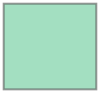

In [350]:
shape

In [354]:
p = shapely.Point((120.789307, 23.093195))

In [357]:
a = [1, 2, 3, 5, 8, 2, 4, 1]

In [370]:
', '.join(map(str, pd.Series(a).value_counts().items()))

'(1, 2), (2, 2), (3, 1), (5, 1), (8, 1), (4, 1)'

In [379]:
frame = pd.read_csv('D:/Feishu/downloads/重点城市_卫星71+_算法结果20230310.csv')

In [383]:
frame['max_size'] = frame.severity_level.map(get_stopline_size)

In [385]:
frame[frame.max_size> 65]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,max_size
0,86389,中山市,广东省,"met: covered 50.57% { cid: 86389, gid: 0, case...",236732,2,113.431545,22.497074,2023-03-09 19:36:17.595,67.190
1,86390,珠海市,广东省,"met: covered 48.89% { cid: 86390, gid: 0, case...",236733,2,113.593484,22.241898,2023-03-09 19:36:17.614,72.632
2,86391,珠海市,广东省,"met: covered 58.60% { cid: 86391, gid: 0, case...",236734,2,113.547631,22.215980,2023-03-09 19:36:17.619,71.392
3,86392,中山市,广东省,"met: covered 60.60% { cid: 86392, gid: 0, case...",236735,2,113.500402,22.248382,2023-03-09 19:36:17.629,66.513
4,86393,中山市,广东省,"met: covered 79.08% { cid: 86393, gid: 0, case...",236736,2,113.349950,22.521044,2023-03-09 19:36:17.633,73.517
...,...,...,...,...,...,...,...,...,...,...
1618,90502,湖州市,浙江省,"met: covered 95.88% { cid: 90502, gid: 0, case...",238350,2,119.936712,31.020048,2023-03-09 19:36:27.021,74.486
1619,90503,湖州市,浙江省,"met: covered 65.40% { cid: 90503, gid: 0, case...",238351,2,119.916582,31.029127,2023-03-09 19:36:27.025,73.559
1620,90506,湖州市,浙江省,"met: covered 80.65% { cid: 90506, gid: 0, case...",238352,2,120.135155,30.860103,2023-03-09 19:36:27.029,73.973
1621,90508,湖州市,浙江省,"met: covered 87.40% { cid: 90508, gid: 0, case...",238353,2,120.182557,30.853402,2023-03-09 19:36:27.033,76.466


In [387]:
frame[(frame.status!=2) & (frame.status!=-1)]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,max_size
515,87689,合肥市,安徽省,"not met: covered 77.84% { cid: 87689, gid: 0, ...",237247,1,117.225113,31.893987,2023-03-09 19:36:19.511,68.897


In [388]:
ll.gu.gcj2wgs(113.33363592, 23.11317029)

(113.32819549586931, 23.11575196754224)

In [346]:
ll.gu.lla2enu(np.r_[114.38467722227215, 23.090436001908774, 0].reshape(-1, 3), anchor)

array([-1.34627540e+02, -9.77606875e+01, -2.17319999e-03])

In [389]:
datetime.fromtimestamp(1674216486800870500/1000_000_000)

datetime.datetime(2023, 1, 20, 20, 8, 6, 800870)

In [378]:
datetime.fromtimestamp(1677600000000/1000)

datetime.datetime(2023, 3, 1, 0, 0)

In [241]:
frame['lon'] = frame['坐标'].map(lambda x: float(x.split(',')[0]))
frame['lat'] = frame['坐标'].map(lambda x: float(x.split(',')[1]))

In [243]:
frame = frame[['taskid', '城市', 'lon', 'lat', ]]

In [248]:
line = [[113.17504227, 23.19721844],[113.17436635, 23.18988871]]

In [297]:
anchor = line[0]

s = np.r_[0, 0]
e = line[1]
e = ll.gu.lla2enu(np.r_[e[0], e[1], 0].reshape(-1, 3), anchor)
e = e[:2]

s

e

n = (e-s)/la.norm(e-s)

pn = np.r_[n[1], -n[0]]

points = [s+ pn* 7, s- pn* 7, e- pn* 7, e+ pn* 7]

polygon = []

for p in points:
    lon, lat, _ = ll.gu.enu2lla(np.r_[p[0], p[1], 0].reshape(-1, 3), anchor)    
    polygon.append([lon[0], lat[0]])

In [390]:
with open('D:/left_pc/error_spot_2.json', 'r') as fin:
    data = json.load(fin)

In [398]:
ll.gu.gcj2wgs(113.32448155,23.11371023)

(113.31905988899206, 23.11630913831515)

In [399]:
with open('D:/left_pc/grup0_aft-pgo172_drtraj.kml', 'r') as fin:
    content = fin.readlines()

In [400]:
len(content)

135500

In [401]:
content[0]

'<?xml version="1.0" encoding="UTF-8"?><kml xmlns="http://earth.google.com/kml/2.2"><Document><Placemark><Style><LineStyle><color>#ffffff00</color><width>1</width></LineStyle></Style><name>case_524192279_i10</name><LineString><coordinates>\n'

In [ ]:
case_505024879_i3

In [404]:
import os

ids = [505024879, 663474558, 524192279, 768537204, 663474558, 227345512, 302513478, 958881481, 727919610, 600489569, 393942936, 792164095]

def need(f):
    return any(map(lambda x: str(x) in f, ids))

os.system('mkdir -p need/')
for f in os.listdir('snippets/'):
    if need(f):
        os.system(f'cp snippets/{f} need/')

In [414]:
len(data['update_position'][0]['snippets'])

615

In [409]:
', '.join([x.split('_')[1] for x in '''case_505024879_i3
case_663474558_i69
case_524192279_i10
case_768537204_i6
case_663474558_i64
case_227345512_i2
case_302513478_i8
case_958881481_i1
case_727919610_i32
case_600489569_i32
case_393942936_i40
case_792164095_i11'''.split('\n')])

'505024879, 663474558, 524192279, 768537204, 663474558, 227345512, 302513478, 958881481, 727919610, 600489569, 393942936, 792164095'

In [415]:
datetime.fromtimestamp(1677600000000/1000)

datetime.datetime(2023, 3, 1, 0, 0)

In [455]:
datetime.fromtimestamp(1675180800000/1000)

datetime.datetime(2023, 2, 1, 0, 0)

In [188]:
citys = [
    ('北京市.csv', 'pic_new_7_ccity_20230310_beijing_area.json'), 
    ('常州市.csv', 'pic_new_7_ccity_20230310_changzhou_area.json'), 
    # ('福州市.csv', 'pic_new_7_ccity_20230310_fuzhou_area.json'), 
    ('海口市.csv', 'pic_new_7_ccity_20230310_haikou_area.json'), 
    ('金华市.csv', 'pic_new_7_ccity_20230310_jinhua_area.json'), 
    ('南京市.csv', 'pic_new_7_ccity_20230310_nanjing_area.json'), 
    ('无锡市.csv', 'pic_new_7_ccity_20230310_wuxi_area.json'), 
    ('厦门市.csv', 'pic_new_7_ccity_20230310_xiamen_area.json'),
]

In [189]:
frames = []

for f, j in citys:
    print(f, j)
    frame = pd.read_csv('D:/Feishu/downloads/7/'+ f, names=['lon', 'lat', 'alt', 'province', 'city', 'road', 'heat'])

    with open('D:/Feishu/downloads/7/'+ j, 'r') as fin:
        data = json.load(fin)
        
    a = {}
    for k, v in data.items():
        i = int(k.split('_')[0])
        try:
            a[i] = max([max(x['size']) for x in v])
        except:
            a[i] = -1
            
    frame['length'] = [a[i] for i in range(len(a))]
    
    frames.append(frame)

北京市.csv pic_new_7_ccity_20230310_beijing_area.json
常州市.csv pic_new_7_ccity_20230310_changzhou_area.json
海口市.csv pic_new_7_ccity_20230310_haikou_area.json
金华市.csv pic_new_7_ccity_20230310_jinhua_area.json
南京市.csv pic_new_7_ccity_20230310_nanjing_area.json
无锡市.csv pic_new_7_ccity_20230310_wuxi_area.json
厦门市.csv pic_new_7_ccity_20230310_xiamen_area.json


In [190]:
frame = pd.concat(frames)

In [192]:
frame.to_csv('D:/Feishu/downloads/7城_热力_卫星大小.csv')

In [196]:
def fine_road(x):
    return not ('residential' in x or 'service' in x or 'unclassified' in x)

In [200]:
frame = frame[frame.road.map(fine_road)]

In [202]:
fineframe = frame[(frame.heat> 5) & (frame.length> 61)]

In [207]:
with open('D:/Feishu/downloads/7-xm-cp.txt', 'w') as fin:
    subframe = fineframe[fineframe.city=='厦门市']
    for i, row in subframe.iterrows():
        lon, lat = ll.gu.wgs2gcj(row.lon, row.lat)
        fin.write(f'{lon},{lat},0,{row.province},{row.city}\n')

In [210]:
needframe = fineframe[fineframe.city!='厦门市']

In [211]:
runframe = pd.read_csv('D:/Feishu/downloads/7城_热力_卫星大小_算法结果0313.csv')

In [215]:
runframe = runframe[runframe.city!='福州市']

In [216]:
needframe

,lon,lat,alt,province,city,road,heat,length
1,116.400408,39.906594,0,北京市,北京市,tertiary+primary,71.272727,67.304986
2,116.420798,39.907027,0,北京市,北京市,primary+secondary,72.916667,95.558786
8,116.346588,39.999638,0,北京市,北京市,primary+secondary,35.727273,82.583025
9,116.380247,40.008558,0,北京市,北京市,primary+secondary,15.615385,69.753085
10,116.364905,39.956541,0,北京市,北京市,tertiary+primary+secondary,10.384615,67.287615
...,...,...,...,...,...,...,...,...
2583,120.464896,31.533781,0,江苏省,无锡市,primary,10.666667,65.967577
2585,119.831339,31.254373,0,江苏省,无锡市,secondary,9.636364,62.377176
2588,119.868382,31.370800,0,江苏省,无锡市,secondary+tertiary,9.800000,74.111281
2599,120.300788,31.484396,0,江苏省,无锡市,primary,20.818182,87.875501


In [217]:
runframe

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,91079,北京市,北京市,NaN,238366,-1,116.406652,39.907998,2023-03-10 23:14:16.817
1,91080,北京市,北京市,NaN,238367,-1,116.427031,39.908424,2023-03-10 23:14:16.817
2,91081,北京市,北京市,NaN,238368,-1,116.352775,40.000988,2023-03-10 23:14:16.817
3,91082,北京市,北京市,NaN,238369,-1,116.386492,40.009955,2023-03-10 23:14:16.817
4,91083,北京市,北京市,NaN,238370,-1,116.371122,39.957918,2023-03-10 23:14:16.817
...,...,...,...,...,...,...,...,...,...
5899,96978,无锡市,江苏省,"not met: covered 68.51% { cid: 96978, gid: 1, ...",244265,-1,120.264266,31.892770,2023-03-10 23:23:49.750
5900,96979,无锡市,江苏省,"not met: covered 87.33% { cid: 96979, gid: 0, ...",244266,-1,119.836136,31.252239,2023-03-10 23:23:49.750
5901,96980,无锡市,江苏省,"met: covered 83.50% { cid: 96980, gid: 0, case...",244267,2,119.873086,31.368649,2023-03-10 23:23:49.750
5902,96981,无锡市,江苏省,"met: covered 86.43% { cid: 96981, gid: 0, case...",244268,2,120.305381,31.482486,2023-03-10 23:23:49.750


In [219]:
# find taskid
coords = []
for i, row in needframe.iterrows():
    coords.append(ll.gu.lla2xyz(row.lon, row.lat, 0))

In [230]:
def is_neeeded(r):
    lon, lat = ll.gu.gcj2wgs(r.task_lng, r.task_lat)
    x, y, z = ll.gu.lla2xyz(lon, lat, 0)
    
    for cx, cy, cz in coords:
        l = (cx- x)**2+ (cy- y)** 2+ (cz- z)** 2
        if l< 100:
            return True
    return False

In [226]:
lon, lat = ll.gu.gcj2wgs(116.406652, 39.907998)

In [229]:
ll.gu.lla2xyz(lon, lat, 0)

(-2178462.512164953, 4388405.613831533, 4070035.3577151615)

In [231]:
yesframe = runframe[runframe.apply(is_neeeded, axis=1)]

In [472]:
subframe = frame[(frame.heat> 5) & (frame.length> 61)]

In [ ]:
needframe

In [234]:
yesframe.to_csv('D:/Feishu/downloads/7-算法-不含厦门.csv')

In [236]:
yesframe[yesframe.severity_level.isna()]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,91079,北京市,北京市,NaN,238366,-1,116.406652,39.907998,2023-03-10 23:14:16.817
1,91080,北京市,北京市,NaN,238367,-1,116.427031,39.908424,2023-03-10 23:14:16.817
2,91081,北京市,北京市,NaN,238368,-1,116.352775,40.000988,2023-03-10 23:14:16.817
3,91082,北京市,北京市,NaN,238369,-1,116.386492,40.009955,2023-03-10 23:14:16.817
4,91083,北京市,北京市,NaN,238370,-1,116.371122,39.957918,2023-03-10 23:14:16.817
...,...,...,...,...,...,...,...,...,...
5430,96509,无锡市,江苏省,NaN,243796,-1,119.857357,31.369487,2023-03-10 23:23:49.750
5512,96591,无锡市,江苏省,NaN,243878,-1,120.280515,31.917730,2023-03-10 23:23:49.750
5623,96702,无锡市,江苏省,NaN,243989,-1,120.311877,31.642472,2023-03-10 23:23:49.750
5828,96907,无锡市,江苏省,NaN,244194,-1,119.813088,31.362343,2023-03-10 23:23:49.750


In [241]:
a = list(yesframe[yesframe.severity_level.isna()].taskid)

In [242]:
n = len(a)//2

In [244]:
','.join(map(str, a[:n]))

'91079,91080,91081,91082,91083,91084,91085,91087,91276,91277,91278,91279,91280,91282,91284,91285,91286,91287,91288,91289,91290,91291,91292,91293,91294,91295,91296,91297,91298,91299,91300,91301,91302,91303,91304,91305,91306,91307,91308,91309,91310,91311,91312,91313,91314,91315,91316,91317,91318,91319,91320,91321,91322,91323,91324,91325,91326,91327,91328,91329,91330,91331,91333,91334,91335,91336,91337,91338,91339,91340,91341,91342,91343,91344,91345,91346,91347,91348,91349,91350,91351,91352,91353,91354,91355,91356,91357,91358,91359,91360,91361,91362,91363,91364,91365,91366,91368,91369,91370,91371,91372,91373,91374,91375,91376,91377,91378,91379,91380,91381,91382,91383,91384,91385,91386,91387,91388,91389,91390,91391,91392,91393,91394,91395,91396,91397,91398,91399,91400,91401,91402,91403,91404,91405,91406,91407,91408,91409,91410,91411,91413,91414,91415,91416,91417,91418,91419,91420,91421,91422,91423,91424,91425,91426,91427,91428,91429,91430,91431,91432,91433,91434,91435,91436,91437,91438,914

In [245]:
','.join(map(str, a[n:]))

'92506,92507,92509,92510,92512,92513,92514,92516,92517,92518,92519,92520,92522,92523,92524,92525,92526,92527,92528,92529,92530,92531,92532,92533,92538,92539,92540,92543,92544,92545,92546,92547,92549,92551,92552,92553,92554,92555,92557,92558,92559,92560,92561,92562,92563,92564,92565,92566,92567,92568,92569,92570,92571,92572,92573,92574,92575,92576,92577,92578,92579,92580,92582,92583,92584,92585,92586,92587,92588,92589,92590,92591,92592,92594,92595,92596,92597,92599,92600,92601,92602,92603,92605,92606,92607,92608,92609,92610,92612,92613,92614,92615,92616,92617,92618,92619,92620,92621,92622,92623,92624,92625,92627,92628,92629,92630,92631,92632,92633,92634,92635,92636,92637,92638,92639,92640,92641,92642,92643,92644,92645,92646,92647,92648,92649,92650,92651,92652,92653,92654,92655,92656,92657,92658,92659,92660,92661,92662,92663,92664,92665,92666,92667,92668,92669,92670,92671,92672,92673,92674,92675,92676,92677,92678,92679,92680,92681,92682,92683,92684,92685,92686,92687,92688,92689,92690,926

In [476]:
with open('D:/Feishu/downloads/7-cp.txt', 'w') as fin:
    for i, row in subframe.iterrows():
        lon, lat = ll.gu.wgs2gcj(row.lon, row.lat)
        fin.write(f'{lon},{lat},0,{row.province},{row.city}\n')

In [246]:
yesframe.

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,91079,北京市,北京市,NaN,238366,-1,116.406652,39.907998,2023-03-10 23:14:16.817
1,91080,北京市,北京市,NaN,238367,-1,116.427031,39.908424,2023-03-10 23:14:16.817
2,91081,北京市,北京市,NaN,238368,-1,116.352775,40.000988,2023-03-10 23:14:16.817
3,91082,北京市,北京市,NaN,238369,-1,116.386492,40.009955,2023-03-10 23:14:16.817
4,91083,北京市,北京市,NaN,238370,-1,116.371122,39.957918,2023-03-10 23:14:16.817
...,...,...,...,...,...,...,...,...,...
5898,96977,无锡市,江苏省,"not met: covered 63.82% { cid: 96977, gid: 0, ...",244264,-1,120.469464,31.531936,2023-03-10 23:23:49.750
5900,96979,无锡市,江苏省,"not met: covered 87.33% { cid: 96979, gid: 0, ...",244266,-1,119.836136,31.252239,2023-03-10 23:23:49.750
5901,96980,无锡市,江苏省,"met: covered 83.50% { cid: 96980, gid: 0, case...",244267,2,119.873086,31.368649,2023-03-10 23:23:49.750
5902,96981,无锡市,江苏省,"met: covered 86.43% { cid: 96981, gid: 0, case...",244268,2,120.305381,31.482486,2023-03-10 23:23:49.750


In [248]:
datetime.fromtimestamp(1675180800000/1000)

datetime.datetime(2023, 2, 1, 0, 0)

In [253]:
int(datetime(2023, 2, 10).timestamp()* 1000)

1675958400000

In [435]:
a = {}
for k, v in data.items():
    i = int(k.split('_')[0])
    try:
        a[i] = max([max(x['size']) for x in v])
    except:
        a[i] = -1

In [438]:
frame['length'] = [a[i] for i in range(len(a))]

In [442]:
frame[(frame.length> 61) & (frame.heat> 5)]

,lon,lat,alt,city,province,road,heat,length
1,116.400408,39.906594,0,北京市,北京市,tertiary+primary,71.272727,67.304986
2,116.420798,39.907027,0,北京市,北京市,primary+secondary,72.916667,95.558786
8,116.346588,39.999638,0,北京市,北京市,primary+secondary,35.727273,82.583025
9,116.380247,40.008558,0,北京市,北京市,primary+secondary,15.615385,69.753085
10,116.364905,39.956541,0,北京市,北京市,tertiary+primary+secondary,10.384615,67.287615
...,...,...,...,...,...,...,...,...
4662,116.335516,40.037704,0,北京市,北京市,primary+secondary,66.769231,100.788797
4663,116.634031,39.920014,0,北京市,北京市,tertiary+secondary,37.714286,70.755925
4667,116.471354,39.869893,0,北京市,北京市,secondary,35.769231,64.613444
4668,116.394742,39.844108,0,北京市,北京市,tertiary+primary,19.769231,91.533646


In [484]:
frame.city.value_counts()

北京市    4669
无锡市    2607
常州市    2485
南京市    2183
金华市    2114
福州市     865
海口市     444
莆田市       1
Name: city, dtype: int64

In [40]:
','.join(map(str, badrun[badrun.max_size< 75].taskid))

'87815,87995,88126,88309,88435,88464,88543,88717,88721,88885,88963,89101,89118,89178,89280,89349,89393,89411,89497,89544,89821,89982,90000,90211,90342'

In [32]:
badrun[(badrun.max_size>= 75) & (badrun.case_size> 10)].shape

(14, 12)

In [24]:
frame = pd.read_csv('D:/Feishu/downloads/qgcsv/confirmed/成渝区域.csv')

In [26]:
frame1 = pd.read_csv('D:/Feishu/downloads/qgcsv/confirmed/京津翼.csv')

In [38]:
other = ['成渝区域', '京津翼', '其他城市', '之前未统计的', '重点省会城市']

In [39]:
pd.concat([pd.read_csv(f'D:/Feishu/downloads/qgcsv/confirmed/{x}.csv') for x in other])

,Unnamed: 0,lon,lat,alt,province,city,crossinfo,heat,cm_size,task_lng,task_lat
0,5183,111.341246,30.724435,0,湖北省,宜昌市,primary,11.500000,86.229603,111.347055,30.722107
1,5260,111.379576,30.655190,0,湖北省,宜昌市,primary,7.000000,80.117626,111.385467,30.652886
2,5304,111.336442,30.743405,0,湖北省,宜昌市,secondary+primary,8.800000,71.586761,111.342240,30.741078
3,5306,111.430137,30.669979,0,湖北省,宜昌市,secondary+primary,8.181818,73.698538,111.436050,30.667675
4,5312,111.372369,30.657831,0,湖北省,宜昌市,primary,7.200000,83.595356,111.378248,30.655521
...,...,...,...,...,...,...,...,...,...,...,...
1957,18306,102.976848,25.184815,0,云南省,昆明市,trunk+secondary,5.500000,147.953330,102.978406,25.181813
1958,18308,102.761824,25.108990,0,云南省,昆明市,tertiary+secondary,29.615385,77.948870,102.763318,25.106048
1959,18323,102.830792,24.866943,0,云南省,昆明市,tertiary,11.357143,136.843050,102.832211,24.863876
1960,18328,102.761837,25.050218,0,云南省,昆明市,tertiary+secondary,12.250000,89.493172,102.763329,25.047270


In [43]:
import json

In [44]:
with open('D:/Feishu/downloads/pic_other_area_40k_0216.json', 'r') as fin:
    data = json.load(fin)

In [46]:
len(data)

19255

In [56]:
frame = pd.read_csv('D:/Feishu/downloads/other_province.csv', names=['lon', 'lat', 'alt', 'city', 'province', 'road', 'heat'])

In [86]:
qtframe = pd.read_csv('D:/Feishu/downloads/qgcsv/confirmed/其他城市.csv')

In [90]:
csjframe = pd.read_csv('D:/Feishu/downloads/qgcsv/confirmed/长三角卫星图算法结果.csv')

In [91]:
zsjframe = pd.read_csv('D:/Feishu/downloads/qgcsv/confirmed/珠三角卫星图算法20230217.csv')

In [109]:
csjframe.head()

,id,city,area,length,lat,lng,hot
0,0,泰州市,986.206192,37.448883,120.246367,31.999870,17.416667
1,1,泰州市,2405.088272,60.409843,120.248928,32.005582,13.230769
2,2,扬州市,834.273000,36.208815,119.444803,32.750599,7.111111
3,3,扬州市,883.643984,36.948845,119.580440,32.427339,20.181818
4,4,徐州市,2444.504160,61.491704,118.380259,34.354698,7.250000


In [106]:
qtframe.head()

,Unnamed: 0,lon,lat,alt,city,province,road,heat,length
0,0,119.188398,26.075070,0,福建省,福州市,secondary+trunk,17.363636,74.319159
1,1,119.244810,26.079992,0,福建省,福州市,primary,55.000000,79.205589
2,2,119.321404,26.094100,0,福建省,福州市,secondary+primary,10.272727,95.426772
3,3,119.447633,25.598774,0,福建省,福州市,trunk,10.833333,42.723386
4,4,118.410263,24.667525,0,福建省,泉州市,secondary+primary,10.181818,-1.000000


In [298]:
links = [(0, 1, 1), (1, 2, 1), (2, 0, 1), (3, 4, 1), (4, 5, 1), (1, 3, 1)]

A = np.zeros((6, 6))
for i, j, w in links:
    A[i, j] += w
    A[j, i] += w

A = np.diag(A.sum(axis=1))- A

sorted(la.eigvals(A))[1]

(0.3248691294333546+0j)

0.3248691294333546

In [299]:
hex(1320495168)

'0x4eb52840'

In [300]:
math.cos(math.radians(5))

0.9961946980917455

In [118]:
csj = csjframe[['city', 'length', 'lat', 'lng', 'hot']].rename(columns={'lng': 'lon', 'hot': 'heat'})

In [120]:
zsj = zsjframe[['city', 'length', 'lat', 'lng', 'hot']].rename(columns={'lng': 'lon', 'hot': 'heat'})

In [134]:
qt = qtframe[['province', 'length', 'lon', 'lat', 'heat']].rename(columns={'province': 'city'})

In [ ]:
 666 1165
1165 1110


In [301]:
A = np.c_[[666, 1165], [1165, 1110]]

In [302]:
A

array([[ 666, 1165],
       [1165, 1110]])

In [316]:
la.eigvals(np.c_[[1, -1], [-1, 1]])

array([2.+0.j, 0.+0.j])

In [325]:
a = '''I20230314 21:34:17.216418 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.977162
I20230314 21:34:17.218076 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.97741
I20230314 21:34:17.219662 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.993241
I20230314 21:34:17.221181 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.993925
I20230314 21:34:17.222579 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.986646
I20230314 21:34:17.223999 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.848406
I20230314 21:34:17.226306 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.977353
I20230314 21:34:17.228307 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.846353
I20230314 21:34:17.230167 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.952422
I20230314 21:34:17.231949 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.911084
I20230314 21:34:17.233832 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.726111
I20230314 21:34:17.235669 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.931654
I20230314 21:34:17.237417 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.989277
I20230314 21:34:17.239107 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.968529
I20230314 21:34:17.240880 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.780495
I20230314 21:34:17.242517 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.975806
I20230314 21:34:17.244050 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.920068
I20230314 21:34:17.245657 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.840772
I20230314 21:34:17.247224 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.989786
I20230314 21:34:17.248608 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.843107
I20230314 21:34:17.248986 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.930199
I20230314 21:34:17.250288 25786 case_matcher.cpp:214] [DEBUG] ratio: 0.807597'''

In [326]:
a = [float(x.split('ratio:')[-1]) for x in a.split('\n')]

In [331]:
frame = pd.read_csv('D:/Feishu/downloads/new_7_20230314.csv')

In [355]:
frame['max_size'] = frame.severity_level.map(get_stopline_size)

In [353]:
given = pd.read_csv('D:/Feishu/downloads/7-算法-不含厦门-lz.csv')

In [354]:
given

,taskid,task_lng,task_lat,city,province,max_size
0,91089,116.363458,40.081111,北京市,北京市,80.200
1,91096,116.458641,39.866129,北京市,北京市,82.345
2,91099,116.321230,39.967004,北京市,北京市,78.738
3,91104,116.310369,39.932344,北京市,北京市,80.221
4,91109,116.321286,39.907446,北京市,北京市,80.733
...,...,...,...,...,...,...
616,96943,120.209947,31.799246,无锡市,江苏省,77.306
617,96959,120.201393,31.639516,无锡市,江苏省,80.198
618,96967,120.454647,31.722678,无锡市,江苏省,137.980
619,96973,120.428836,31.608199,无锡市,江苏省,76.191


In [361]:
fine = frame[(frame.length>75) & (~frame.taskid.isin(given.taskid))]

In [364]:
fine[['taskid', 'city', 'province', 'task_lng', 'task_lat', 'max_size']].to_csv('D:/Feishu/downloads/7-补充.csv', index=None)

In [348]:
frame[(frame.length> 75)]

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,length
5,91084,北京市,北京市,"met: covered 70.84% { cid: 91084, gid: 0, case...",244531,2,116.394261,39.976900,2023-03-13 21:45:24.299,76.070
8,91087,北京市,北京市,"met: covered 92.12% { cid: 91087, gid: 0, case...",244533,2,116.546358,39.776464,2023-03-13 21:45:24.316,105.951
10,91089,北京市,北京市,"met: covered 60.13% { cid: 91089, gid: 0, case...",238376,2,116.363458,40.081111,2023-03-10 23:14:16.817,80.200
17,91096,北京市,北京市,"met: covered 64.69% { cid: 91096, gid: 0, case...",238383,2,116.458641,39.866129,2023-03-10 23:14:16.817,82.345
20,91099,北京市,北京市,"met: covered 69.47% { cid: 91099, gid: 0, case...",238386,2,116.321230,39.967004,2023-03-10 23:14:16.817,78.738
...,...,...,...,...,...,...,...,...,...,...
4850,97199,厦门市,福建省,"met: covered 46.10% { cid: 97199, gid: 0, case...",244515,2,118.262892,24.590059,2023-03-13 21:42:04.258,89.332
4852,97201,厦门市,福建省,"met: covered 65.09% { cid: 97201, gid: 0, case...",244517,2,118.260332,24.596884,2023-03-13 21:42:04.258,76.238
4853,97202,厦门市,福建省,"met: covered 58.68% { cid: 97202, gid: 0, case...",244518,2,118.251436,24.562056,2023-03-13 21:42:04.258,82.791
4859,97208,厦门市,福建省,"met: covered 41.89% { cid: 97208, gid: 0, case...",244524,2,118.272368,24.634180,2023-03-13 21:42:04.258,75.712


In [365]:
fine

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time,length,max_size
5,91084,北京市,北京市,"met: covered 70.84% { cid: 91084, gid: 0, case...",244531,2,116.394261,39.976900,2023-03-13 21:45:24.299,76.070,76.070
8,91087,北京市,北京市,"met: covered 92.12% { cid: 91087, gid: 0, case...",244533,2,116.546358,39.776464,2023-03-13 21:45:24.316,105.951,105.951
26,91105,北京市,北京市,"met: covered 43.22% { cid: 91105, gid: 0, case...",238392,2,116.310106,39.932344,2023-03-10 23:14:16.817,92.186,92.186
72,91155,北京市,北京市,"met: covered 75.63% { cid: 91155, gid: 0, case...",238442,2,116.308342,39.962264,2023-03-10 23:14:16.817,103.494,103.494
169,91255,北京市,北京市,"met: covered 66.73% { cid: 91255, gid: 0, case...",238542,2,116.301151,39.974537,2023-03-10 23:14:16.817,80.233,80.233
...,...,...,...,...,...,...,...,...,...,...,...
4850,97199,厦门市,福建省,"met: covered 46.10% { cid: 97199, gid: 0, case...",244515,2,118.262892,24.590059,2023-03-13 21:42:04.258,89.332,89.332
4852,97201,厦门市,福建省,"met: covered 65.09% { cid: 97201, gid: 0, case...",244517,2,118.260332,24.596884,2023-03-13 21:42:04.258,76.238,76.238
4853,97202,厦门市,福建省,"met: covered 58.68% { cid: 97202, gid: 0, case...",244518,2,118.251436,24.562056,2023-03-13 21:42:04.258,82.791,82.791
4859,97208,厦门市,福建省,"met: covered 41.89% { cid: 97208, gid: 0, case...",244524,2,118.272368,24.634180,2023-03-13 21:42:04.258,75.712,75.712


In [350]:
','.join(map(str, frame[frame.severity_level.isna()].taskid))

'91278,91297,91320,91666,91808,91815,91886,91921,92053,92066,92073,92076,92098,92159,92291,92351,92359,92783,92840,92958,93120,93136,93144,93145,93271,93954,94075,94161,94762,95321,97042,97144'

In [396]:
a = pd.read_csv('D:/Feishu/downloads/_select_pt_id_as_taskId_pt_city_pt_province_pt_severity_level_wf_202303151124.csv')

In [399]:
a['max_size'] = a.severity_level.map(get_stopline_size)

In [404]:
fine = a[a.max_size> 75]

In [405]:
fine[['taskid', 'city', 'province', 'task_lng', 'task_lat', 'max_size']].to_csv('D:/Feishu/downloads/7-补充2.csv', index=None)

In [345]:
[x for x in frame[(frame.status==-1) & (frame.length>75)].severity_level]

['not met: covered 29.69% { cid: 91250, gid: 0, cases: 7, dis: 78.313 }',
 'not met: covered 36.07% { cid: 92250, gid: 3, cases: 6, dis: 80.050 } { cid: 92250, gid: 0, cases: 9, dis: 0.000 } { cid: 92250, gid: 2, cases: 37, dis: 0.000 } { cid: 92250, gid: 1, cases: 97, dis: 0.000 }',
 'not met: covered 22.34% { cid: 92336, gid: 0, cases: 9, dis: 119.726 }',
 'not met: covered 30.71% { cid: 92518, gid: 0, cases: 9, dis: 81.923 }',
 'not met: covered 0.00% { cid: 92793, gid: 0, cases: 6, dis: 75.333 }',
 'not met: covered 29.87% { cid: 92875, gid: 0, cases: 8, dis: 77.037 }',
 'not met: covered 40.56% { cid: 92923, gid: 0, cases: 9, dis: 78.246 }',
 'not met: covered 37.81% { cid: 93273, gid: 0, cases: 9, dis: 76.164 }',
 'not met: covered 54.29% { cid: 97090, gid: 1, cases: 3, dis: 88.637 } { cid: 97090, gid: 0, cases: 4, dis: 88.581 }',
 'not met: covered 45.16% { cid: 97195, gid: 1, cases: 9, dis: 89.222 } { cid: 97195, gid: 0, cases: 4, dis: 0.000 }']

In [351]:
datetime.fromtimestamp(1677600000000/1000)

datetime.datetime(2023, 3, 1, 0, 0)

In [352]:
datetime.fromtimestamp(1675180800000/1000)

datetime.datetime(2023, 2, 1, 0, 0)

In [406]:
766//2

383

In [408]:
414- 352

62

In [410]:
a = ['161', '280', '86', '113', '406', '71', '198', '125', '348', '45', '178', '279', '287', '17', '403', '283', '60', '55', '59', '208', '40', '126', '107', '146', '99', '405', '409', '339', '400', '157', '363', '192', '222', '395', '273', '108', '15', '63', '82', '159', '171', '404', '28', '172', '325', '369', '315', '220', '77', '32', '298', '70', '56', '346', '145', '230', '306', '169', '87', '73', '316', '10', '372', '170', '119', '305', '239', '57', '155', '380', '385', '11', '116', '243', '197', '354', '326', '292', '205', '115', '402', '164', '365', '104', '258', '162', '257', '163', '76', '3', '133', '382', '22', '124', '389', '110', '360', '14', '206', '193', '81', '313', '288', '69', '335', '296', '2', '234', '318', '224', '291', '329', '233', '6', '272', '91', '8', '173', '256', '187', '330', '142', '245', '293', '328', '112', '21', '240', '250', '396', '200', '128', '179', '109', '215', '286', '388', '141', '366', '262', '249', '267', '85', '84', '254', '36', '364', '411', '188', '390', '242', '337', '356', '29', '210', '401', '263', '68', '347', '349', '237', '94', '223', '202', '379', '383', '156', '89', '333', '105', '277', '261', '384', '204', '259', '235', '49', '341', '103', '136', '148', '342', '34', '232', '381', '52', '181', '268', '285', '307', '345', '93', '410', '46', '207', '158', '54', '319', '42', '167', '62', '12', '317', '252', '132', '302', '183', '327', '139', '65', '118', '203', '374', '152', '151', '140', '111', '195', '226', '199', '246', '122', '185', '265', '39', '177', '43', '391', '359', '393', '309', '130', '101', '16', '121', '320', '253', '213', '24', '48', '290', '74', '281', '184', '135', '323', '370', '37', '38', '83', '270', '294', '196', '275', '408', '314', '160', '90', '231', '301', '311', '274', '23', '100', '80', '149', '150', '350', '175', '58', '120', '227', '264', '377', '88', '18', '147', '344', '282', '106', '67', '392', '248', '153', '190', '47', '407', '340', '127', '9', '75', '27', '238', '373', '338', '66', '371', '211', '123', '33', '26', '229', '295', '186', '182', '353', '244', '367', '64', '324', '228', '357', '61', '331', '368', '138', '397', '332', '225', '297', '144', '98', '95', '13', '176', '25', '51', '96', '378', '322', '375', '247', '154', '92', '352', '174', '20', '41', '218', '194', '212', '251', '44', '201', '19', '304', '165', '4', '376', '236', '271', '189', '209', '358', '78', '343', '276', '387', '168', '336', '398', '413', '351', '137', '312', '50', '214', '53', '117', '386', '362', '321', '412', '166', '399', '284', '394', '260', '217', '269', '300', '97', '35', '31', '191', '129', '241', '102', '5', '1', '7', '114', '361', '334', '303', '131', '134', '180', '299', '221', '278', '30', '266', '72', '310', '355', '79', '143', '308', '255', '216', '219', '0', '289']

In [425]:
np.random.choice(range(414), 100, False)

array([235, 134, 225, 112, 412, 220, 261, 366,   6,  88,  75, 401,   4,
       128,  35, 404, 379, 243, 382, 260, 273, 327, 250, 157, 195, 314,
       114,  76, 190, 141, 176, 248, 236, 322, 198, 354, 289, 227, 175,
       337, 207,  81, 375, 315, 192, 110, 218, 259, 329, 147,  83, 104,
       332, 139, 140,  18, 212, 392, 187, 288, 101,  25,  13, 230,  86,
       180, 100,  69, 278, 355, 284, 391, 395, 137, 129,   8, 164,  44,
       115,  95,  17,  87,  39,  55, 231, 222, 383, 342,   9, 117, 145,
       350, 302, 358, 239, 281,  73, 113, 182, 102])

In [426]:
samples = [235, 134, 225, 112, 412, 220, 261, 366,   6,  88,  75, 401,   4,
       128,  35, 404, 379, 243, 382, 260, 273, 327, 250, 157, 195, 314,
       114,  76, 190, 141, 176, 248, 236, 322, 198, 354, 289, 227, 175,
       337, 207,  81, 375, 315, 192, 110, 218, 259, 329, 147,  83, 104,
       332, 139, 140,  18, 212, 392, 187, 288, 101,  25,  13, 230,  86,
       180, 100,  69, 278, 355, 284, 391, 395, 137, 129,   8, 164,  44,
       115,  95,  17,  87,  39,  55, 231, 222, 383, 342,   9, 117, 145,
       350, 302, 358, 239, 281,  73, 113, 182, 102]

In [427]:
samples = sorted(samples)

In [440]:
' '.join(map(str, samples))

'4 6 8 9 13 17 18 25 35 39 44 55 69 73 75 76 81 83 86 87 88 95 100 101 102 104 110 112 113 114 115 117 128 129 134 137 139 140 141 145 147 157 164 175 176 180 182 187 190 192 195 198 207 212 218 220 222 225 227 230 231 235 236 239 243 248 250 259 260 261 273 278 281 284 288 289 302 314 315 322 327 329 332 337 342 350 354 355 358 366 375 379 382 383 391 392 395 401 404 412'

In [443]:
hd = np.loadtxt('D:/Feishu/downloads/珠三角环岛任务.txt', delimiter=',')

In [18]:
rw = np.loadtxt('D:/Feishu/downloads/全部id.txt', delimiter=',')

In [46]:
def not_dup(r):
    xx, yy, zz = ll.gu.lla2xyz(r.task_lng, r.task_lat, 0)
    for rr in rw:
        x, y, z = ll.gu.lla2xyz(rr[0], rr[1], 0)
        len2 = (xx- x)** 2+ (yy- y)** 2+ (zz- z)** 2
        if len2< 40000 and len2> 100:
            print(len2** 0.5)
            return False
        
    return True

In [49]:
frame

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,4412,东莞市,广东省,"met: covered 55.87% { cid: 4412, gid: 0, cases...",66612,2,113.759339,23.113706,2023-01-19 16:29:02.224
1,4414,东莞市,广东省,not met: covered 6/11,66614,2,113.735372,23.110681,2023-01-19 16:29:02.230
2,4416,东莞市,广东省,"met: covered 70.21% { cid: 4416, gid: 0, cases...",66616,2,113.718572,23.104596,2023-01-19 16:29:02.236
3,4440,东莞市,广东省,"met: covered 61.88% { cid: 4440, gid: 0, cases...",66640,2,113.758651,23.035020,2023-01-19 16:29:02.303
4,4485,珠海市,广东省,"met: covered 63.50% { cid: 4485, gid: 0, cases...",66685,2,113.508640,22.221973,2023-01-19 16:29:02.430
...,...,...,...,...,...,...,...,...,...
2553,101087,云南省,昆明市,"met: covered 0.00% { cid: 101087, gid: 0, case...",251335,2,102.725821,25.071693,2023-03-20 14:31:28.186
2554,101088,云南省,昆明市,"met: covered 0.00% { cid: 101088, gid: 0, case...",251336,2,102.466206,24.921147,2023-03-20 14:31:28.186
2555,101089,云南省,昆明市,"met: { cid: 101089, gid: 0, cases: 3, dis: 0....",251337,2,103.297701,24.778049,2023-03-20 14:31:28.186
2556,101090,云南省,昆明市,"met: covered 0.00% { cid: 101090, gid: 0, case...",251338,2,102.640263,24.957005,2023-03-20 14:31:28.186


In [43]:
rw = frame[['task_lng', 'task_lat']].to_numpy()

In [45]:
for r in rw:
    print(r)
    break

[113.759339  23.113706]


In [ ]:
frame.toto_numpy

In [456]:
with open('D:/Feishu/downloads/珠三角环岛任务-uniq.txt', 'w') as fout:
    for i, x in enumerate(hd):
        if not dup(x):
            fout.write(f'{x[0]},{x[1]}\n')

10.96702504134842
6.353942833613209
32.053808963548235
63.86712297813303
14.92914984052588
34.08864480094676
3.1986700891749162
13.16283535751976
127.86176482036045


In [20]:
uniframe = frame[frame.apply(not_dup, axis=1)]

10.67079839228171
26.83842857196134
30.490267976929232
58.02174924961219
33.96192332914094
41.46944536419291


In [21]:
uniframe

,坐标,city,省份,lon,lat
0,"114.5114053,38.05385139",石家庄市,河北省,114.511405,38.053851
1,"112.5993211,37.79437472",太原市,山西省,112.599321,37.794375
2,"112.5424106,37.76762833",太原市,山西省,112.542411,37.767628
3,"112.5313056,37.79151889",太原市,山西省,112.531306,37.791519
4,"112.4826831,37.772055",太原市,山西省,112.482683,37.772055
...,...,...,...,...,...
120,"102.725821,25.0716925",昆明市,云南省,102.725821,25.071693
121,"102.466206,24.9211474",昆明市,云南省,102.466206,24.921147
122,"103.297701,24.7780488",昆明市,云南省,103.297701,24.778049
123,"102.640263,24.9570049",昆明市,云南省,102.640263,24.957005


In [30]:
with open('次级环岛cp.txt', 'w', encoding='utf-8') as fout:
    for i, r in uniframe.iterrows():
        fout.write(f'{r.lon},{r.lat},0,{r.city},{r.省份}\n')

In [25]:
87041,87337,86649,87505,8751

In [32]:
from datetime import datetime

In [35]:
datetime.fromtimestamp(1675958400000/ 1000)

datetime.datetime(2023, 2, 10, 0, 0)

In [34]:
datetime.fromtimestamp(1678377600000/ 1000)

datetime.datetime(2023, 3, 10, 0, 0)

In [508]:
uniframe[['lon', 'lat', 'city']].to_csv('D:/Feishu/downloads/剩余环岛uniq.csv', index=None)

In [504]:
frame = pd.read_csv('D:/Feishu/downloads/剩余环岛.csv')
frame['lon'] = frame['坐标'].map(lambda x: float(x.split(',')[0]))
frame['lat'] = frame['坐标'].map(lambda x: float(x.split(',')[1]))
frame['city'] = frame['城市']

In [37]:
frame = pd.read_csv('D:/Feishu/downloads/80id.csv')

In [38]:
frame

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,4412,东莞市,广东省,"met: covered 55.87% { cid: 4412, gid: 0, cases...",66612,2,113.759339,23.113706,2023-01-19 16:29:02.224
1,4414,东莞市,广东省,not met: covered 6/11,66614,2,113.735372,23.110681,2023-01-19 16:29:02.230
2,4416,东莞市,广东省,"met: covered 70.21% { cid: 4416, gid: 0, cases...",66616,2,113.718572,23.104596,2023-01-19 16:29:02.236
3,4440,东莞市,广东省,"met: covered 61.88% { cid: 4440, gid: 0, cases...",66640,2,113.758651,23.035020,2023-01-19 16:29:02.303
4,4485,珠海市,广东省,"met: covered 63.50% { cid: 4485, gid: 0, cases...",66685,2,113.508640,22.221973,2023-01-19 16:29:02.430
...,...,...,...,...,...,...,...,...,...
2553,101087,云南省,昆明市,"met: covered 0.00% { cid: 101087, gid: 0, case...",251335,2,102.725821,25.071693,2023-03-20 14:31:28.186
2554,101088,云南省,昆明市,"met: covered 0.00% { cid: 101088, gid: 0, case...",251336,2,102.466206,24.921147,2023-03-20 14:31:28.186
2555,101089,云南省,昆明市,"met: { cid: 101089, gid: 0, cases: 3, dis: 0....",251337,2,103.297701,24.778049,2023-03-20 14:31:28.186
2556,101090,云南省,昆明市,"met: covered 0.00% { cid: 101090, gid: 0, case...",251338,2,102.640263,24.957005,2023-03-20 14:31:28.186


In [ ]:
\xe2\x80\x8b

In [468]:
int('e2', 16)

226

In [473]:
pd.read_csv('D:/Feishu/downloads/环岛p0.csv')

,taskid,city,province,severity_level,wfrid,status,task_lng,task_lat,update_time
0,97213,珠海市,广东省,"met: covered 30.74% { cid: 97213, gid: 0, case...",247279,2,113.581097,22.235977,2023-03-15 20:41:18.738
1,97214,珠海市,广东省,"not met: { cid: 97214, gid: 0, cases: 11, dis...",247280,-1,113.221991,22.345839,2023-03-15 20:41:18.738
2,97215,珠海市,广东省,not met: covered 3.23%,247281,-1,113.307717,22.170076,2023-03-15 20:41:18.738
3,97216,肇庆市,广东省,"met: { cid: 97216, gid: 0, cases: 90, dis: 14...",247282,2,112.568090,23.157746,2023-03-15 20:41:18.738
4,97217,惠州市,广东省,"not met: covered 42.40% { cid: 97217, gid: 0, ...",247283,-1,114.440511,23.073764,2023-03-15 20:41:18.738
5,97218,惠州市,广东省,"not met: covered 73.32% { cid: 97218, gid: 0, ...",247284,-1,114.426906,23.069046,2023-03-15 20:41:18.738
6,97219,惠州市,广东省,"not met: covered 31.84% { cid: 97219, gid: 0, ...",247285,-1,114.423381,23.131860,2023-03-15 20:41:18.738
7,97220,惠州市,广东省,"not met: covered 50.81% { cid: 97220, gid: 0, ...",247286,-1,114.430991,23.114331,2023-03-15 20:41:18.738
8,97221,惠州市,广东省,"met: covered 68.46% { cid: 97221, gid: 0, case...",247287,2,114.458389,22.829269,2023-03-15 20:41:18.738
9,97222,惠州市,广东省,not met:,247288,-1,114.851611,22.722892,2023-03-15 20:41:18.738


In [486]:
frame = pd.read_csv('D:/Feishu/downloads/剩余环岛.csv')
frame['lon'] = frame['坐标'].map(lambda x: float(x.split(',')[0]))
frame['lat'] = frame['坐标'].map(lambda x: float(x.split(',')[0]))
frame['city'] = frame['城市']

In [487]:
frame

,坐标,城市,lon,lat,city
0,"117.2053028,39.1332275",天津市,117.205303,117.205303,天津市
1,"117.2097635,39.15078572",天津市,117.209763,117.209763,天津市
2,"117.3858956,39.16165203",天津市,117.385896,117.385896,天津市
3,"117.2455428,39.00108222",天津市,117.245543,117.245543,天津市
4,"117.1050861,39.26324056",天津市,117.105086,117.105086,天津市
...,...,...,...,...,...
138,"120.010223,29.4443614",金华市,120.010223,120.010223,金华市
139,"120.888207,29.5038285",绍兴市,120.888207,120.888207,绍兴市
140,"120.617792,28.7309067",台州市,120.617792,120.617792,台州市
141,"120.186469,29.3272191",金华市,120.186469,120.186469,金华市


In [438]:
for i in samples:
    jsonfile = f'D:/left_pc/0307yz/out/out-error_spot_{i}.json'
    if not os.path.exists(jsonfile):
        print(i)

17
18
25
139
140
141
248
250
259
329
391
395
412


In [478]:
frame = pd.read_csv('D:/Feishu/downloads/新增7城.csv')

In [480]:
frame['max_size'] = frame.severity_level.map(get_stopline_size)

In [485]:
frame[(frame.max_size> 65) & (frame.max_size< 80)].to_csv('D:/Feishu/downloads/新增7城_65-80.csv', index=None)

In [384]:
B = np.r_[ 666/3, 1165/18, 1165/18, 1110/15 ].reshape((2, 2))

In [387]:
2/9

0.2222222222222222

In [386]:
B/la.norm(B)

array([[0.88350253, 0.25757769],
       [0.25757769, 0.29450084]])

In [383]:
2* 0.4356

0.8712

In [161]:
481+ 2587+ 12151+ 2164+ 1777

19160

In [390]:
f1, f2 = pd.read_csv("D:/Feishu/downloads/三方环岛大于5.csv", names=['lon', 'lat', 'city']), pd.read_csv("D:/Feishu/downloads/osm环岛大于5.csv", names=['lon', 'lat', 'city'])

In [392]:
frame = pd.concat((f1, f2))

In [395]:
frame.to_csv('D:/Feishu/downloads/环岛5.csv', index=False)

In [112]:
ll.gu.wgs2gcj(113.427572, 22.359211)

(113.4330260657193, 22.356520432858627)

In [69]:
a = {}

for key, value in data.items():
    l = -1
    try:
        l = max([max(x['size']) for x in value])
    except:
        pass
    i = int(key.split('_')[0])
    a[i] = l

In [77]:
frame['length'] = [a[i] for i in range(len(a))]

In [81]:
frame.to_csv('D:/Feishu/downloads/其他城市.csv')

In [62]:
max(value[0]['size'])

74.31915942382813

In [63]:
max?

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method


In [40]:
for x in [pd.read_csv(f'D:/Feishu/downloads/qgcsv/confirmed/{x}.csv') for x in other]:
    print(x.shape)

(40, 11)
(331, 11)
(300, 11)
(154, 11)
(1962, 11)


In [37]:
pd.concat([frame, frame1])

,Unnamed: 0,lon,lat,alt,province,city,crossinfo,heat,cm_size,task_lng,task_lat
0,5183,111.341246,30.724435,0,湖北省,宜昌市,primary,11.500000,86.229603,111.347055,30.722107
1,5260,111.379576,30.655190,0,湖北省,宜昌市,primary,7.000000,80.117626,111.385467,30.652886
2,5304,111.336442,30.743405,0,湖北省,宜昌市,secondary+primary,8.800000,71.586761,111.342240,30.741078
3,5306,111.430137,30.669979,0,湖北省,宜昌市,secondary+primary,8.181818,73.698538,111.436050,30.667675
4,5312,111.372369,30.657831,0,湖北省,宜昌市,primary,7.200000,83.595356,111.378248,30.655521
...,...,...,...,...,...,...,...,...,...,...,...
326,17630,117.175257,39.077893,0,天津市,天津市,secondary+primary,34.818182,132.676416,117.181599,39.078940
327,17639,117.377148,40.046182,0,天津市,天津市,secondary+primary,8.111111,74.727283,117.383813,40.047602
328,17655,117.682341,39.031170,0,天津市,天津市,secondary,10.545455,98.929999,117.688566,39.032037
329,17658,117.455461,38.991381,0,天津市,天津市,primary,39.200000,74.059380,117.461941,38.992416


(40, 11)

In [34]:
frame1.shape

(331, 11)

In [20]:

'''87270
90551
86710
86630
7621
87336
87017
87234
87522
87463
87269
87243'''.replace('\n', ',')

'87270,90551,86710,86630,7621,87336,87017,87234,87522,87463,87269,87243'

In [34]:
','.join(map(str, badrun.taskid))

'87815,87833,87995,88027,88126,88219,88306,88309,88435,88445,88464,88543,88568,88606,88667,88717,88721,88732,88882,88885,88963,88979,89101,89118,89178,89280,89349,89363,89393,89411,89439,89497,89498,89544,89716,89724,89745,89788,89792,89821,89855,89877,89982,90000,90042,90211,90342,90374'

In [35]:
from datetime import datetime

In [38]:
datetime.fromtimestamp(1672579567000/1000)

datetime.datetime(2023, 1, 1, 21, 26, 7)

In [37]:
def to_datetime(update_time):
    return datetime.datetime.strptime(str(update_time)[2:], '%y-%m-%d %H:%M:%S.%f')

zj["datetime"] = zj.update_time.map(to_datetime)